<div style="border-radius:10px; border:#33a0ff solid; padding: 15px; background-color: #f0f1ff; font-size:100%; text-align:left">

<h1> Used Car Listing Price Prediction</h1>
    
</div>

<center><img src="https://raw.githubusercontent.com/anthonynamnam/anthonynamnam/main/icons/image/car-banner.png" alt="memes" width="600" /></center>

---

<div style="border-radius:10px; border:#33a0ff solid; padding: 15px; background-color: #f0f1ff; font-size:100%; text-align:left">

<h2> Project Overview</h2>
    
Please kindly refer to the github repo of this project: <a href="https://github.com/anthonynamnam/brainstation_capstone#project-overview">Link</a>

    
</div>


---

<div style="border-radius:10px; border:#33a0ff solid; padding: 15px; background-color: #f0f1ff; font-size:100%; text-align:left">

   <h2> Notebook Overview</h2>
    
Now that we have a well-prepared dataset in hand, our next steps involve handling categorical variables, scaling features, addressing class imbalances, and ultimately building and evaluating predictive models. Each of these steps plays a pivotal role in the success of our machine learning and deep learning endeavors. In this notebook, we will guide you through the following steps of working with data:
    
<ol>
    <font size=3><li><b>Categorical Data Encoding 🎲</b></li></font>
    <p>Many machine learning algorithms require numerical inputs, necessitating the transformation of categorical variables into a format suitable for analysis. In this notebook, we'll explore various encoding techniques to convert categorical data into a numerical representation that our models can comprehend</p>
    <font size=3><li><b>Data Scaling 📐</b></li></font>
    <p>Ensuring that all features are on a consistent scale is crucial for the performance of many machine learning algorithms. We'll delve into the importance of data scaling and demonstrate methods to standardize or normalize our features.</p>
    <font size=3><li><b>Class Imbalance ⚖️</b></li></font>
    <p>Real-world datasets often exhibit imbalances in class distribution, where certain outcomes are more prevalent than others. We'll explore techniques to address class imbalances, ensuring that our models are trained to recognize patterns effectively.</p>
    <font size=3><li><b>ML/DL Modeling 🧠</b></li></font>
    <p>The heart of our predictive analytics journey lies in building machine learning and deep learning models. We'll guide you through the process of selecting, training, and fine-tuning models that best suit the nature of our data and the goals of our project.</p>
    <font size=3><li><b>Model Evaluation 🧮</b></li></font>
    <p>As we generate predictions, it becomes imperative to assess the performance of our models. We'll introduce metrics and techniques for evaluating model accuracy, precision, recall, and other key indicators to ensure that our models meet the desired standards.</p>

</ol>
Through this notebook, we aim to equip you with the knowledge and tools needed to navigate the intricacies of turning prepared data into actionable insights. Let's harness the power of machine learning and deep learning to uncover patterns, make predictions, and elevate the impact of our project.
    
</div>

---

<div style="border-radius:10px; border:#33a0ff solid; padding: 15px; background-color: #f0f1ff; font-size:100%; text-align:left">

<a class="anchor" id="4-toc"> 
    <h2> Table of Contents </h2>
</a>
    
<ul>    
    <li> <a href="#4-setup">Notebook Set Up</a></li>
    <li> <a href="#4-func">Functions</a></li>
    <li> <a href="#4-load">Data Loading</a></li>
    <li> <a href="#4-cat-encode">Categorical Enconding</a></li>
    <li> <a href="#4-scale">Data Scaling</a></li>
    <li> <a href="#4-imbalance">Class Imbalance</a></li>
    <li> <a href="#4-models">Proposed Models</a></li>
    <li> <a href="#4-pipelines">Model Pipelines</a></li>
    <li> <a href="#4-evaluate">Model Evaluation</a></li>
<!--     <li> <a href="#4-learn">Learning/Takeaway</a></li> -->
</ul>
    
</div>

---

<div style="border-radius:10px; border:#33a0ff solid; padding: 15px; background-color: #f0f1ff; font-size:100%; text-align:left">
<a class="anchor" id="4-setup">
    <h2> Set Up </h2>
</a>
<b>Table of Content:</b>
<ul>    
    <li> <a href="#4-import">Import Library</a></li>
    <li> <a href="#4-const">Global Const</a></li>
</ul>
</div>

<div style="border-radius:10px; border:#33a0ff solid; padding: 15px; background-color: #f0f1ff; font-size:100%; text-align:left">
<a class="anchor" id="4-import">
<h3> Import Library </h3>
</a>
</div>

In [2]:
import time
import random
import logging
import warnings
import datetime

# Data Science Package
import numpy as np
import pandas as pd

import sys
import logging

<div style="border-radius:10px; border:#33a0ff solid; padding: 15px; background-color: #f0f1ff; font-size:100%; text-align:left">
<a class="anchor" id="4-const">
<h3> Global Constant </h3>
</a>
</div>

In [3]:

warnings.filterwarnings('ignore')

pd.options.display.max_columns = None
ran = random.Random()
ran.seed(42)

In [4]:

logging.basicConfig(level=logging.INFO, 
                    format='%(asctime)s - %(levelname)s >>> %(message)s',
                    datefmt='%Y-%m-%d %H:%M:%S',
                    handlers=[
                        logging.FileHandler(filename='log/modelling.log'),
                        logging.StreamHandler(sys.stdout)
                    ])
logger = logging.getLogger('LOGGER_NAME')

[Back-to-top](#4-toc)

---

<div style="border-radius:10px; border:#33a0ff solid; padding: 15px; background-color: #f0f1ff; font-size:100%; text-align:left">
<a class="anchor" id="4-func">
    <h2> Functions </h2>
</a>
<b>Table of Content:</b>
<ul>    
    <li> <a href="#4-func-print">Helper Funcntions (Print Info)</a></li>
    <li> <a href="#4-func-edit">Helper Funcntions (Edit Dataframe)</a></li>
</ul>
</div>

<div style="border-radius:10px; border:#33a0ff solid; padding: 15px; background-color: #f0f1ff; font-size:100%; text-align:left">
<a class="anchor" id="4-func-print">
<h3> Helper Funcntions (Print Info) </h3>
</a>
</div>

In [5]:
# Helper Functions to print df info and statement
import pandas as pd


        
def print_dim(df: pd.DataFrame) -> None:
    """
    Description
    -----
    Retrieve the shape of dataframe and print it as a statement.
    
    Args
    -----
    df (pd.DataFrame): the target dataframe
    
    Returns
    -----
    None
    
    Example
    -----
    abc_df = pd.DataFrame(data = {"height":[147,190],"weight":[47,72],"age":[12,28]},index = [0,1])
    print_dim(abc_df) =>
        |
        | "There are 2 rows and 3 columns in this dataframe now."
        |
    
    
    """
    print(f"There are {df.shape[0]} rows and {df.shape[1]} columns in this dataframe now.")
    return


def print_null_count(df: pd.DataFrame,cols:list = []) -> None:
    """
    Description
    -----
    Count the null value in each columns.
    If `cols` is provided, only show the null value count for the columns in `cols`. 
    Otherwise, show null value count for all columns.
    
    Args
    -----
    df (pd.DataFrame): target dataframe
    cols (list): the column names to show the null value count. Default: []
    
    Returns
    -----
    None
    
    Example
    -----
    abc_df = pd.DataFrame(data = {"height":[147,190],"weight":[47,np.nan],"age":[np.nan,28]},index = [0,1])
    print_null_count(abc_df) => 
        |
        | === Null Count ===
        | height    0
        | weight    1
        | age       2
        | dtype: int64
        |
        
    print_null_count(abc_df,cols=["age"]) => 
        |
        | === Null Count ===
        | Column `age`: 2
        |
        
    print_null_count(abc_df,cols=["age","weight"]) => 
        |
        | === Null Count ===
        | Column `age`: 2
        | Column `weight`: 1
        |
    
    """
    if len(cols) == 0:
        null_count = df.isnull().sum()
        
        print("=== Null Count ===")
        print(null_count)
    else:
        assert set(cols).issubset(df.columns)
        null_count = df[cols].isnull().sum()
        
        print("=== Null Count ===")
        for col in cols:
            print(f"Column `{col}`: {null_count[col]}")
    return 


def print_null_pct(df: pd.DataFrame,cols:list = []) -> None:
    """
    Description
    -----
    Count the null percentage in each columns.
    If `cols` is provided, only show the null percentage for the columns in `cols`. 
    Otherwise, show null percentage for all columns.
    
    Args
    -----
    df (pd.DataFrame): target dataframe
    cols (list): the column names to show the null percentage. Default: []
    
    Returns
    -----
    None
    
    Example
    -----
    abc_df = pd.DataFrame(data = {"height":[147,190],"weight":[47,np.nan],"age":[np.nan,np.nan]},index = [0,1])
    print_null_pct(abc_df) => 
        |
        | === Null Count Precentage ===
        | height      0.0%
        | weight     50.0%
        | age       100.0%
        | dtype: object
        |
        
    print_null_pct(abc_df,cols=["weight"]) => 
        |
        | === Null Count Precentage ===
        | Column weight: 50.0%
        |
    
    """
    total_row = df.shape[0]
    if len(cols) == 0:
        null_count = df.isnull().sum()
        null_pct = null_count / total_row * 100
        
        print("=== Null Count Precentage ===")
        print(null_pct.round(2).astype(str)+"%")
    else:
        assert set(cols).issubset(df.columns)
        null_count = df[cols].isnull().sum()
        null_pct = null_count / total_row * 100

        print("=== Null Count Precentage ===")
        for col in cols:
            print(f"Column {col}: {round(null_pct[col],4)}%")
    return

def print_duplicated_count(df: pd.DataFrame) -> None:
    """
    Description
    -----
    Count the number of duplicated rows.
    
    Args
    -----
    df (pd.DataFrame): target dataframe
    
    Returns
    -----
    None
    
    Example
    -----
    abc_df = pd.DataFrame(data = {"height":[147,190,147],"weight":[47,np.nan,47],"age":[13,27,13]},index = [0,1,2])
    print_duplicated_count(abc_df) => 
        |
        | There are 1 duplicated rows
        | 
        
    """
    print(f"There are {df.duplicated().sum()} duplicated rows")
    return



<div style="border-radius:10px; border:#33a0ff solid; padding: 15px; background-color: #f0f1ff; font-size:100%; text-align:left">
<a class="anchor" id="4-func-edit">
<h3> Helper Funcntions (Edit Dataframe) </h3>
</a>
</div>

In [6]:
def drop_cols_if_exist(df: pd.DataFrame,cols_to_drop:list) -> pd.DataFrame:
    """
    Description
    -----
    Drop a column from a dataframe with inplace = True. Only execute the dropping if the cols exist.
    
    Args
    -----
    df (pd.DataFrame): the target dataframe
    cols_to_drop (list): the list of column to be dropped
    
    Returns
    -----
    df (pd.DataFrame): the dataframe with columns dropped
    
    Example
    -----
    # Create a DataFrame
    abc_df = pd.DataFrame(data = {"height":[147,190,147],"weight":[47,np.nan,47],"age":[13,27,13]},index = [0,1,2])
    print(abc_df)  =>
        |
        |    height  weight  age
        | 0     147    47.0   13
        | 1     190     NaN   27
        | 2     147    47.0   13
        |
        
    # Drop columns if exist
    dropped_abc_df = drop_cols_if_exist(abc_df,cols_to_drop=["weight"])
    print(dropped_abc_df)   =>
        | Successfully dropped columns: {'weight'}
        |    height  age
        | 0     147   13
        | 1     190   27
        | 2     147   13
    
    
    """
    intersect_cols = set(cols_to_drop).intersection(df.columns)
    df.drop(columns=intersect_cols,inplace=True)
    print(f"Successfully dropped columns: {intersect_cols}")
    return df    

[Back-to-top](#4-toc)

---

<div style="border-radius:10px; border:#33a0ff solid; padding: 15px; background-color: #f0f1ff; font-size:100%; text-align:left">
<a class="anchor" id="4-load">
    <h2> Data Loading </h2>
</a>
<b>Table of Content:</b>
<ul>    
    <li> <a href="#4-load-process">Load Processed Data</a></li>
    <li> <a href="#4-san-check-train">Sanity Check - Train Data</a></li>
    <li> <a href="#4-san-check-test">Sanity Check - Train Data</a></li>
    <li> <a href="#4-split-xy">Split Data</a></li>
</ul>
</div>

<div style="border-radius:10px; border:#33a0ff solid; padding: 15px; background-color: #f0f1ff; font-size:100%; text-align:left">
<a class="anchor" id="4-load-process">
<h3> Load the Split data </h3>
</a>
</div>

In [7]:
# Define dtype for split dataset
SPLIT_COL_DTYPE = {
    
    "log_miles":float,
    "year":int,
    "make":str,
    "model":str,
    "trim":str,
    "body_type":str,
    "vehicle_type":str,
    "drivetrain":str,
    "transmission":str,
    "engine_size":float,
    "engine_block":str,
    "price_range":int,
    
    # For encoded fuel type
    "fuel_M85":int,
    "fuel_Lpg":int,
    "fuel_Diesel":int,
    "fuel_Unleaded":int,
    "fuel_Hydrogen":int,
    "fuel_PremiumUnleaded":int,
    "fuel_Biodiesel":int,
    "fuel_E85":int,
    "fuel_Electric":int,
    "fuel_CompressedNaturalGas":int,
}

In [8]:
# First, we read the train dataset
train_data = pd.read_parquet(path = "data/train-data.parquet",
                     columns = SPLIT_COL_DTYPE)
train_data.reset_index(drop = True, inplace=True)

In [9]:
# Then, we read the testt dataset
test_data = pd.read_parquet(path = "data/test-data.parquet",
                     columns = SPLIT_COL_DTYPE)
test_data.reset_index(drop = True, inplace=True)

In [155]:
available_dict = {}
cat_cols = ["make","model","trim",
            "body_type","vehicle_type",
            "drivetrain","transmission",
            "engine_block"]

In [158]:
import pickle
for col in cat_cols:
    train = list(train_data[col].unique())
    test = list(train_data[col].unique())
    
    available_dict[col] = list(set(train).union(set(test)))
    
with open(os.path.join(os.getcwd(),"data/available_features.pkl"), 'wb') as f:
    pickle.dump(available_dict, f)


In [10]:
col_to_drop = []

In [11]:
train_data.drop(columns=col_to_drop,inplace = True)
train_data.head(3)

,log_miles,year,make,model,trim,body_type,vehicle_type,drivetrain,transmission,engine_size,engine_block,price_range,fuel_M85,fuel_Lpg,fuel_Diesel,fuel_Unleaded,fuel_Hydrogen,fuel_PremiumUnleaded,fuel_Biodiesel,fuel_E85,fuel_Electric,fuel_CompressedNaturalGas
0,8.353497,2020.0,Toyota,Tacoma,SR5,Pickup,Truck,4WD,Automatic,3.5,V,3,0,0,0,1,0,0,0,0,0,0
1,9.780189,2018.0,RAM,Ram 1500 Pickup,Big Horn,Pickup,Truck,RWD,Automatic,3.0,V,3,0,0,1,0,0,0,0,0,0,0
2,9.922555,2018.0,Lexus,ES,350,Sedan,Car,FWD,Automatic,3.5,V,3,0,0,0,1,0,0,0,0,0,0


In [12]:
test_data.drop(columns=col_to_drop,inplace = True)
test_data.head(3)

,log_miles,year,make,model,trim,body_type,vehicle_type,drivetrain,transmission,engine_size,engine_block,price_range,fuel_M85,fuel_Lpg,fuel_Diesel,fuel_Unleaded,fuel_Hydrogen,fuel_PremiumUnleaded,fuel_Biodiesel,fuel_E85,fuel_Electric,fuel_CompressedNaturalGas
0,11.532738,2014.0,Jeep,Wrangler Unlimited,Sahara,SUV,Truck,4WD,Manual,3.6,V,2,0,0,0,1,0,0,0,0,0,0
1,12.028894,2012.0,Honda,Accord,EX-L V6,Coupe,Car,FWD,Automatic,3.5,V,1,0,0,0,1,0,0,0,0,0,0
2,10.063947,2020.0,Kia,FORTE,LXS,Sedan,Car,FWD,Automatic,2.0,I,2,0,0,0,1,0,0,0,0,0,0


<div style="border-radius:10px; border:#33a0ff solid; padding: 15px; background-color: #f0f1ff; font-size:100%; text-align:left">
<a class="anchor" id="4-san-check-train">
<h3> Sanity Check - Train </h3>
</a>
</div>

In [13]:
train_data.head()

,log_miles,year,make,model,trim,body_type,vehicle_type,drivetrain,transmission,engine_size,engine_block,price_range,fuel_M85,fuel_Lpg,fuel_Diesel,fuel_Unleaded,fuel_Hydrogen,fuel_PremiumUnleaded,fuel_Biodiesel,fuel_E85,fuel_Electric,fuel_CompressedNaturalGas
0,8.353497,2020.0,Toyota,Tacoma,SR5,Pickup,Truck,4WD,Automatic,3.5,V,3,0,0,0,1,0,0,0,0,0,0
1,9.780189,2018.0,RAM,Ram 1500 Pickup,Big Horn,Pickup,Truck,RWD,Automatic,3.0,V,3,0,0,1,0,0,0,0,0,0,0
2,9.922555,2018.0,Lexus,ES,350,Sedan,Car,FWD,Automatic,3.5,V,3,0,0,0,1,0,0,0,0,0,0
3,10.928507,2017.0,BMW,X5,sDrive35i,SUV,Truck,RWD,Automatic,3.0,I,3,0,0,0,0,0,1,0,0,0,0
4,11.268992,2015.0,Scion,tC,Release Series 9.0,Coupe,Car,FWD,Automatic,2.5,I,1,0,0,0,1,0,0,0,0,0,0


In [14]:
print_dim(train_data)

There are 1764450 rows and 22 columns in this dataframe now.


In [15]:
print_null_count(train_data)

=== Null Count ===
log_miles                    0
year                         0
make                         0
model                        0
trim                         0
body_type                    0
vehicle_type                 0
drivetrain                   0
transmission                 0
engine_size                  0
engine_block                 0
price_range                  0
fuel_M85                     0
fuel_Lpg                     0
fuel_Diesel                  0
fuel_Unleaded                0
fuel_Hydrogen                0
fuel_PremiumUnleaded         0
fuel_Biodiesel               0
fuel_E85                     0
fuel_Electric                0
fuel_CompressedNaturalGas    0
dtype: int64


In [16]:
print_duplicated_count(train_data)

There are 23968 duplicated rows


<div style="border-radius:10px; border:#33a0ff solid; padding: 15px; background-color: #f0f1ff; font-size:100%; text-align:left">
<a class="anchor" id="4-san-check-test">
<h3> Sanity Check - Test </h3>
</a>
</div>

In [17]:
test_data.head()

,log_miles,year,make,model,trim,body_type,vehicle_type,drivetrain,transmission,engine_size,engine_block,price_range,fuel_M85,fuel_Lpg,fuel_Diesel,fuel_Unleaded,fuel_Hydrogen,fuel_PremiumUnleaded,fuel_Biodiesel,fuel_E85,fuel_Electric,fuel_CompressedNaturalGas
0,11.532738,2014.0,Jeep,Wrangler Unlimited,Sahara,SUV,Truck,4WD,Manual,3.6,V,2,0,0,0,1,0,0,0,0,0,0
1,12.028894,2012.0,Honda,Accord,EX-L V6,Coupe,Car,FWD,Automatic,3.5,V,1,0,0,0,1,0,0,0,0,0,0
2,10.063947,2020.0,Kia,FORTE,LXS,Sedan,Car,FWD,Automatic,2.0,I,2,0,0,0,1,0,0,0,0,0,0
3,10.526024,2019.0,Jeep,Grand Cherokee,High Altitude,SUV,Truck,4WD,Automatic,3.6,V,4,0,0,0,1,0,0,0,0,0,0
4,10.633834,2018.0,Volkswagen,Tiguan,SE,SUV,Truck,4WD,Automatic,2.0,I,2,0,0,0,1,0,0,0,0,0,0


In [18]:
print_dim(test_data)

There are 588151 rows and 22 columns in this dataframe now.


In [19]:
print_null_count(test_data)

=== Null Count ===
log_miles                    0
year                         0
make                         0
model                        0
trim                         0
body_type                    0
vehicle_type                 0
drivetrain                   0
transmission                 0
engine_size                  0
engine_block                 0
price_range                  0
fuel_M85                     0
fuel_Lpg                     0
fuel_Diesel                  0
fuel_Unleaded                0
fuel_Hydrogen                0
fuel_PremiumUnleaded         0
fuel_Biodiesel               0
fuel_E85                     0
fuel_Electric                0
fuel_CompressedNaturalGas    0
dtype: int64


In [20]:
print_duplicated_count(test_data)

There are 4218 duplicated rows


<div style="border-radius:10px; border:#33a0ff solid; padding: 15px; background-color: #f0f1ff; font-size:100%; text-align:left">
<a class="anchor" id="4-split-xy">
<h3> Split Data into X and y </h3>
</a>
</div>

In [21]:
X_train = train_data.drop(columns=["price_range"])
y_train = train_data["price_range"]

In [22]:
X_test= test_data.drop(columns=["price_range"])
y_test = test_data["price_range"]

In [23]:
# Sanity check
print(X_train.shape,X_test.shape,y_train.shape,y_test.shape)

(1764450, 21) (588151, 21) (1764450,) (588151,)


[Back-to-top](#4-toc)

---

<div style="border-radius:10px; border:#33a0ff solid; padding: 15px; background-color: #f0f1ff; font-size:100%; text-align:left">
<a class="anchor" id="4-cat-encode">
    <h2> Categorical Encoding </h2>
</a>
</div>

<div style="border-radius:10px; border: #ffd500 solid; padding: 15px; background-color: #ffffcf; font-size:100%; text-align:left">
<font size="4px" color="#ffa600"><b>🧠 Idea:</b></font>
<br><br>
After some researches, we concluded that these are the available encoding options for our dataset.  

- `Dummy Encoding` (keep all categories)
- `Dummy Encoding` (with fixed number of category, i.e. top 10 most frequent categories)
- `Dummy Encoding` (with value counts percentage threshold, i.e. only keep categories with more than X% of total records)
- `Ordinal Encoding` (for category with ordinal meaning)
- `Count Encoding` (Data Leakage if no split data) `->` Use `sklearn`.`Pipeline`
- `Target Encoding`  (Data Leakage if no split data) `->` Use `sklearn`.`Pipeline`

**However**, some of them are not suitable for our columns.

`Count Enconding`: It is not useful as we have > 2M records and some values may have over millions count.  
`Ordinal Encoding`: Our categorical columns generally do not consist of any order or level, so ordinal enconding may not be useful at all in this scenario.  

<div>

<div style="border-radius:10px; border: #ffd500 solid; padding: 15px; background-color: #ffffcf; font-size:100%; text-align:left">
<font size="4px" color="#ffa600"><b>💬 Comment:</b></font>

- From the above table, as we do not want to expand our feature spaces too much. We will apply target encoding to columns `make`, `model`, `trim` and `body_type`.

- Advantages of `target encoding`:
    1. `Target encoding` will not expand our feature spaces.
    1. `Target encoding` is encoded by averaging target variable (`price_range`) within each feature group (`model`), which mean the encoded value is the average `price_range` of that `model`. 
    
- Disadvantage of `target encoding`:
    1. As the averaging process will gather the information across different rows, this may lead to **data leakage**. So, we will not perform encoding transformation here. Instead, we will embed the transformation in modelling pipeline.

- For other columns, we will apply `dummy variable encoding`, which may not consist of data leakage problem.
    
- In order to integrate encoder with cross validation, we will embed the encoder into pipeline in modelling section.

<div>

[Back-to-top](#4-toc)

---

<div style="border-radius:10px; border:#33a0ff solid; padding: 15px; background-color: #f0f1ff; font-size:100%; text-align:left">
<a class="anchor" id="4-scale">
    <h2> Data Scaling </h2>
</a>
</div>

<div style="border-radius:10px; border: #ffd500 solid; padding: 15px; background-color: #ffffcf; font-size:100%; text-align:left">
<font size="4px" color="#ffa600"><b>🧠 Idea:</b></font>
<br><br>
There are three available encoding options for our dataset.  
    
---
- `Standard Scaling`
    - Output space: `[-inf,inf]` with `mean` of 0 and `variance` of 1
    - Characteristics:
        - Useful when features have different units
        - Sensitive to outliers
---
- `Min-Max Scaling`
    - Output space: `[0,1]`
    - Characteristics:
        - Maintains the shape of the original distribution
        - Sensitive to outliers
---
- `Robust Scaling`
    - Output space: `[-inf,inf]`
    - Characteristics:
        - Effective in the presence of outliers, as it uses the median and IQR.
        - Maintains the central tendency (Data tends to stay at the center)
    

<div>

<div style="border-radius:10px; border: #ffd500 solid; padding: 15px; background-color: #ffffcf; font-size:100%; text-align:left">
<font size="4px" color="#ffa600"><b>💬 Comment:</b></font>

In our dataset, there are several feature types:
- `Categorical Features` (e.g. `make`, `drivetrain`)
- `Numerical Features` (e.g. `year`, `log_miles`)

---
    
- For `Categorical Features`, as we will apply `one-hot encoding` and `target encoding`. The output space of both method are in `[0,1]` too. If we apply Min-Max Scaling, it does not change anything. If we apply `standard scaling`, it would change the scale from `[0,1]` to `[-inf, inf]`. Therefore, we should not apply any scaling on it.
    
- For `Numerical Features`, as they have different magnitude scales, we should apply `standard scaling` on it.

<div>

[Back-to-top](#4-toc)

---

<div style="border-radius:10px; border:#33a0ff solid; padding: 15px; background-color: #f0f1ff; font-size:100%; text-align:left">
<a class="anchor" id="4-imbalance">
    <h2> Class Imbalance</h2>
</a>
</div>

<div style="border-radius:10px; border: #ffd500 solid; padding: 15px; background-color: #ffffcf; font-size:100%; text-align:left">
<font size="4px" color="#ffa600"><b>❓ What is Class Imbalance?</b></font>
<br><br>
    <p><b>Class imbalance</b> refers to a situation in a classification problem where the distribution of the classes is not uniform, meaning that one or more classes have significantly fewer instances than the others. In other words, there is an unequal distribution of target labels in the dataset, and one or more classes are underrepresented compared to the others.</p>
<br>
    <p>For our classification task, which is <b>multi-class classification</b>, class imbalance can refer to <b>unequal distribution</b> across multiple classes. </p>

<div>

<div style="border-radius:10px; border: #ffd500 solid; padding: 15px; background-color: #ffffcf; font-size:100%; text-align:left">
<font size="4px" color="#ffa600"><b>🧠 How to tackle Class Imbalance?</b></font>
<br><br>

There are several techniques for **Class Imbalance**.  
1. Resampling
    - **Over Sampling**
    - **Under Sampling**
    - **Hybrid Sampling** (Over Sampling on Minority Class + Under Sampling on Majority Class) (To be tested)
2. Synthetic Data Generation
    - <b>S</b>ynthetic <b>M</b>inority <b>O</b>ver sampling <b>TE</b>chnique <b>(SMOTE)</b>
    - <b>S</b>ynthetic <b>M</b>inority <b>O</b>ver sampling <b>TE</b>chnique for <b>N</b>ominal & <b>C</b>ontinuous <b>(SMOTENC)</b>

    

<div>

In [24]:
# Percentage of each class in target variable
y_train.value_counts()/y_train.shape[0]

price_range
2    0.441874
1    0.270052
3    0.197019
4    0.061067
5    0.029989
Name: count, dtype: float64

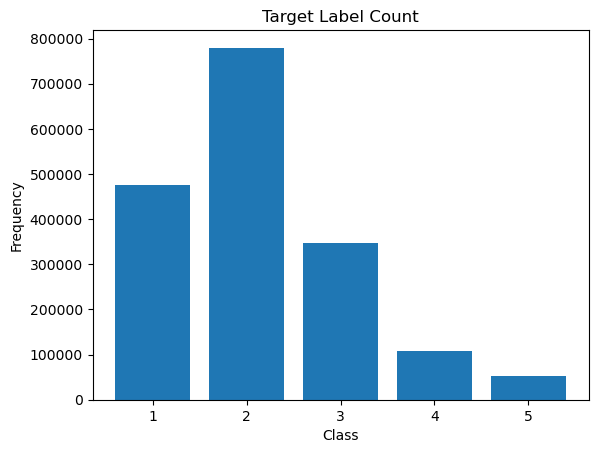

In [25]:
import matplotlib.pyplot as plt
# Set up plot
plt.figure()

# Plot bar chart
plt.bar(y_train.value_counts().index,y_train.value_counts().values)

# Plot Label
plt.xlabel("Class")
plt.ylabel("Frequency")
plt.title("Target Label Count")

# Show Plot
plt.show()

<div style="border-radius:10px; border: #ffd500 solid; padding: 15px; background-color: #ffffcf; font-size:100%; text-align:left">
<font size="4px" color="#ffa600"><b>💬 Comment:</b></font>
    
- According to above table, we can see that the minority class only consist of **3%** of the total data, if we apply **undersampling**, we will result in **15%** of data and lose **85%** of the information.
    
- According to above table, we can see that the ratio of majority class and minority class is **15:1**. If we apply **oversampling**, we will duplicate **15** times of the minority class.
    
<div>

[Back-to-top](#4-toc)

---

<div style="border-radius:10px; border:#33a0ff solid; padding: 15px; background-color: #f0f1ff; font-size:100%; text-align:left">
<a class="anchor" id="4-models">
    <h2> Proposed Models </h2>
</a>
</div>

<div style="border-radius:10px; border: #ffd500 solid; padding: 15px; background-color: #ffffcf; font-size:100%; text-align:left">
<font size="4px" color="#ffa600"><b>🧠 Ideas & Reasoning:</b></font>


- [x] Logistic Regression
    1. Reason: It is simple to run
    2. Reason: It is easy to understand and interpret (explainable). 
    2. Reason: It serves as a stepping stone to fancier models (baseline model).
- [x] Decision Tree
    1. Reason: Does not require scaled data.
    2. Reason: Having easy-to-follow structure that mimic human decision making
    3. Reason: Capable to capture non-linearity as it is not a linear model.
- [x] AdaBoost
    1. Reason: AdaBoosting is a Boosting method based on Decision Tree. After each (weak) decision trees, it will focus on the misclassified sample and learn from them. This can further improve the performance of single Decision Tree.
- [x] XGBoost
    1. Reason: Similar to AdaBoost, XGBoost is a Boosting method based on Decision Tree. XGBoost generally has faster computational speed than AdaBoost.
- [x] Random Forest
    1. Reason: Random Forest is favored in classification for its ensemble technique, aggregating multiple decision trees to make predictions.
    2. Reason: Provide Feature Importance
- [x] Naive Bayes
    1. Reason: Naive Bayes is a statistical machine learning model that works well with smaller dataset
    2. Reason: Required independence between variables.
- [x] Neural Network 
    1. Reason: Neural Network is a flexible model by setting different numbers of layers, nodes. The flexibility (non-linearity) is coming from the activation layer. Maybe it can perform very well on the dataset.


    
<div>

[Back-to-top](#4-toc)

---

<div style="border-radius:10px; border:#33a0ff solid; padding: 15px; background-color: #f0f1ff; font-size:100%; text-align:left">
<a class="anchor" id="4-pipelines">
    <h2> Model Pipelines with 10% of data</h2>
</a>

</div>

<div style="border-radius:10px; border: #ffd500 solid; padding: 15px; background-color: #ffffcf; font-size:100%; text-align:left">
<font size="4px" color="#ffa600"><b>⚠️ Note:</b></font>

<!-- - For faster training process, we will use 10% of our training data (Around 170K Rows) here by using `train_test_split` and setting `stratify` = `y`. -->
- We will apply Oversampling technique to deal with class imbalance.
- We will apply Grid Search CV with 5-fold for getting the optimized parameters.
    
<div>

<div style="bensembler-radius:10px; border:#33a0ff solid; padding: 15px; background-color: #f0f1ff; font-size:100%; text-align:left">
<a class="anchor" id="4-model">
    <h3> Classes & Functions for Model Pipelines </h3>
</a>

</div>

In [314]:
import joblib


def load_model(model_name,grid_search = True):
    """
    Function to load the model pickle file
    """
    model = joblib.load(f"model/{model_name}{'_gs' if grid_search else ''}.pkl")                   
    return model

In [315]:
def load_gs_result(model_name,grid_search = True):
    """
    Function to load the grid search result csv file
    """
    
    df = pd.read_csv(f"model/{model_name}{'_gs' if grid_search else ''}_res.csv",index_col = 0)                  
    return df

In [28]:
def load_model_performance(model_name):
    """
    Function to load the model performance csv file
    """
    
    df = pd.read_csv(f"model/model_performance.csv",index_col = 0)                  
    df = df[df["model_name"] == model_name]
    assert len(df) > 0, "'model_name' not found."
    return df

In [29]:
from ast import literal_eval
import re

def added_title_show_confusion_matrix(model_name):
    """
    Add on function to add title to the confusion matrix plot
    """
    # Print title
    logger.info(f"Printing Confusion Matrix for {model_name}")
    
    # check if the model is in variable list of the current kernel
    if model_name in globals():
        try:
            globals()[model_name].show_confusion_matrix()
            return
        except:
            pass
        
    # if not, load it from the model performance csv

    # Obtain the confusion matrix from the record
    this_df = load_model_performance(model_name)

    # Retrieve the confusion matrix content
    cm = this_df["confusion_matrix"].values[0]
    
    # Process the string array back into np.array
    cm = cm.replace("\n",",")
    cm = cm.split(",")
    cm = list(map(lambda val: val.replace("[",""),cm))
    cm = list(map(lambda val: val.replace("]",""),cm))
    cm = list(map(lambda val: re.sub(" +"," ",val),cm))
    cm = list(map(lambda val: re.sub(" +",",",val),cm))
    cm = list(map(lambda val: val.split(","),cm))
    cm = [list(filter(lambda val: len(val) > 0,l1)) for l1 in cm]
    cm = [[int(num) for num in l1] for l1 in cm]
    cm = np.array(cm)

    # Plot the confusion matrix
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot(values_format="d",cmap="Blues")
    plt.title(f"Confusion Matrix for model - {model_name}")
    plt.show()

In [30]:
# Model Performance Templae
model_performance_dict = {
    "timestamp":None,
    "test":None,
    "model_name": None,
    "model": None,
    
    "scoring":None,
    
    "grid_search": False,
    "best_params": None,
    "best_train_score": None,
    "params": None,
    "train_score": None,
    
    "test_score": None,    
    "confusion_matrix": None,
    "classification_report": None,
    
    "sub_sampling":False,
    "sub_sampling_time":0,
    "sub_sampling_pct_X_train":None,
    "sub_sampling_pct_X_test":None,
    
    "sampling":False,
    "sampling_time":0,
    "sampling_method":None,
    
    "X_train_shape":None,
    "X_test_shape":None,
    
    "target_encoding": False,
    "target_encoding_col": [],
    "one_hot_encoding": False,
    "one_hot_encoding_col": [],
    
    "standard_scaling": False,
    "standard_scaling_col": [],
    "min_max_scaling": False,
    "min_max_scaling_col": [],
    
    "drop_column": False,
    "dropped_columns":[],
    
    "pca": False,
    "pca_n_components": None,
    
}

In [31]:
import os
import datetime
import pprint
import pandas as pd

import matplotlib.pyplot as plt


from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV, cross_val_score, StratifiedKFold,train_test_split
from sklearn.preprocessing import OneHotEncoder, TargetEncoder, StandardScaler, MinMaxScaler, LabelEncoder,FunctionTransformer
from sklearn.metrics import f1_score,confusion_matrix,classification_report,ConfusionMatrixDisplay
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.decomposition import PCA

from imblearn.over_sampling import RandomOverSampler,SMOTENC
from imblearn.under_sampling import RandomUnderSampler

import xgboost as xgb


class ModelPerf:
    """
    Customized class for processing the model performance dataframe
    """
    _data = None
    _path = None

    def __init__(self,path,read = True):
        """
        Instantiate the class with the input path, by default, load the data if possible
        """
        self._path = path
        # try to load the previous file
        if read:
            self.read_csv()
        
    def _is_path_valid(self):
        """
        Validate if the path is a file
        """
        return os.path.isfile(self._path)
        
    def read_csv(self):
        """
        Try to read the file in the path. If fild not found, create new dataframe for that
        """
        # Try to read csv
        try:
            self._data = pd.read_csv(self._path)
        # If file not found
        except Exception as e:
            logger.info(f"Creating new model performance file...")
            self._data = pd.DataFrame()
            
    def export_csv(self):
        """
        Export the model performance dataframe to the designated path if the dataframe is not empty
        """
        # If there is some data
        if self._data.shape[0] > 0:
            self._data.to_csv(self._path,index = False)
            logger.info(f"Model Performance CSV is exported at {self._path}")
        # If dataframe is empty
        else:
            logger.warning(f"Model Performance is empty")
            
    def add_data(self,new_data:dict,export = True):
        """
        Add the model performance
        """
        # Refresh data
        self.read_csv()
        
        # Process new data
        new_df = pd.DataFrame([new_data])
        
        # Add new data
        self._data = pd.concat([self._data,new_df])
        self._data.sort_values(by=["model_name"],ascending = [True],inplace = True)
        self._data.reset_index(drop = True, inplace=True)
        
        # Export csv
        if export:
            self.export_csv()
            
    def del_data(self,model_name: str):
        """
        Delete the model performance by the model name
        """
        # Deletion
        self._data = self._data[self._data["model_name"] != model_name]
        
        # Print the result
        logger.info(f"Result for model {model_name} is deleted.")
        
    def get_data(self):
        """
        Retrieve the model performance
        """
        # Refresh data
        self.read_csv()
        
        # Return the data
        return self._data
    
    def print_data(self):
        """
        Print the model performance
        """
        print(self.get_data())
    
######################################################    


class MyModel:
    
    """
    Customized class for running different model with sklearn pipeline
    """
    
    def __init__(self,
                 X_train,X_test,
                 y_train,y_test,
                 train_subsample_size = None,
                 test_subsample_size = None):
        """
        Instantiate the class with train and test data, and corresponding subsampling size if needed.
        """
        # Random State
        self._random_state = 42
        
        # Subsample size for speeding up training
        self._train_subsample_size = train_subsample_size
        self._test_subsample_size = test_subsample_size
        
        # Store the X data
        self.X_train = X_train.copy()
        self.X_test = X_test.copy()
        
        # Apply Label Encoder to target variables 
        self.le = LabelEncoder()
        
        # Store the y data
        self.y_train = pd.Series(self.le.fit_transform(y_train),index= y_train)
        self.y_test = pd.Series(self.le.transform(y_test),index= y_test)
        
        # Sanity Check data shape
        self.print_data_size()
            
        # Load the target variables class
        self._classes = sorted(list(set(y_train)))
        
        # Default is 5-fold
        self.cv = None
        
        # Subsampling Flag
        self._subsampled = False
        
        # Diff Types of Sampling
        self._sampled = False
        self._sampling_name = None
        
        # Custom Encoder
        self._one_hot_transformer = None
        self._one_hot_col = []
        self._tar_end_transformer = None
        self._tar_end_col = []
        self.encoder = None
        self._encoder_steps = []
        self._encoder_name = ""
        
        # Custom Scaler
        self._standard_scaler = None
        self._ss_col = []
        self._min_max_scaler = None
        self._mm_col = []
        self.scaler = None
        self._scaler_steps = []
        self._scaler_name = ""
        
        # Column Dropper
        self.dropped_col = False
        self._dropped_columns = []
        
        # Custom PCA
        self.pca = None
        self._pca_name = None
        self._pca_n_components = None
        
        # Grid Search
        self._use_grid_search= False
        self.grid_search = None
        self.gs_params = {}
        
        # Custom Model
        self.model = None
        self._model_name = ""
        
        # Custom Score
        self._scoring = "f1_weighted"
        self._scoring_func = lambda y_true,y_pred: f1_score(y_true,y_pred,average = "weighted")
        
        # Custom Pipeline
        self.pipeline = None
        self._pipeline_steps = []
        
        # Prediction
        self.train_y_pred = None
        self.y_pred = None
        self.y_prob = None
        
        # Timer
        self._subsample_time = None
        self._sampling_time = None
        self._fit_time = None
        self._predict_time = None
        
        
        # Model Performance
        self.model_perf = None
        self._raw_cm = None
        self._cm = None
        self._cr = None
        self._cv_results = None
        
    def init_drop_columns(self,cols_to_drop=[]):
        """
        Drop columns in the X data
        """
        # Do nothing if no columns received
        if len(cols_to_drop) == 0:
            self.dropped_col = False
        else:        
            # Initiate timer
            start_time = time.time()
            
            # Print status
            logger.info("Dropping Columns...")
            
            # Check if the selected columns exist
            available_col = self.X_train.columns
            cols_to_drop = list(filter(lambda col: col in available_col,cols_to_drop))
            
            # Mark down the record
            self._dropped_columns = cols_to_drop
            self.dropped_col = True
            
            # Drop the columns
            self.X_train.drop(columns=cols_to_drop,inplace= True) 
            self.X_test.drop(columns=cols_to_drop,inplace= True) 
            
            # Stop timer
            end_time = time.time()
            
            # Print result
            logger.info(f"Dropping Columns Completed | Time elapsed: {self.time_to_str(end_time - start_time)}")
            
            # Sanity Check
            self.print_data_size(title = "After Dropping Columns")
        
    def init_subsampling(self):
        """
        Subsample the train and test data
        """
        # Do nothing if both subsample size are None
        if self._train_subsample_size is not None or self._test_subsample_size is not None:
            # Initiate Timer
            start_time = time.time()
            
            # Print Status
            logger.info("Sub-sampling on Train Data...")
            
            # Subsample the train data
            if self._train_subsample_size is not None:
                # Sample the train dataset with train_test_split function
                self.X_train, _, self.y_train, _ = train_test_split(self.X_train, self.y_train,
                                                                    stratify = self.y_train, 
                                                                    train_size = self._train_subsample_size,
                                                                    random_state = self._random_state)
            # Subsample the test data
            if self._test_subsample_size is not None:
                # Sample the test dataset with train_test_split function
                _, self.X_test, _ ,self.y_test= train_test_split(self.X_test, self.y_test,
                                                                 stratify = self.y_test, 
                                                                 test_size = self._test_subsample_size, 
                                                                 random_state = self._random_state)

            # Stop Timer
            end_time = time.time()
            
            # Logging
            self._subsample_time = end_time - start_time
            logger.info(f"Subsampling Completed | Time elapsed: {self.time_to_str(self._subsample_time)}")
            
            # Sanity Check
            self.print_data_size(title = "After Subsampling")
        
            # Update flag
            self._subsampled = True
        
        # If function called without any subsample size provided.
        else: 
            logger.error("If init_subsampling(), 'train_subsample_size' & 'test_subsample_size' cannot be None.")
            logger.info("No Subsampling is applied.")
            self.print_empty()        
    
    def init_smotenc(self):
        """
        Apply SMOTENC oversampling on training data
        """
        # Check if the data is oversampled or not
        assert not self._sampled,"Already sampled."
        
        # Start Timer
        start_time = time.time()
        
        # Log
        self._sampling_name = "SMOTENC Over Sampling"
        logger.info(f"{self._sampling_name} on Train Data...")
        
        # Instantiate SMOTENC
        snc = SMOTENC(categorical_features = ["make","model","trim",
                                              "body_type","vehicle_type","transmission",
                                              "drivetrain","engine_block"],random_state = 42)
        # Fit & Transform
        self.X_train,self.y_train = snc.fit_resample(self.X_train,self.y_train)
        
        # Stop Timer
        end_time = time.time()
        
        # Log 
        self._sampling_time = end_time - start_time
        logger.info(f"{self._sampling_name} Completed | Time elapsed: {self.time_to_str(self._sampling_time)}")
        
        # Sanity Check
        self.print_data_size(title = f"After {self._sampling_name}")
        
        # Update flag
        self._sampled = True
        
    def init_over_sampling(self):
        """
        Apply Random OverSampling on training data
        """
        # Check if the data is oversampled or not
        assert not self._sampled,"Already sampled."
        
        # Start Timer
        start_time = time.time()
        
        # Log
        self._sampling_name = "Random Over Samping"
        logger.info(f"{self._sampling_name} on Train Data...")
        
        # Instantiate Random OverSampler
        ros = RandomOverSampler(random_state = 42)
        
        # Fit & Transform
        self.X_train,self.y_train = ros.fit_resample(self.X_train,self.y_train)
        
        # Stop Timer
        end_time = time.time()
        
        # Log
        self._sampling_time = end_time - start_time
        logger.info(f"{self._sampling_name} Completed | Time elapsed: {self.time_to_str(self._sampling_time)}")
        
        # Sanity Check
        self.print_data_size(title = f"After {self._sampling_name}")
        
        # Update Flag
        self._sampled = True
    
    # For Hybrid Samping
    def _under_sample_target_size(self,target_class: int):
        """
        UnderSample the classes with more samples than the selected target class
        
        Example
        -------
        y.value_counts() = {0:123, 1:345, 2: 789, 3: 1111}
        self._under_sample_target_size(target_class = 2) =>
            {{0:123, 1:345, 2: 789, 3: 789}}
            
        Class 3 has more samples than class 2, so it will be undersampled.
        """
        # Transform the target_class with our Label Encoder
        target_class = self.le.transform([target_class])[0]
        
        # Get value counts for y data
        size_dict = dict(self.y_train.value_counts())
        target_size = size_dict[target_class]
        
        # Undersampling
        for k,v in size_dict.items():
            if v > target_size:
                size_dict[k]=target_size
                
        # Return the dict
        return size_dict
    
    # For Hybrid Samping
    def _over_sample_target_size(self,target_class: int):
        """
        OverSample the classes with less samples than the selected target class
        
        Example
        -------
        y.value_counts() = {0:123, 1:345, 2: 789, 3: 1111}
        self._over_sample_target_size(target_class = 2) =>
            {{0:789, 1:789, 2: 789, 3: 1111}}
            
        Class 0 and Class 1 has less samples than class 2, so it will be oversampled.
        """
        # Transform the target_class with our Label Encoder
        target_class = self.le.transform([target_class])[0]
        
        # Get value counts for y data
        size_dict = dict(self.y_train.value_counts())
        target_size = size_dict[target_class]
        
        # Oversampling
        for k,v in size_dict.items():
            if v < target_size:
                size_dict[k]=target_size
                
        # Return the dict
        return size_dict
    
    def init_hybrid_sampling(self,target_class:int):
        """
        Apply Hybrid Sampling to the train data
        """
        # Check if the data is oversampled / undersampled
        assert not self._sampled,"Already sampled."
        
        # Start Timer
        start_time = time.time()
        
        # Log
        self._sampling_name = "Hybrid Samping"
        logger.info(f"{self._sampling_name} on Train Data...")
        
        # Assert the selected class is available
        assert target_class in self.y_train.value_counts().index, "'target_class' is not in target_variable"
        
        # Instantiate UnderSampler
        rus = RandomUnderSampler(sampling_strategy = self._under_sample_target_size(target_class),
                                 random_state=42)
        # Fit & Transform
        self.X_train,self.y_train = rus.fit_resample(self.X_train,self.y_train)
        
        # Instantiate OverSampler
        ros = RandomOverSampler(sampling_strategy = self._over_sample_target_size(target_class),
                                 random_state=42)
        # Fit & Transform
        self.X_train,self.y_train = ros.fit_resample(self.X_train,self.y_train)
        
        # Stop Timer
        end_time = time.time()
        
        # Log
        self._sampling_time = end_time - start_time
        logger.info(f"{self._sampling_name} Completed | Time elapsed: {self.time_to_str(self._sampling_time)}")
        
        # Sanity Check
        self.print_data_size(title = f"After {self._sampling_name}")
        
        # Update Flag
        self._sampled = True
    
        
    def init_one_hot_encoding(self,encoder = None, columns=[]):
        """
        Instantiate one hot encoding for the data
        """
        # Only run when columns is not empty
        if len(columns) > 0:
            
            # If no specific encoder is provided, use the below encoder
            if encoder is None:
                self._one_hot_transformer = Pipeline(
                    steps=[("one_hot",OneHotEncoder(sparse_output = False,
                                                    drop="first") # Drop the first column to avoid dummy variable trap
                           )]
                )
            # If specific encoder is provided, use the provided encoder
            else:
                self._one_hot_transformer = Pipeline(
                    steps=[("one_hot",encoder)]
                )
            
            # Validate the selected columns exists
            available_col = self.X_train.columns
            columns = list(filter(lambda col: col in available_col,columns))
            assert len(columns) > 0, "Columns empty after filtering"
            
            # Log
            self._set_one_hot_col(columns)
            
            # Add to encoder steps
            self._encoder_steps.append(("one_hot",self._one_hot_transformer,self._one_hot_col))
            
            # Log
            logger.info("One-hot Encoder Initialization Completed")
            self.print_empty()
        
    def init_target_encoding(self,encoder = None, columns=[]):
        """
        Instantiate target encoding for the data
        """
        # Only run when columns is not empty
        if len(columns) > 0:
            
            # If no specific encoder is provided, use the below encoder
            if encoder is None:
                self._tar_end_transformer = Pipeline(
                    steps=[("tar_end",TargetEncoder(target_type="continuous",
                                                    random_state=self._random_state))]
                )
            # If specific encoder is provided, use the provided encoder
            else:
                self._tar_end_transformer = Pipeline(
                    steps=[("tar_end",encoder)]
                )
            
            
            # Validate the selected columns exists
            available_col = self.X_train.columns
            columns = list(filter(lambda col: col in available_col,columns))
            assert len(columns) > 0, "Columns empty after filtering"
            
            # Log
            self._set_target_encode_col(columns)
            
            # Add to encoder steps
            self._encoder_steps.append(("tar_end",self._tar_end_transformer,self._tar_end_col))

            # Log
            logger.info("Target Encoder Initialization Completed")
            self.print_empty()

    def init_encoder(self,name = "encoders"):  
        """
        Instantiate encoding step for the pipeline
        """
        # If no encoding steps, do nothing
        if len(self._encoder_steps) == 0:
            self.encoder = None
        else:
            # Instantiate Encoding Step with instantiated encoder steps above
            self.encoder = ColumnTransformer(
                transformers=self._encoder_steps,
                remainder = "passthrough", # Keep the remaining columns
                verbose_feature_names_out = False
            )
            # Log
            self._encoder_name = name
            
            # Add all the encodeing steps into pipeline
            self._pipeline_steps.append((self._encoder_name,self.encoder))
        
    def init_standard_scaler(self,scaler = None, columns=[]): 
        """
        Instantiate Standatd Scaler step for the pipeline
        """
        # If no columns selected, do nothing
        if len(columns) > 0:
            
            # If no specific encoder is provided, use the below encoder
            if scaler is None:
                self._standard_scaler = Pipeline(
                    steps=[("standard_scaler",StandardScaler()),]
                )
            # If specific encoder is provided, use the provided encoder
            else:
                self._standard_scaler = Pipeline(
                    steps=[("standard_scaler",scaler),]
                )
                
            # Validate the selected columns exists
            available_col = self.X_train.columns
            columns = list(filter(lambda col: col in available_col,columns))
            assert len(columns) > 0, "Columns empty after filtering"
            
            # Log
            self._set_standard_scaling_col(columns)
                
            # Add to encoder steps
            self._scaler_steps.append(("standard_scaler",self._standard_scaler,self._ss_col))
            
            # Log 
            logger.info("Standard Scaler Initialization Completed")
            self.print_empty()
        
    def init_min_max_scaler(self,scaler = None,columns=[]):
        """
        Instantiate Min-Max Scaler step for the pipeline
        """
        # If no columns selected, do nothing
        if len(columns) > 0:
            
            # If no specific encoder is provided, use the below encoder
            if scaler is None:
                self._min_max_scaler = Pipeline(
                    steps=[("min_max_scaler",MinMaxScaler()),]
                )
                
            # If specific encoder is provided, use the provided encoder
            else:
                self._min_max_scaler = Pipeline(
                    steps=[("min_max_scaler",scaler),]
                )
                
            # Validate the selected columns exists
            available_col = self.X_train.columns
            columns = list(filter(lambda col: col in available_col,columns))
            assert len(columns) > 0, "Columns empty after filtering"
            
            # Log
            self._set_min_max_scaling_col(columns)
                
            # Add to encoder steps
            self._scaler_steps.append(("min_max_scaler",self._min_max_scaler,self._mm_col))
            
            # Log
            logger.info("Min-Max Scaler Initialization Completed")
            self.print_empty()
            
    def init_scaler(self,name = "scalers"):
        """
        Instantiate Scaling step for the pipeline
        """
        # If no scaling steps, do nothing
        if len(self._scaler_steps) == 0:
            self.scaler = None
        else:        
            # Instantiate Scaling Step with instantiated scaler steps above
            self.scaler = ColumnTransformer(
                transformers=self._scaler_steps,
                remainder = "passthrough",
                verbose_feature_names_out = False
            )
            # Log
            self._scaler_name = name
            
            # Add all the encodeing steps into pipeline
            self._pipeline_steps.append((self._scaler_name,self.scaler))
            
    def init_pca(self,name="pca",n_components = None):
        """
        Instantiate Scaling step for the pipeline
        """
        # Instantiate the PCA object
        if n_components is None:
            self.pca = PCA()
        else:
            self._pca_n_components = n_components
            self.pca = PCA(n_components = n_components)
            
        # Log
        self._pca_name = name
        
        # Add the PCA into pipeline
        self._pipeline_steps.append((self._pca_name,self.pca))
        
        # Log
        logger.info("PCA Initialization Completed")
        self.print_empty()        
    
    @staticmethod
    def get_df_val(df):
        """
        Helper function for init_mode()
        """
        val = df.values
        return val
    
    def init_model(self,name,model):
        """
        Pass the model into pipeline
        """
        # Log
        self.model = model
        self._model_name = name
        
        # Add specific steps for KNN model for pipeline integration
        if "knn" in name:
            get_value_transformer = FunctionTransformer(self.get_df_val)
            self._pipeline_steps.append(("get_value_steps",get_value_transformer))
        
        # Add the model into the pipeline
        self._pipeline_steps.append((self._model_name,self.model))
        
        # Log
        logger.info(f"{self.model.__class__.__name__} (name: {self._model_name}) Initialization Completed")
        self.print_empty()
    
     
    def init_pipeline(self):
        """
        Instantiate the entire pipeline
        """
        # If model is not instantiated, do nothing
        if self.model is None:
            logger.error(f"No Model is initiated")
            
        # If nothing in pipeline, do nothing
        if len(self._pipeline_steps) == 0:
            logger.error(f"No steps in pipeline")
            return
        else:           
            # Instantiate the pipeline
            self.pipeline = Pipeline(self._pipeline_steps,verbose=False)
            self.pipeline.set_output(transform="pandas")
                
        
    def init_grid_search(self,params,n_job = 1,no_cv = False):
        """
        Instantiate the Grid Search Object
        """
        # If nothing in pipeline, do nothing
        if self.pipeline is None:
            logger.error("Please initialize the model pipeline first")
            return
        
        # If nothing in params, do nothing
        if len(params) == 0:
            logger.error(f"Grid Search params cannot be empty.")
        else:
            # Instantiate Grid Search
            self._set_grid_search_params(params)
            self.grid_search = GridSearchCV(self.pipeline,
                                            self.gs_params,
                                            n_jobs = n_job,
                                            cv = self.cv if not no_cv else None,
                                            scoring = self._scoring,
                                            return_train_score = True,
                                            verbose= 0)
            
            # Update flag
            self._use_grid_search = True
            
            # Print Status
            if self.cv is not None:
                logger.info(f"Grid Search with {self.cv if isinstance(self.cv, int) else self.cv.get_n_splits()}-folds cross-validation Initialized Completed")
            else:
                logger.info(f"Grid Search without cross-validation Initialized Completed")
            self.print_empty()
            
            
    # ===================== Set Function ============================== 
        
    
    def set_kfold_cv(self,cv = 5):
        """
        Set k-fold cross validation
        """
        if cv is None:
            self.cv = None
            
        # Validation
        assert isinstance(cv,int), "'cv' must be integer"
        assert cv >= 2, "'cv' must be greater than 1"
        
        # Instantiate Cross Validation Object
        self.cv = StratifiedKFold(n_splits = cv)
        
        
    def _set_one_hot_col(self,columns=[]):
        """
        Private function to set one-hot encoding columns
        """
        # Do nothing is columns is empty
        if len(columns) == 0:
            return
        else:
            for col in columns:
                # Validation
                assert col in self.X_train.columns, f"{col} not found in X_train"
                assert col in self.X_test.columns, f"{col} not found in X_test"
                
            # Log
            self._one_hot_col = columns
            
            
    def _set_target_encode_col(self,columns=[]):
        """
        Private function to set target encoding columns
        """
        # Do nothing is columns is empty
        if len(columns) == 0:
            return
        else:
            for col in columns:
                # Validation
                assert col in self.X_train.columns, f"{col} not found in X_train"
                assert col in self.X_test.columns, f"{col} not found in X_test"
            # Log
            self._tar_end_col = columns
            
            
    def _set_standard_scaling_col(self,columns=[]):
        """
        Private function to set standard scaling columns
        """
        # Do nothing is columns is empty
        if len(columns) == 0:
            return
        else:
            for col in columns:
                # Validation
                assert col in self.X_train.columns, f"{col} not found in X_train"
                assert col in self.X_test.columns, f"{col} not found in X_test"
            # Log
            self._ss_col = columns
        
    def _set_min_max_scaling_col(self,columns=[]):
        """
        Private function to set standard scaling columns
        """
        # Do nothing is columns is empty
        if len(columns) == 0:
            return
        else:
            for col in columns:
                # Validation
                assert col in self.X_train.columns, f"{col} not found in X_train"
                assert col in self.X_test.columns, f"{col} not found in X_test"
            # Log
            self._mm_col = columns
            
    def _set_grid_search_params(self,params):
        """
        Private function to set grid search params
        """
        # Validation the hyperparameters prefix for grid search process
        available_prefix = [step[0] for step in self.pipeline.steps]
        for param in params:
            assert param.split("__")[0] in available_prefix, f"Grid Search Params {param} not found. Only found: {available_prefix}"
            
        # Log
        self.gs_params = params    
    
    # ================== Model Fitting =================
    def fit(self):
        """
        Fit the model
        """
        # Fit the grid search if grid search is used
        if self._use_grid_search:
            # Start Timer
            start_time = time.time()
            
            # Log
            logger.info(f"Model Fitting with Grid Search...")
            
            # Fit
            self.grid_search.fit(self.X_train,self.y_train)
            
            # Log the CV result
            self.cv_results = pd.DataFrame(self.grid_search.cv_results_)
            
            # Log
            logger.info("Grid Search Cross Validationn Results Exported.")
            
        # Fit the pipeline if grid search is not used
        else:
            # Start Timer
            start_time = time.time()
            
            # Log
            logger.info(f"Model Fitting...")
            
            # Fit
            self.pipeline.fit(self.X_train,self.y_train)
            
            # Make Prediction on Train data
            self.train_y_pred = self.pipeline.predict(self.X_train)
        
        # Stop the timer
        end_time = time.time()
        
        # Log
        self._fit_time = end_time - start_time
        logger.info(f"Total Fitting Time:{self.time_to_str(self._fit_time)}")
        self.print_empty()
        
    
    # ================== Model Prediction =================
    def predict(self):
        """
        Fit the model
        """
        # Print Status
        logger.info("Predicting on Test Data...")
        
        # Start Timer
        start_time = time.time()
        
        # If Grid Search is used
        if self._use_grid_search:
            try:
                # Predict Probability (Soft Prediction)
                self.y_prob = self.grid_search.predict_proba(self.X_test)
            except AttributeError as e:
                logger.error(f"{e}")
            # Prediction (Hard Prediction)
            self.y_pred = self.grid_search.predict(self.X_test)
            
        # If Grid Search is NOT used
        else:
            try:
                # Predict Probability (Soft Prediction)
                self.y_prob = self.pipeline.predict_proba(self.X_test)
            except AttributeError as e:
                logger.error(f"{e}")
            # Prediction (Hard Prediction)
            self.y_pred = self.pipeline.predict(self.X_test)
        
        # Stop the timer
        end_time = time.time()
        
        # Log
        self._predict_time = end_time - start_time
        logger.info(f"Total Predicting Time:{self.time_to_str(self._predict_time)}")
        self.print_empty()
        
        
    # ================== Model Evaluation =================
    def get_best_train_score(self):
        """
        Retrieve the best train score (for grid search) / train score (for pipeline)
        """
        # If Grid Search is used
        if self._use_grid_search:
            return self.grid_search.best_score_
        # If Grid Search is NOT used
        else:
            return self._scoring_func(self.y_train,self.train_y_pred)
        
    def print_best_train_score(self):
        """
        Print the best train score (for grid search) / train score (for pipeline)
        """
        logger.info(f"Best Train Score: {self.get_best_train_score()}")
        
    def get_test_score(self):
        """
        Retrieve the test score (Based on test data)
        """
        # Validate if the prediction is available, must run predict() before this function
        if self.y_pred is not None:
            return self._scoring_func(self.y_test,self.y_pred)
        else:
            logger.error(f"No y_pred found for testing score.")
    
    def print_test_score(self):
        """
        Print the test score (Based on test data)
        """
        # Validate if the prediction is available, must run predict() before this function
        if self.y_pred is not None:
            logger.info(f"Test Score: {self.get_test_score()}")
        else:
            logger.error(f"No y_pred found for testing score.")
        
    def get_best_params(self):
        """
        Retrieve the best parameters (for grid search) / parameters (for pipeline)
        """
        # If Grid Search is used
        if self._use_grid_search:
            return self.grid_search.best_params_
        
        # If Grid Search is NOT used
        else:
            return self.pipeline.steps[-1][1].get_params()
        
    def print_best_params(self):
        """
        Print the best parameters (for grid search) / parameters (for pipeline)
        """
        self.print_title(title = "Parameters")
        
        # Format the dictionary
        pprint.pprint(self.get_best_params())
        
    def compute_raw_confusion_matrix(self):
        """
        Calculate the raw confusion matrix
        """
        # Validate if the prediction is available
        if self.y_pred is not None:
            logger.info("Computing Confusion Matrix...")
            self._raw_cm = confusion_matrix(self.y_test,self.y_pred)
        else:
            logger.error("Please make prediction first.")
    
    def compute_confusion_matrix(self):
        """
        Create the confusion matrix dataframe
        """
        # Validate if the raw confusion matrix is available
        if self._raw_cm is None:
            self.compute_raw_confusion_matrix()
            
        # Create confusion matrix dataframe
        self._cm = pd.DataFrame(self._raw_cm,
                                index = [f"actual_{i}" for i in self._classes],
                                columns = [f"predict_{i}" for i in self._classes])
        
    def show_confusion_matrix(self):
        """
        Plot the confusion matrix dataframe
        """
        # Validate if the raw confusion matrix is available
        if self._raw_cm is None:
            self.compute_raw_confusion_matrix()
        
        # Plot the confusion matrix
        disp = ConfusionMatrixDisplay(confusion_matrix=self._raw_cm)
        disp.plot(values_format="d",cmap="Blues")
        plt.title(f"Confusion Matrix for {self._model_name}")
        plt.show()
        
    def compute_classification_report(self):
        """
        Calculate the classificationn report
        """
        self._cr = classification_report(self.y_test,self.y_pred)
            
        
    def print_confusion_matrix(self):
        """
        Print the confusion matrix
        """
        # Validate if the confusion matrix dataframe is available
        if self._cm is None:
            self.compute_confusion_matrix()
        # Print
        self.print_title(title = "Confusion Matrix on Test Data")
        print(self._cm)
        
    
    def print_classification_report(self):
        """
        Print the confusion matrix
        """
        # Validate if the classification report is available
        if self._cr is None:
            self.compute_classification_report()
        # Print
        self.print_title(title = "Classification Report on Test Data")
        print(self._cr)
        
    def _save_cv_result(self):
        """
        Private function to save the CV result
        """
        # Only run when grid search is used
        if self._use_grid_search:
            self.cv_results.to_csv(f"model/{self._model_name}_gs_res.csv")
        else:
            pass
        
    def save_model(self):
        """
        Function to save model
        """
        # Print Status
        self.print_title(title = "Saving Model")
        
        # Define the path to save
        save_path = f"model/{self._model_name}{'_gs' if self._use_grid_search else ''}.pkl"
        
        # If Grid Search is used
        if self._use_grid_search:
            # also save CV result
            self._save_cv_result()
            joblib.dump(self.grid_search.best_estimator_,save_path)
            # print(self.grid_search.best_estimator_)
        
        # If Grid Search is NOT used
        else:
            joblib.dump(self.pipeline,save_path)
            # print(self.pipeline)
            
        # Print Status
        logger.info(f"Model ({self._model_name}) saved at {save_path}")
    
    # ================== Helper Function =================
    @staticmethod
    def time_to_str(t):
        """
        Function to print out the time lapsed.
        """
        time_list = str(datetime.timedelta(seconds=t)).split(".")[0].split(":")
        return f"\t{time_list[0]} hours {time_list[1]} minutes {time_list[2]} seconds"
    
    def print_data_size(self, title = "Data Shape"):
        """
        Function to print out the Dataframe shape
        """
        # Print Title
        self.print_title(title)
        
        # Print Data Shape
        logger.info(f"X_train: {self.X_train.shape} | y_train: {self.y_train.shape}")
        logger.info(f"X_test : {self.X_test.shape} | y_test : {self.y_test.shape}")
        self.print_empty()
        
    @staticmethod
    def print_title(title):
        """
        Function to print out the title with format
        """
        num_of_equal = 15
        logger.info(f"{'='*num_of_equal} {title} {'='*num_of_equal}")
        
    @staticmethod
    def print_empty():
        """
        Function to print out the empty line
        """
        logger.info("")
        
    @staticmethod
    def customer_random_over_sampling(X,y):
        """
        Function to mimic Random OverSampling. Not in use anymore.
        
        Replaced by init_over_sampling()
        """
        assert X.shape[0] == y.shape[0]

        X.reset_index(drop = True,inplace = True)
        y.reset_index(drop = True,inplace = True)

        # Join both table
        target_col = "price_range"
        X[target_col] = y

        # Get the class in target variable
        _classes = sorted(list(set(y)))

        # Value Count for each class
        val_count = y.value_counts()

        # Get the maximum count
        max_count = max(val_count)

        # list to store sampled data
        new_data_list = []

        for i in _classes:
            diff = max_count - val_count[i]

            # set seed to for reproducibilty
            rand_seed = 0

            # cache the filter dataframe
            this_X = X[X[target_col]==i]

            sample_batch_size = min(diff,min(val_count[i],5000)) # Round off to nearest thousand, to avoid duplicate the whole sample set => more variance

            while diff > 0:
                # For eac
                sampled_data = this_X.sample(min(diff,sample_batch_size), # for last iteration, use diff to make sure all classes have same same sample size
                                  replace = False, # Ensure no duplicates in this batch
                                  random_state = rand_seed)
                new_data_list.append(sampled_data)
                diff -= sample_batch_size
                rand_seed += 1

        new_data_list.append(X)
        new_data = pd.concat(new_data_list)
        new_data.reset_index(drop = True, inplace = True)
        new_X = new_data.drop(columns = [target_col])
        X.drop(columns = [target_col],inplace = True)
        new_y = new_data[target_col]

        return new_X, new_y

    

    def add_perf(self,model_res: ModelPerf,test: bool):
        """
        Function to add the model performance 
        """
        # Create a copy of dictionary 
        this_dict = model_performance_dict.copy()
        
        # Update the dictionary content
        this_dict["timestamp"] = datetime.datetime.now().strftime("%Y-%m-%d %H:%M:%S")
        
        this_dict["test"] = test
        this_dict["model_name"] = self._model_name
        this_dict["model"] = self.model.__class__.__name__
        
        this_dict["sub_sampling"] = self._subsampled
        this_dict["sub_sampling_time"] = self._subsample_time
        this_dict["sub_sampling_pct_X_train"] = self._train_subsample_size
        this_dict["sub_sampling_pct_X_test"] = self._train_subsample_size
        
        this_dict["sampling"] = self._sampled
        this_dict["sampling_method"] = self._sampling_name
        this_dict["sampling_time"] = self._sampling_time
        
        this_dict["X_train_shape"] = self.X_train.shape
        this_dict["X_test_shape"] = self.X_test.shape
        
        if self._tar_end_transformer is not None:
            this_dict["target_encoding"] = True
            this_dict["target_encoding_col"] = self._tar_end_col
            
        
        if self._one_hot_transformer is not None:
            this_dict["one_hot_encoding"] = True
            this_dict["one_hot_encoding_col"] = self._one_hot_col
            
        if self._standard_scaler is not None:
            this_dict["standard_scaling"] = True
            this_dict["standard_scaling_col"] = self._ss_col
            
        if self._min_max_scaler is not None:
            this_dict["min_max_scaling"] = True
            this_dict["min_max_scaling_col"] = self._mm_col
            
        if self.dropped_col: 
            this_dict["drop_column"] = True
            this_dict["dropped_columns"] = self._dropped_columns
            
        if self.pca is not None:
            this_dict["pca"] = True
            this_dict["pca_n_components"] = self._pca_n_components
            
        
        this_dict["scoring"] = self._scoring
        if self._use_grid_search:
            this_dict["grid_search"] = self._use_grid_search 
            this_dict["best_params"] = self.get_best_params()
            this_dict["best_train_score"] = self.get_best_train_score()
        else:
            this_dict["params"] = self.get_best_params()
            this_dict["train_score"] = self.get_best_train_score()
        this_dict["final_train_score"] = self.get_best_train_score()
            
        
        this_dict["test_score"] = self.get_test_score()
        if self._cm is not None:
            this_dict["confusion_matrix"] = self._raw_cm
            
        if self._cr is not None:
            this_dict["classification_report"] = self._cr
            
        # Add the dictionary to the ModelPerf Object
        model_res.add_data(this_dict)
        
        # Return the ModelPerf Object
        return model_res
    
    
        

In [32]:
# Log the model performance
perf = ModelPerf("model/model_performance.csv")

In [33]:
# Global Subsampling Percentage
global_subsampling_pct = 0.1

In [34]:
# Score vs Hyperparamters
import itertools

def plot_test_score_over_hyper(model_name,x_dim, other_dims = [],x_scale_log = False):
    assert len(other_dims) <= 3, f"Maximum length of 'other_dims' is 3."
    
    # y-axis
    y = "mean_test_score"
    
    # Load the grid search result
    temp_df = load_gs_result(model_name)
    
    # Selected parameters columns
    cols = list(filter(lambda col: "param_" in col,temp_df.columns))
    cols.append(y)
    
    # Drop not useful columns
    temp_df = temp_df[cols]

    # Set up plot
    plt.figure()
    
    # Set prefix
    prefix = f"param_{model_name}__"
    
    other_dims_val_list = [temp_df[f"{prefix}{dim}"].unique() for dim in other_dims]
    
    temp_df.sort_values(by= f"{prefix}{x_dim}", ascending = True, inplace = True)
    
    # If 1 other dimensions
    if len(other_dims) == 0:
        plt.plot(temp_df[f"{prefix}{x_dim}"],temp_df[y], label=y)
        
    # If 1 other dimensions
    elif len(other_dims) == 1:
        dim1 = other_dims[0]
        for v1 in other_dims_val_list[0]:
                if pd.isnull(v1):
                    cond_1 = temp_df[f"{prefix}{dim1}"].isna()
                else:
                    cond_1 = temp_df[f"{prefix}{dim1}"] == v1

                temp_temp_df = temp_df[(cond_1)]
                plt.plot(temp_temp_df[f"{prefix}{x_dim}"],temp_temp_df[y],label=f"{dim1}-{v1}")
    
    # If 2 other dimensions            
    elif len(other_dims) == 2:
        dim1 = other_dims[0]
        dim2 = other_dims[1]
        for v1 in other_dims_val_list[0]:
            for v2 in other_dims_val_list[1]:
                if pd.isnull(v1):
                    cond_1 = temp_df[f"{prefix}{dim1}"].isna()
                else:
                    cond_1 = temp_df[f"{prefix}{dim1}"] == v1

                if pd.isnull(v2):
                    cond_2 = temp_df[f"{prefix}{dim2}"].isna()
                else:
                    cond_2 = temp_df[f"{prefix}{dim2}"] == v2

                temp_temp_df = temp_df[(cond_1)&(cond_2)]
                plt.plot(temp_temp_df[f"{prefix}{x_dim}"],temp_temp_df[y],label=f"{dim1}-{v1} | {dim2}-{v2}")
            
    # If 3 other dimensions
    elif len(other_dims) == 3:
        dim1 = other_dims[0]
        dim2 = other_dims[1]
        dim3 = other_dims[2]
        for v1 in other_dims_val_list[0]:
            for v2 in other_dims_val_list[1]:
                for v3 in other_dims_val_list[2]:
                    if pd.isnull(v1):
                        cond_1 = temp_df[f"{prefix}{dim1}"].isna()
                    else:
                        cond_1 = temp_df[f"{prefix}{dim1}"] == v1

                    if pd.isnull(v2):
                        cond_2 = temp_df[f"{prefix}{dim2}"].isna()
                    else:
                        cond_2 = temp_df[f"{prefix}{dim2}"] == v2

                    if pd.isnull(v3):
                        cond_3 = temp_df[f"{prefix}{dim3}"].isna()
                    else:
                        cond_3 = temp_df[f"{prefix}{dim3}"] == v3

                    temp_temp_df = temp_df[(cond_1)&(cond_2)&(cond_3)]
                    plt.plot(temp_temp_df[f"{prefix}{x_dim}"],temp_temp_df[y],label=f"{dim1}-{v1} | {dim2}-{v2} | {dim3}-{v3}")
    
    
    if x_scale_log:
        plt.xscale("log")
    plt.xlabel(x_dim)

    plt.ylabel("mean_validation_score")
    plt.title(f"Mean Validation F1 Score in Grid Search over {x_dim}")  
    plt.legend()
    plt.show()



---


<div style="border-radius:10px; border:#33a0ff solid; padding: 15px; background-color: #f0f1ff; font-size:100%; text-align:left">
<a class="anchor" id="4-model">
    <h3> Model - Logistic Regression (Baseline Model) </h3>
</a>
<br>
<b>Why Logistic Regression Model is the baseline model?</b>
<ol>
    <li><b>Simplicity</b></li>
    <p>For classification task, <b>Logistic Regression</b> is a simple and interpretable linear model. It models the relationship between the input features and the binary outcome by applying the logistic function to a linear combination of the input features. </p>       
    <li><b>Interpretability</b></li>
    <p>The coefficients in Logistic Regression provide a direct interpretation of the impact of each feature on the log-odds of the outcome. This interpretability is valuable for gaining insights into the relationships between predictors and the target variable. </p>         
    <li><b>Robustness to Irrelevant Features</b></li>
    <p>Logistic Regression can be robust to irrelevant features, as its regularization techniques (e.g., L1 or L2 regularization) help prevent overfitting and suppress the impact of less informative features. </p>     

</ol>

Therefore, any model tested later on should be compared with Logistic Regression baseline model.    
    
</div>

<div style="border-radius:10px; border: #ffd500 solid; padding: 15px; background-color: #ffffcf; font-size:100%; text-align:left">
<font size="4px" color="#ffa600"><b>⚠️ Note:</b></font>

For baseline model, we just use Logistic Regression to get our first and simple modelling result.
    
<div>

#### Logistic Regression (Baseline)

In [479]:
from sklearn.linear_model import LogisticRegression

def model(test = False):
    model = MyModel(X_train,X_test,
                    y_train,y_test,
                    train_subsample_size=global_subsampling_pct,
                    test_subsample_size=global_subsampling_pct)

    # Apply Subsampling for faster training in experimental stage
    model.init_subsampling() # Subsample data for faster deployment

    # Instantiate encoder steps
    model.init_one_hot_encoding(columns=["vehicle_type","drivetrain","transmission","engine_block"])
    model.init_target_encoding(columns=["make","model","trim","body_type"])
    model.init_encoder() # Activate all encoders and add to pipeline

    # Instantiate scaler steps
    model.init_standard_scaler(columns=["make","model","trim","body_type"])
    model.init_scaler() # Activate all scalers and add to pipeline

    # Instantiate model and add to pipeline
    model_name = "logit_baseline"
    model.init_model(name = model_name,
                     model = LogisticRegression()
                    )
    
    # Instantiate the entire pipeline
    model.init_pipeline()

    # Set K-Fold CV
    model.set_kfold_cv(5)
    
    # Instantiate the grid search
    model.init_grid_search(params={f"{model_name}__C":[1],
                                   f"{model_name}__penalty":["l2"], # Avoid Overfitting
                                   f"{model_name}__max_iter":[10000],
                                   f"{model_name}__class_weight":["balanced"], # Class Imbalance
                                  },
                           n_job = 3
                          )

    # Fit the Pipeline
    model.fit()
    
    # Make Prediction on X_test
    model.predict()
    
    # Print the train score (without GridSearch) / best train score (with GridSearch)
    model.print_best_train_score()
    
    # Print the test score
    model.print_test_score()
    
    # Print the best params
    model.print_best_params()
    
    # Print the confusion matrix
    model.print_confusion_matrix()

    # Add model performance
    global perf
    perf = model.add_perf(perf,test)
        
    # Save the model
    model.save_model()
    
    return model

# Run this model
logit = model()

2023-11-20 20:18:23 - INFO >>> =============== Data Shape ===============
2023-11-20 20:18:23 - INFO >>> X_train: (1764450, 21) | y_train: (1764450,)
2023-11-20 20:18:23 - INFO >>> X_test : (588151, 21) | y_test : (588151,)
2023-11-20 20:18:23 - INFO >>> 
2023-11-20 20:18:23 - INFO >>> Sub-sampling on Train Data...
2023-11-20 20:18:26 - INFO >>> Subsampling Completed | Time elapsed: 	0 hours 00 minutes 02 seconds
2023-11-20 20:18:26 - INFO >>> =============== After Subsampling ===============
2023-11-20 20:18:26 - INFO >>> X_train: (176445, 21) | y_train: (176445,)
2023-11-20 20:18:26 - INFO >>> X_test : (58816, 21) | y_test : (58816,)
2023-11-20 20:18:26 - INFO >>> 
2023-11-20 20:18:26 - INFO >>> One-hot Encoder Initialization Completed
2023-11-20 20:18:26 - INFO >>> 
2023-11-20 20:18:26 - INFO >>> Target Encoder Initialization Completed
2023-11-20 20:18:26 - INFO >>> 
2023-11-20 20:18:26 - INFO >>> Standard Scaler Initialization Completed
2023-11-20 20:18:26 - INFO >>> 
2023-11-20 20

<div style="border-radius:10px; border: #ffd500 solid; padding: 15px; background-color: #ffffcf; font-size:100%; text-align:left">
<font size="4px" color="#ffa600"><b>💬 Comment:</b></font>
    
- We will use this model as our baseline model.
- `max_iter` set to `10000` is to give more room for the model to converge.
- `penalty` set to `l2` to avoid overfitting.
- `class_weight` set to `balanced` to handle class imbalance.
<div>

##### Model Performance

In [481]:
res = perf.get_data()
res[res["model_name"]=="logit_baseline"]

,timestamp,test,model_name,model,scoring,grid_search,best_params,best_train_score,params,train_score,test_score,confusion_matrix,classification_report,sub_sampling,sub_sampling_time,sub_sampling_pct_X_train,sub_sampling_pct_X_test,over_sampling,over_sampling_time,X_train_shape,X_test_shape,target_encoding,target_encoding_col,one_hot_encoding,one_hot_encoding_col,standard_scaling,standard_scaling_col,min_max_scaling,min_max_scaling_col,drop_column,dropped_columns,pca,pca_n_components,sampling,sampling_method,sampling_time,final_train_score
0,2023-11-20 20:20:52,False,logit_baseline,LogisticRegression,f1_weighted,True,"{'logit_baseline__C': 1, 'logit_baseline__clas...",0.697411,NaN,NaN,0.698183,[[13746 1561 347 152 77]\n [ 4766 1664...,NaN,True,2.776889,0.1,0.1,False,0,"(176445, 21)","(58816, 21)",True,"['make', 'model', 'trim', 'body_type']",True,"['vehicle_type', 'drivetrain', 'transmission',...",True,"['make', 'model', 'trim', 'body_type']",False,[],False,[],False,NaN,False,NaN,NaN,0.697411


<div style="border-radius:10px; border: #ffd500 solid; padding: 15px; background-color: #ffffcf; font-size:100%; text-align:left">
<font size="4px" color="#ffa600"><b>💬 Comment:</b></font>
    
- Model Performance:
|Model|alias|Best Params / Params|training F1|testing F1|
|---|---|---|:---:|:---:|
|`Logistic Regression`|logit_baseline|`{'C': 1, 'class_weight': 'balanced','max_iter': 10000,'penalty': 'l2'}`|`69.74%`|`69.82%`|
    
- In order to validate our model with high confidence, we can use 5-fold cross validation and apply grid search to search for the best parameters.
<div>

#### Logistic Regression with Grid Search

In [483]:
from sklearn.linear_model import LogisticRegression

def model(test = False):
    model = MyModel(X_train,X_test,
                    y_train,y_test,
                    train_subsample_size=global_subsampling_pct,
                    test_subsample_size=global_subsampling_pct)

    # Apply Subsampling for faster training in experimental stage
    model.init_subsampling() # Subsample data for faster deployment

    # Instantiate encoder steps
    model.init_one_hot_encoding(columns=["vehicle_type","drivetrain","transmission","engine_block"])
    model.init_target_encoding(columns=["make","model","trim","body_type"])
    model.init_encoder() # Activate all encoders and add to pipeline

    # Instantiate scaler steps
    model.init_standard_scaler(columns=["make","model","trim","body_type"])
    model.init_scaler() # Activate all scalers and add to pipeline

    # Instantiate model and add to pipeline
    model_name = "logit"
    model.init_model(name = model_name,
                     model = LogisticRegression()
                    )
    
    # Instantiate the entire pipeline
    model.init_pipeline()

    # Set K-Fold CV
    model.set_kfold_cv(5)
    
    # Instantiate the grid search
    model.init_grid_search(params={f"{model_name}__C":[10**i for i in [-5,-4,-3,-2,-1,0,1,2,3,4,5]],
                                   f"{model_name}__penalty":["l2"], # Avoid Overfitting
                                   f"{model_name}__max_iter":[10000],
                                   f"{model_name}__class_weight":[None,"balanced"], # Class Imbalance
                                  },
                           n_job = 3
                          )

    # Fit the Pipeline
    model.fit()
    
    # Make Prediction on X_test
    model.predict()
    
    # Print the train score (without GridSearch) / best train score (with GridSearch)
    model.print_best_train_score()
    
    # Print the test score
    model.print_test_score()
    
    # Print the best params
    model.print_best_params()
    
    # Print the confusion matrix
    model.print_confusion_matrix()

    # Add model performance
    global perf
    perf = model.add_perf(perf,test)
        
    # Save the model
    model.save_model()
    
    return model

# Run this model
logit = model()

2023-11-20 20:49:37 - INFO >>> =============== Data Shape ===============
2023-11-20 20:49:37 - INFO >>> X_train: (1764450, 21) | y_train: (1764450,)
2023-11-20 20:49:37 - INFO >>> X_test : (588151, 21) | y_test : (588151,)
2023-11-20 20:49:37 - INFO >>> 
2023-11-20 20:49:37 - INFO >>> Sub-sampling on Train Data...
2023-11-20 20:49:40 - INFO >>> Subsampling Completed | Time elapsed: 	0 hours 00 minutes 02 seconds
2023-11-20 20:49:40 - INFO >>> =============== After Subsampling ===============
2023-11-20 20:49:40 - INFO >>> X_train: (176445, 21) | y_train: (176445,)
2023-11-20 20:49:40 - INFO >>> X_test : (58816, 21) | y_test : (58816,)
2023-11-20 20:49:40 - INFO >>> 
2023-11-20 20:49:40 - INFO >>> One-hot Encoder Initialization Completed
2023-11-20 20:49:40 - INFO >>> 
2023-11-20 20:49:40 - INFO >>> Target Encoder Initialization Completed
2023-11-20 20:49:40 - INFO >>> 
2023-11-20 20:49:40 - INFO >>> Standard Scaler Initialization Completed
2023-11-20 20:49:40 - INFO >>> 
2023-11-20 20

##### Model Performance

In [484]:
res = perf.get_data()
res[res["model_name"]=="logit"]

,timestamp,test,model_name,model,scoring,grid_search,best_params,best_train_score,params,train_score,test_score,confusion_matrix,classification_report,sub_sampling,sub_sampling_time,sub_sampling_pct_X_train,sub_sampling_pct_X_test,over_sampling,over_sampling_time,X_train_shape,X_test_shape,target_encoding,target_encoding_col,one_hot_encoding,one_hot_encoding_col,standard_scaling,standard_scaling_col,min_max_scaling,min_max_scaling_col,drop_column,dropped_columns,pca,pca_n_components,sampling,sampling_method,sampling_time,final_train_score
0,2023-11-20 21:14:22,False,logit,LogisticRegression,f1_weighted,True,"{'logit__C': 10000, 'logit__class_weight': Non...",0.717218,NaN,NaN,0.71793,[[12529 2950 334 53 17]\n [ 2726 2090...,NaN,True,2.814166,0.1,0.1,False,0,"(176445, 21)","(58816, 21)",True,"['make', 'model', 'trim', 'body_type']",True,"['vehicle_type', 'drivetrain', 'transmission',...",True,"['make', 'model', 'trim', 'body_type']",False,[],False,[],False,NaN,False,NaN,NaN,0.717218


<div style="border-radius:10px; border: #ffd500 solid; padding: 15px; background-color: #ffffcf; font-size:100%; text-align:left">
<font size="4px" color="#ffa600"><b>💬 Comment:</b></font>
    
- In the above grid search, we tested with different `C` values and `class weight`.
- The best model is:
|Model|alias|Best Params / Params|training F1|testing F1|
|---|---|---|:---:|:---:|
|`Logistic Regression`|logit|`{'C': 10000, 'class_weight': None, 'max_iter': 10000, 'penalty': 'l2'}`|`71.72%`|`71.79%`|
<div>

##### Model Evaluation

In [497]:
# Print Classification Report"
logit.print_classification_report()

2023-11-20 21:23:22 - INFO >>> =============== Classification Report on Test Data ===============
              precision    recall  f1-score   support

           0       0.82      0.79      0.80     15883
           1       0.75      0.80      0.78     25989
           2       0.59      0.63      0.61     11588
           3       0.44      0.25      0.32      3592
           4       0.64      0.50      0.56      1764

    accuracy                           0.72     58816
   macro avg       0.65      0.60      0.61     58816
weighted avg       0.72      0.72      0.72     58816



In [498]:
# Print the confusion matrix
logit.print_confusion_matrix()

2023-11-20 21:23:24 - INFO >>> =============== Confusion Matrix on Test Data ===============
          predict_1  predict_2  predict_3  predict_4  predict_5
actual_1      12529       2950        334         53         17
actual_2       2726      20900       2168        161         34
actual_3         34       3690       7348        392        124
actual_4          3        178       2187        897        327
actual_5          2         31        317        534        880


2023-11-22 17:50:55 - INFO >>> Printing Confusion Matrix for logit


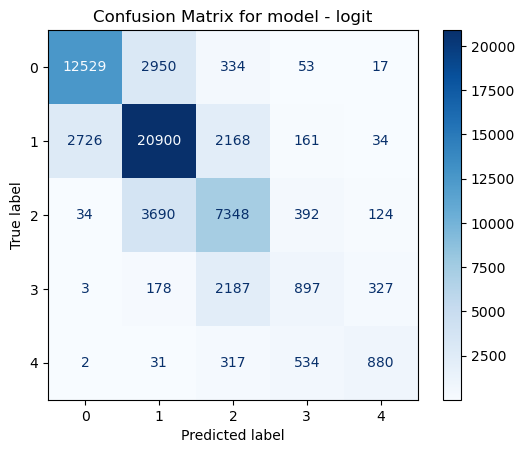

In [233]:
# Plot the confusion matrix
added_title_show_confusion_matrix("logit")

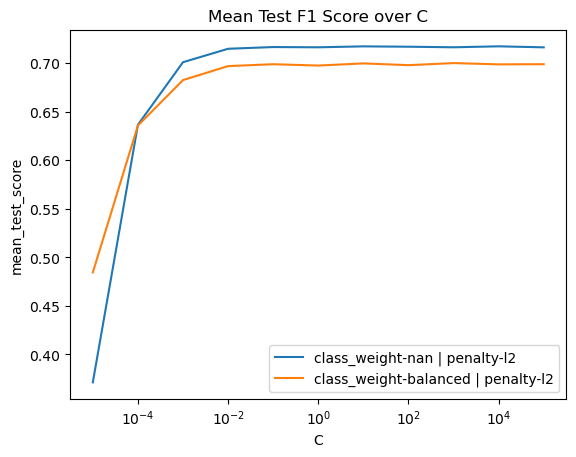

In [525]:
plot_test_score_over_hyper(model_name="logit",
                           x_dim = "C",
                           other_dims=["class_weight","penalty"],
                           x_scale_log=True)

<div style="border-radius:10px; border: #ffd500 solid; padding: 15px; background-color: #ffffcf; font-size:100%; text-align:left">
<font size="4px" color="#ffa600"><b>💬 Comment:</b></font>

- From the graph above, for the choice of `C`, we can choose `10^-1` as it is the first point reaching the converge.
- From the classification report above, we can see that the model does not perform well on predicting class `3`, which is the price range of `4`.
- Also, We can see that there is class imbalance issue.
- The prediction on higher class is getting worse than lower class.
- Let's try different oversampling methods below.
    - Random Over Sampling
    - SMOTENC
    - Hybrid Sampling
<div>

<div style="border-radius:10px; border: #ffd500 solid; padding: 15px; background-color: #ffffcf; font-size:100%; text-align:left">
<font size="4px" color="#ffa600"><b>⚠️ Note:</b></font>

- According the best params from the above grid search, we will use `L2` penalty and `None` for class weight.
- However, we will still apply grid search to find the best value for `C`.
- We will search for the value around the selected value `C = 0.1`
    
<div>

#### Logistic Regression + Oversampling

In [502]:
from sklearn.linear_model import LogisticRegression

def model(test = False):
    model = MyModel(X_train,X_test,
                    y_train,y_test,
                    train_subsample_size=global_subsampling_pct,
                    test_subsample_size=global_subsampling_pct)
    
    # Apply Subsampling for faster training in experimental stage
    model.init_subsampling() # Subsample data for faster deployment
    
    model.init_over_sampling() # Oversampling for class imabalance

    # Instantiate encoder steps
    model.init_one_hot_encoding(columns=["vehicle_type","drivetrain","transmission","engine_block"])
    model.init_target_encoding(columns=["make","model","trim","body_type"])
    model.init_encoder() # Activate all encoders and add to pipeline
    
    # Instantiate scaler steps
    model.init_standard_scaler(columns=["make","model","trim","body_type"])
    model.init_scaler() # Activate all scalers and add to pipeline

    # Instantiate model and add to pipeline
    model_name = "logit_oversample"
    model.init_model(name = model_name,
                     model = LogisticRegression()
                    )
    
    # Instantiate the entire pipeline
    model.init_pipeline()

    # Set K-Fold CV
    model.set_kfold_cv(5)
    
    # Instantiate the grid search
    model.init_grid_search(params={f"{model_name}__C":[10**i for i in [-3,-2,-1,0,1]],
                                   f"{model_name}__penalty":["l2"], # Avoid Overfitting
                                   f"{model_name}__max_iter":[10000],
                                   f"{model_name}__class_weight":[None], # Class Imbalance
                                  },
                           n_job = 3
                          )

    # Fit the Pipeline
    model.fit()
    
    # Make Prediction on X_test
    model.predict()
    
    # Print the train score (without GridSearch) / best train score (with GridSearch)
    model.print_best_train_score()
    
    # Print the test score
    model.print_test_score()
    
    # Print the best params
    model.print_best_params()
    
    # Print the confusion matrix
    model.print_confusion_matrix()

    # Add model performance
    global perf
    perf = model.add_perf(perf,test)
        
    # Save the model
    model.save_model()
    
    return model

# Run this model
logit_oversample = model()

2023-11-20 21:25:54 - INFO >>> =============== Data Shape ===============
2023-11-20 21:25:54 - INFO >>> X_train: (1764450, 21) | y_train: (1764450,)
2023-11-20 21:25:54 - INFO >>> X_test : (588151, 21) | y_test : (588151,)
2023-11-20 21:25:54 - INFO >>> 
2023-11-20 21:25:54 - INFO >>> Sub-sampling on Train Data...
2023-11-20 21:25:56 - INFO >>> Subsampling Completed | Time elapsed: 	0 hours 00 minutes 02 seconds
2023-11-20 21:25:56 - INFO >>> =============== After Subsampling ===============
2023-11-20 21:25:56 - INFO >>> X_train: (176445, 21) | y_train: (176445,)
2023-11-20 21:25:56 - INFO >>> X_test : (58816, 21) | y_test : (58816,)
2023-11-20 21:25:56 - INFO >>> 
2023-11-20 21:25:56 - INFO >>> Random Over Samping on Train Data...
2023-11-20 21:25:57 - INFO >>> Random Over Samping Completed | Time elapsed: 	0 hours 00 minutes 00 seconds
2023-11-20 21:25:57 - INFO >>> =============== After Random Over Samping ===============
2023-11-20 21:25:57 - INFO >>> X_train: (389830, 21) | y_tr

##### Model Performance

In [507]:
res = perf.get_data()
res[res["model_name"]=="logit_oversample"]

,timestamp,test,model_name,model,scoring,grid_search,best_params,best_train_score,params,train_score,test_score,confusion_matrix,classification_report,sub_sampling,sub_sampling_time,sub_sampling_pct_X_train,sub_sampling_pct_X_test,over_sampling,over_sampling_time,X_train_shape,X_test_shape,target_encoding,target_encoding_col,one_hot_encoding,one_hot_encoding_col,standard_scaling,standard_scaling_col,min_max_scaling,min_max_scaling_col,drop_column,dropped_columns,pca,pca_n_components,sampling,sampling_method,sampling_time,final_train_score
2,2023-11-20 21:44:34,False,logit_oversample,LogisticRegression,f1_weighted,True,"{'logit_oversample__C': 10, 'logit_oversample_...",0.689401,NaN,NaN,0.692326,[[13635 1632 354 195 67]\n [ 4932 1614...,NaN,True,2.555255,0.1,0.1,False,0,"(389830, 21)","(58816, 21)",True,"['make', 'model', 'trim', 'body_type']",True,"['vehicle_type', 'drivetrain', 'transmission',...",True,"['make', 'model', 'trim', 'body_type']",False,[],False,[],False,NaN,True,Random Over Samping,0.636599,0.689401


<div style="border-radius:10px; border: #ffd500 solid; padding: 15px; background-color: #ffffcf; font-size:100%; text-align:left">
<font size="4px" color="#ffa600"><b>💬 Comment:</b></font>
    
- Model Performance:
|Model|alias|Best Params / Params|training F1|testing F1|
|---|---|---|:---:|:---:|
|`Logistic Regression`|logit_oversample|`{'C': 10, 'class_weight': None, 'max_iter': 10000, 'penalty': 'l2'}`|`68.94%`|`69.23%`|
<div>

##### Model Evaluation

In [508]:
# Print Classification Report
logit_oversample.print_classification_report()

2023-11-20 22:09:59 - INFO >>> =============== Classification Report on Test Data ===============
              precision    recall  f1-score   support

           0       0.73      0.86      0.79     15883
           1       0.83      0.62      0.71     25989
           2       0.58      0.64      0.61     11588
           3       0.38      0.54      0.45      3592
           4       0.49      0.78      0.60      1764

    accuracy                           0.69     58816
   macro avg       0.60      0.69      0.63     58816
weighted avg       0.72      0.69      0.69     58816



In [509]:
logit_oversample.print_confusion_matrix()

2023-11-20 22:10:04 - INFO >>> =============== Confusion Matrix on Test Data ===============
          predict_1  predict_2  predict_3  predict_4  predict_5
actual_1      13635       1632        354        195         67
actual_2       4932      16148       4168        558        183
actual_3         73       1659       7413       2087        356
actual_4         10         41        760       1941        840
actual_5          2          7         38        343       1374


2023-11-22 17:51:31 - INFO >>> Printing Confusion Matrix for logit_oversample


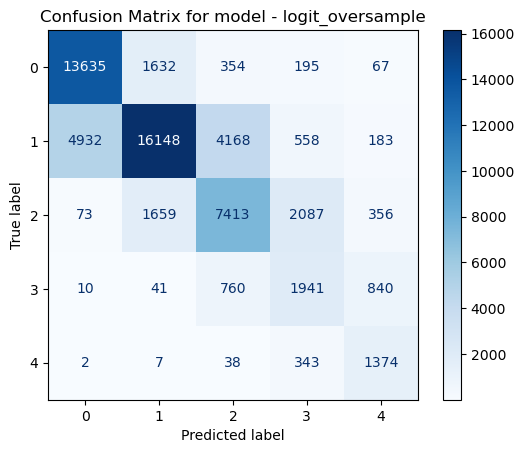

In [234]:
added_title_show_confusion_matrix("logit_oversample")

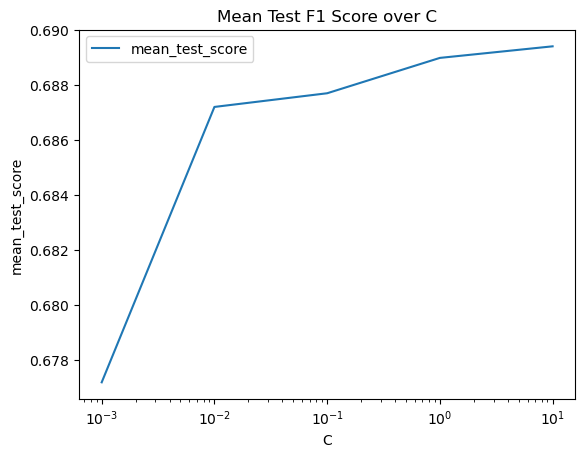

In [526]:
plot_test_score_over_hyper(model_name="logit_oversample",
                           x_dim = "C",
                           x_scale_log=True)

<div style="border-radius:10px; border: #ffd500 solid; padding: 15px; background-color: #ffffcf; font-size:100%; text-align:left">
<font size="4px" color="#ffa600"><b>💬 Comment:</b></font>

- From the graph above, for the choice of `C`, we can choose `1` as it has the highest test score. Perhaps we can add more value in the grid search for `C`.
- For class `3` in the classification report, we found that the f1-score increased compared to without oversampling. However, the f1-score of other classes drop a little.
- In overall, the weighted f1 score slightly dropped compared to without oversampling.
- Now, move to another type of oversampling -- SMOTENC.
    
<div>

#### Logistic Regression + SMOTENC sampling

In [520]:
from sklearn.linear_model import LogisticRegression

def model(test = False):
    model = MyModel(X_train,X_test,
                    y_train,y_test,
                    train_subsample_size=global_subsampling_pct,
                    test_subsample_size=global_subsampling_pct)
    
    # Apply Subsampling for faster training in experimental stage
    model.init_subsampling() # Subsample data for faster deployment
    
    model.init_smotenc() # Oversampling for class imabalance

    # Instantiate encoder steps
    model.init_one_hot_encoding(columns=["vehicle_type","drivetrain","transmission","engine_block"])
    model.init_target_encoding(columns=["make","model","trim","body_type"])
    model.init_encoder() # Activate all encoders and add to pipeline
    
    # Instantiate scaler steps
    model.init_standard_scaler(columns=["make","model","trim","body_type"])
    model.init_scaler() # Activate all scalers and add to pipeline

    # Instantiate model and add to pipeline
    model_name = "logit_smotenc"
    model.init_model(name = model_name,
                     model = LogisticRegression()
                    )
    
    # Instantiate the entire pipeline
    model.init_pipeline()

    # Set K-Fold CV
    model.set_kfold_cv(5)
    
    # Instantiate the grid search
    model.init_grid_search(params={f"{model_name}__C":[10**i for i in [-3,-2,-1,0,1,2,3]],
                                   f"{model_name}__penalty":["l2"], # Avoid Overfitting
                                   f"{model_name}__max_iter":[10000],
                                   f"{model_name}__class_weight":[None], # Class Imbalance
                                  },
                           n_job = 3
                          )

    # Fit the Pipeline
    model.fit()
    
    # Make Prediction on X_test
    model.predict()
    
    # Print the train score (without GridSearch) / best train score (with GridSearch)
    model.print_best_train_score()
    
    # Print the test score
    model.print_test_score()
    
    # Print the best params
    model.print_best_params()
    
    # Print the confusion matrix
    model.print_confusion_matrix()

    # Add model performance
    global perf
    perf = model.add_perf(perf,test)
        
    # Save the model
    model.save_model()
    
    return model

# Run this model
logit_smotenc = model()

2023-11-20 22:19:13 - INFO >>> =============== Data Shape ===============
2023-11-20 22:19:13 - INFO >>> X_train: (1764450, 21) | y_train: (1764450,)
2023-11-20 22:19:13 - INFO >>> X_test : (588151, 21) | y_test : (588151,)
2023-11-20 22:19:13 - INFO >>> 
2023-11-20 22:19:13 - INFO >>> Sub-sampling on Train Data...
2023-11-20 22:19:16 - INFO >>> Subsampling Completed | Time elapsed: 	0 hours 00 minutes 02 seconds
2023-11-20 22:19:16 - INFO >>> =============== After Subsampling ===============
2023-11-20 22:19:16 - INFO >>> X_train: (176445, 21) | y_train: (176445,)
2023-11-20 22:19:16 - INFO >>> X_test : (58816, 21) | y_test : (58816,)
2023-11-20 22:19:16 - INFO >>> 
2023-11-20 22:19:16 - INFO >>> SMOTENC Over Sampling on Train Data...
2023-11-20 22:23:03 - INFO >>> SMOTENC Over Sampling Completed | Time elapsed: 	0 hours 03 minutes 47 seconds
2023-11-20 22:23:03 - INFO >>> =============== After SMOTENC Over Sampling ===============
2023-11-20 22:23:03 - INFO >>> X_train: (389830, 21) 

##### Model Performance

In [527]:
res = perf.get_data()
res[res["model_name"]=="logit_smotenc"]

,timestamp,test,model_name,model,scoring,grid_search,best_params,best_train_score,params,train_score,test_score,confusion_matrix,classification_report,sub_sampling,sub_sampling_time,sub_sampling_pct_X_train,sub_sampling_pct_X_test,over_sampling,over_sampling_time,X_train_shape,X_test_shape,target_encoding,target_encoding_col,one_hot_encoding,one_hot_encoding_col,standard_scaling,standard_scaling_col,min_max_scaling,min_max_scaling_col,drop_column,dropped_columns,pca,pca_n_components,sampling,sampling_method,sampling_time,final_train_score
3,2023-11-20 22:53:08,False,logit_smotenc,LogisticRegression,f1_weighted,True,"{'logit_smotenc__C': 1, 'logit_smotenc__class_...",0.704041,NaN,NaN,0.692522,[[13612 1662 362 183 64]\n [ 5069 1622...,NaN,True,2.933361,0.1,0.1,False,0,"(389830, 21)","(58816, 21)",True,"['make', 'model', 'trim', 'body_type']",True,"['vehicle_type', 'drivetrain', 'transmission',...",True,"['make', 'model', 'trim', 'body_type']",False,[],False,[],False,NaN,True,SMOTENC Over Sampling,227.103442,0.704041


<div style="border-radius:10px; border: #ffd500 solid; padding: 15px; background-color: #ffffcf; font-size:100%; text-align:left">
<font size="4px" color="#ffa600"><b>💬 Comment:</b></font>
    
- Model Performance:
|Model|alias|Best Params / Params|training F1|testing F1|
|---|---|---|:---:|:---:|
|`Logistic Regression`|logit_smotenc|`{'C': 1, 'class_weight': None, 'max_iter': 10000, 'penalty': 'l2'}`|`70.40%`|`69.25%`|
    
<div>

##### Model Evaluation

In [528]:
# Print Classification Report
logit_smotenc.print_classification_report()

2023-11-20 22:58:24 - INFO >>> =============== Classification Report on Test Data ===============
              precision    recall  f1-score   support

           0       0.72      0.86      0.79     15883
           1       0.83      0.62      0.71     25989
           2       0.59      0.64      0.61     11588
           3       0.39      0.55      0.45      3592
           4       0.52      0.75      0.61      1764

    accuracy                           0.69     58816
   macro avg       0.61      0.68      0.63     58816
weighted avg       0.71      0.69      0.69     58816



In [529]:
logit_smotenc.print_confusion_matrix()

2023-11-20 22:58:24 - INFO >>> =============== Confusion Matrix on Test Data ===============
          predict_1  predict_2  predict_3  predict_4  predict_5
actual_1      13612       1662        362        183         64
actual_2       5069      16220       4004        530        166
actual_3         95       1723       7426       2040        304
actual_4         12         46        857       1962        715
actual_5          3          9         44        377       1331


2023-11-22 17:51:59 - INFO >>> Printing Confusion Matrix for logit_smotenc


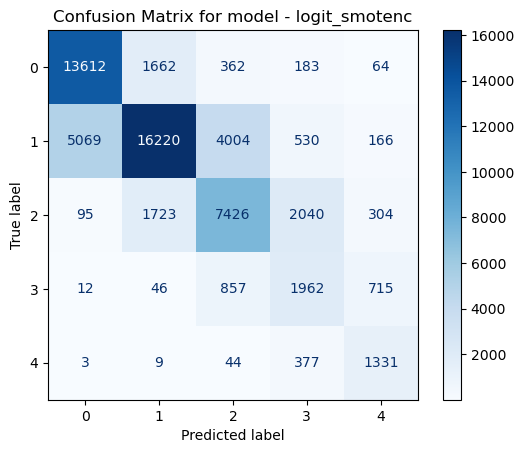

In [235]:
added_title_show_confusion_matrix("logit_smotenc")

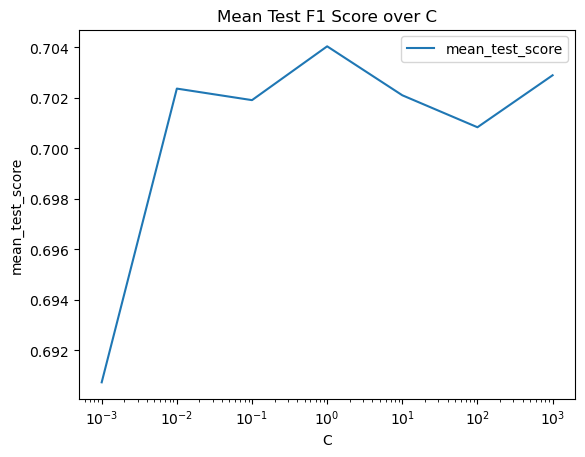

In [531]:
plot_test_score_over_hyper(model_name="logit_smotenc",
                           x_dim = "C",
                           x_scale_log=True)

<div style="border-radius:10px; border: #ffd500 solid; padding: 15px; background-color: #ffffcf; font-size:100%; text-align:left">
<font size="4px" color="#ffa600"><b>💬 Comment:</b></font>


- Similar to `OverSampling`, we found that the f1-score in price range `4` increased compared to without oversampling. However, the f1-score of other classes drop a little.
- From the graph above, for the choice of `C`, we can choose `1` as it has the highest test score
- In overall, the weighted f1 score slightly dropped compared to without oversampling.
- Now, move to another type of oversampling -- Hybrid.
    
<div>

#### Logistic Regression + Hybrid sampling

In [533]:
from sklearn.linear_model import LogisticRegression

def model(test = False):
    model = MyModel(X_train,X_test,
                    y_train,y_test,
                    train_subsample_size=global_subsampling_pct,
                    test_subsample_size=global_subsampling_pct)
    
    # Apply Subsampling for faster training in experimental stage
    model.init_subsampling() # Subsample data for faster deployment
    
    # Classes with less sample than class 3 will be oversampled
    # Classes with more sample than class 3 will be undersampled    
    model.init_hybrid_sampling(3) # Oversampling for class imabalance

    # Instantiate encoder steps
    model.init_one_hot_encoding(columns=["vehicle_type","drivetrain","transmission","engine_block"])
    model.init_target_encoding(columns=["make","model","trim","body_type"])
    model.init_encoder() # Activate all encoders and add to pipeline
    
    # Instantiate scaler steps
    model.init_standard_scaler(columns=["make","model","trim","body_type"])
    model.init_scaler() # Activate all scalers and add to pipeline

    # Instantiate model and add to pipeline
    model_name = "logit_hybrid"
    model.init_model(name = model_name,
                     model = LogisticRegression()
                    )
    
    # Instantiate the entire pipeline
    model.init_pipeline()

    # Set K-Fold CV
    model.set_kfold_cv(5)
    
    # Instantiate the grid search
    model.init_grid_search(params={f"{model_name}__C":[10**i for i in [-3,-2,-1,0,1,2,3]],
                                   f"{model_name}__penalty":["l2"], # Avoid Overfitting
                                   f"{model_name}__max_iter":[10000],
                                   f"{model_name}__class_weight":[None], # Class Imbalance
                                  },
                           n_job = 3
                          )

    # Fit the Pipeline
    model.fit()
    
    # Make Prediction on X_test
    model.predict()
    
    # Print the train score (without GridSearch) / best train score (with GridSearch)
    model.print_best_train_score()
    
    # Print the test score
    model.print_test_score()
    
    # Print the best params
    model.print_best_params()
    
    # Print the confusion matrix
    model.print_confusion_matrix()

    # Add model performance
    global perf
    perf = model.add_perf(perf,test)
        
    # Save the model
    model.save_model()
    
    return model

# Run this model
logit_hybrid = model()

2023-11-20 23:02:59 - INFO >>> =============== Data Shape ===============
2023-11-20 23:02:59 - INFO >>> X_train: (1764450, 21) | y_train: (1764450,)
2023-11-20 23:02:59 - INFO >>> X_test : (588151, 21) | y_test : (588151,)
2023-11-20 23:02:59 - INFO >>> 
2023-11-20 23:02:59 - INFO >>> Sub-sampling on Train Data...
2023-11-20 23:03:02 - INFO >>> Subsampling Completed | Time elapsed: 	0 hours 00 minutes 02 seconds
2023-11-20 23:03:02 - INFO >>> =============== After Subsampling ===============
2023-11-20 23:03:02 - INFO >>> X_train: (176445, 21) | y_train: (176445,)
2023-11-20 23:03:02 - INFO >>> X_test : (58816, 21) | y_test : (58816,)
2023-11-20 23:03:02 - INFO >>> 
2023-11-20 23:03:02 - INFO >>> Hybrid Samping on Train Data...
2023-11-20 23:03:02 - INFO >>> Hybrid Samping Completed | Time elapsed: 	0 hours 00 minutes 00 seconds
2023-11-20 23:03:02 - INFO >>> =============== After Hybrid Samping ===============
2023-11-20 23:03:02 - INFO >>> X_train: (173815, 21) | y_train: (173815,)


##### Model Performance

In [534]:
res = perf.get_data()
res[res["model_name"]=="logit_hybrid"]

,timestamp,test,model_name,model,scoring,grid_search,best_params,best_train_score,params,train_score,test_score,confusion_matrix,classification_report,sub_sampling,sub_sampling_time,sub_sampling_pct_X_train,sub_sampling_pct_X_test,over_sampling,over_sampling_time,X_train_shape,X_test_shape,target_encoding,target_encoding_col,one_hot_encoding,one_hot_encoding_col,standard_scaling,standard_scaling_col,min_max_scaling,min_max_scaling_col,drop_column,dropped_columns,pca,pca_n_components,sampling,sampling_method,sampling_time,final_train_score
2,2023-11-20 23:13:42,False,logit_hybrid,LogisticRegression,f1_weighted,True,"{'logit_hybrid__C': 10, 'logit_hybrid__class_w...",0.688961,NaN,NaN,0.69159,[[13643 1581 389 205 65]\n [ 5067 1605...,NaN,True,2.978065,0.1,0.1,NaN,NaN,"(173815, 21)","(58816, 21)",True,"['make', 'model', 'trim', 'body_type']",True,"['vehicle_type', 'drivetrain', 'transmission',...",True,"['make', 'model', 'trim', 'body_type']",False,[],False,[],False,NaN,True,Hybrid Samping,0.518334,0.688961


<div style="border-radius:10px; border: #ffd500 solid; padding: 15px; background-color: #ffffcf; font-size:100%; text-align:left">
<font size="4px" color="#ffa600"><b>💬 Comment:</b></font>
    
- Model Performance:
|Model|alias|Best Params / Params|training F1|testing F1|
|---|---|---|:---:|:---:|
|`Logistic Regression`|logit_hybrid|`{'C': 10, 'class_weight': None, 'max_iter': 10000, 'penalty': 'l2'}`|`68.90%`|`69.16%`|
    
<div>

##### Model Evaluation

In [539]:
# Print Classification Report
logit_hybrid.print_classification_report()

2023-11-20 23:16:57 - INFO >>> =============== Classification Report on Test Data ===============
              precision    recall  f1-score   support

           0       0.73      0.86      0.79     15883
           1       0.83      0.62      0.71     25989
           2       0.58      0.64      0.61     11588
           3       0.38      0.55      0.45      3592
           4       0.49      0.78      0.60      1764

    accuracy                           0.69     58816
   macro avg       0.60      0.69      0.63     58816
weighted avg       0.72      0.69      0.69     58816



In [540]:
logit_hybrid.print_confusion_matrix()

2023-11-20 23:17:00 - INFO >>> =============== Confusion Matrix on Test Data ===============
          predict_1  predict_2  predict_3  predict_4  predict_5
actual_1      13643       1581        389        205         65
actual_2       5067      16052       4133        555        182
actual_3         77       1628       7442       2087        354
actual_4         11         36        763       1958        824
actual_5          2          5         36        340       1381


2023-11-22 17:52:17 - INFO >>> Printing Confusion Matrix for logit_hybrid


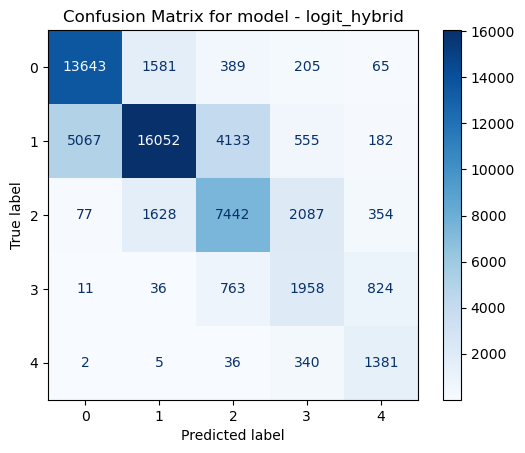

In [236]:
added_title_show_confusion_matrix("logit_hybrid")

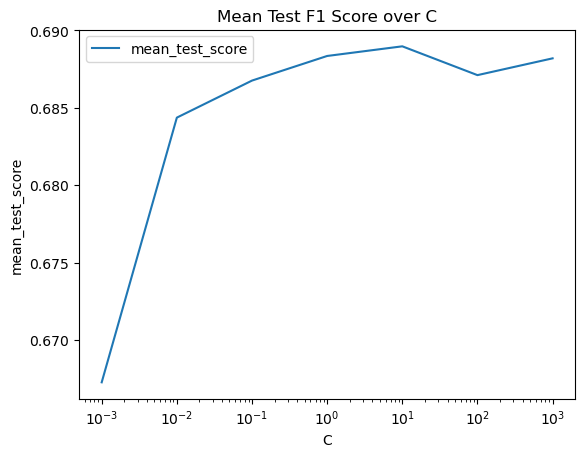

In [543]:
plot_test_score_over_hyper(model_name="logit_hybrid",
                           x_dim = "C",
                           x_scale_log=True)

<div style="border-radius:10px; border: #ffd500 solid; padding: 15px; background-color: #ffffcf; font-size:100%; text-align:left">
<font size="4px" color="#ffa600"><b>💬 Comment:</b></font>


- Similar to `OverSampling` & `SMOTENC` , we found that the f1-score in price range `4` increased compared to without oversampling. However, the f1-score of other classes drop a little.
- From the graph above, for the choice of `C`, we can choose `10` as it has the highest test score
- In overall, the weighted f1 score slightly dropped compared to without oversampling.
    
<div>

<div style="border-radius:10px; border: #ffd500 solid; padding: 15px; background-color: #ffffcf; font-size:100%; text-align:left">
<font size="4px" color="#ffa600"><b>💬 Comment:</b></font>
    
- Model Performance of **OverSampling** & **SMOTENC** & **Hybrid Sampling**:
|Model|alias|Best Params / Params|training F1|testing F1|
|---|---|---|:---:|:---:|
|`Logistic Regression`|logit|`{'C': 10000, 'class_weight': None,'max_iter': 10000,'penalty': 'l2'}`|`71.72%`|`71.79%`|
|`Logistic Regression`|logit_oversample|`{'C': 10, 'class_weight': None,'max_iter': 10000,'penalty': 'l2'}`|`68.94%`|`69.23%`|
|`Logistic Regression`|logit_smotenc|`{'C': 1, 'class_weight': None,'max_iter': 10000,'penalty': 'l2'}`|`70.40%`|`69.25%`|
|`Logistic Regression`|logit_hybrid|`{'C': 10, 'class_weight': None, 'max_iter': 10000, 'penalty': 'l2'}`|`68.90%`|`69.16%`|
    
- From this table, we can conclude that all three methods to tackle class imbalance can help minority classes to improve the F1-score while sacrificing some score from majority class.
- From the experiement above, we will move on with `SMOTENC` and `OverSampling` for next type of model.
    
<div>

#### Feature Selection

<div style="border-radius:10px; border: #ffd500 solid; padding: 15px; background-color: #ffffcf; font-size:100%; text-align:left">
<font size="4px" color="#ffa600"><b>🧠 Idea:</b></font>
    
- Before moving on to the next type of model, let's do some feature selection.
- Let check on the model coefficients in our logistic regression model.
<div>

In [549]:
this_model = logit.grid_search.best_estimator_[-1]
feature_importance = pd.DataFrame(this_model.coef_,
                                  index = [f"class_{i+1}" for i in this_model.classes_],
                                  columns=this_model.feature_names_in_)

feature_importance

,make,model,trim,body_type,vehicle_type_Truck,drivetrain_FWD,drivetrain_RWD,transmission_Manual,engine_block_I,engine_block_V,log_miles,year,engine_size,fuel_M85,fuel_Lpg,fuel_Diesel,fuel_Unleaded,fuel_Hydrogen,fuel_PremiumUnleaded,fuel_Biodiesel,fuel_E85,fuel_Electric,fuel_CompressedNaturalGas
class_1,0.045265,-2.220107,-1.317667,0.079583,-0.511909,0.823886,0.364037,0.658731,0.525913,-0.333029,2.556768,-0.013139,0.036260,0.000123,-0.000010,-0.050614,0.182995,0.000512,-0.163292,-0.002950,0.465179,-0.101430,0.004597
class_2,-0.033034,-1.057958,-0.757252,0.068744,-0.047688,0.299941,0.218427,-0.260254,0.177638,-0.473600,0.167242,0.001124,-0.189849,-0.000109,-0.000041,0.134381,0.160972,-0.000410,-0.217744,0.015096,0.557116,-0.062615,0.002135
class_3,-0.075664,0.214758,0.161175,0.014367,0.445189,-0.380972,-0.038377,-0.288115,-0.209758,0.282520,-0.580001,0.004147,-0.235198,-0.000010,0.000615,-0.377107,0.287254,-0.001092,0.095105,-0.006479,-0.464114,0.108449,-0.003284
class_4,-0.059253,1.222443,0.734670,-0.060125,0.297267,-0.541405,-0.409587,-0.084837,-0.165312,0.222975,-0.942926,0.004178,0.080007,-0.000003,-0.000390,-0.064570,-0.011200,0.001008,0.026162,-0.003945,-0.406323,0.009523,-0.002546
class_5,0.122685,1.840864,1.179075,-0.102570,-0.182859,-0.201449,-0.134500,-0.025525,-0.328480,0.301134,-1.201084,0.003690,0.308780,-0.000002,-0.000173,0.357910,-0.620021,-0.000018,0.259770,-0.001722,-0.151858,0.046073,-0.000903


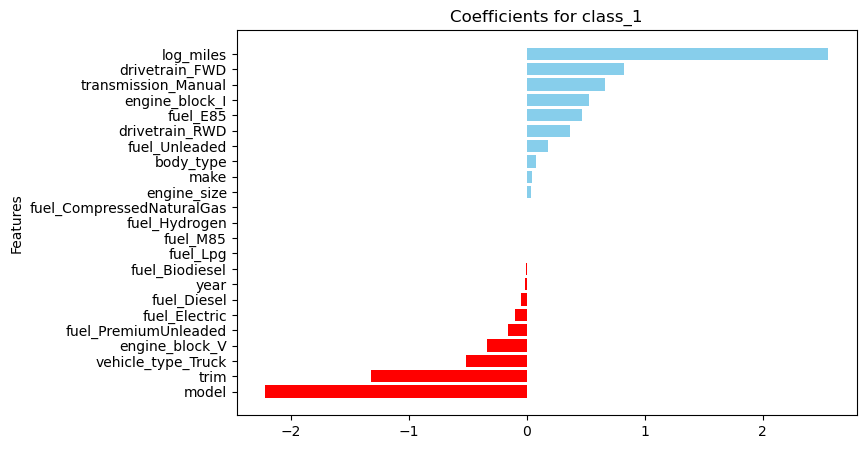

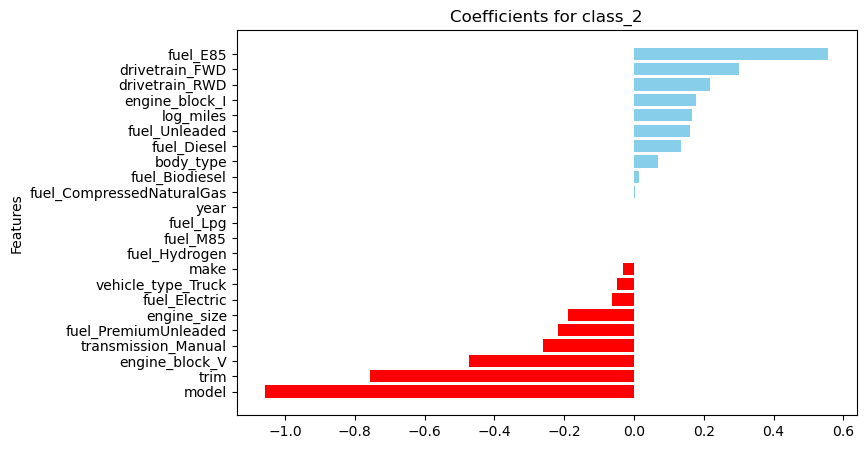

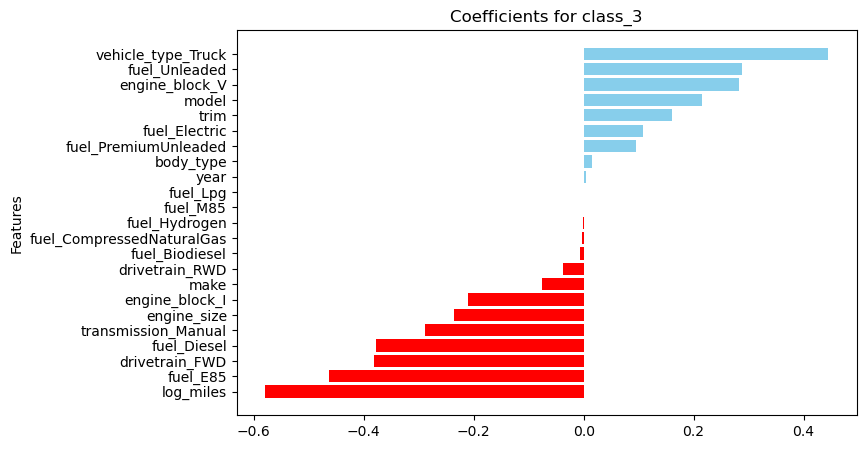

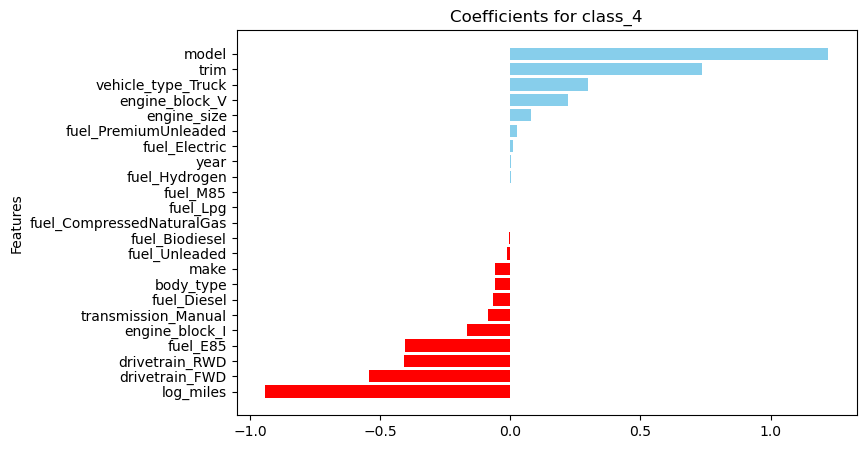

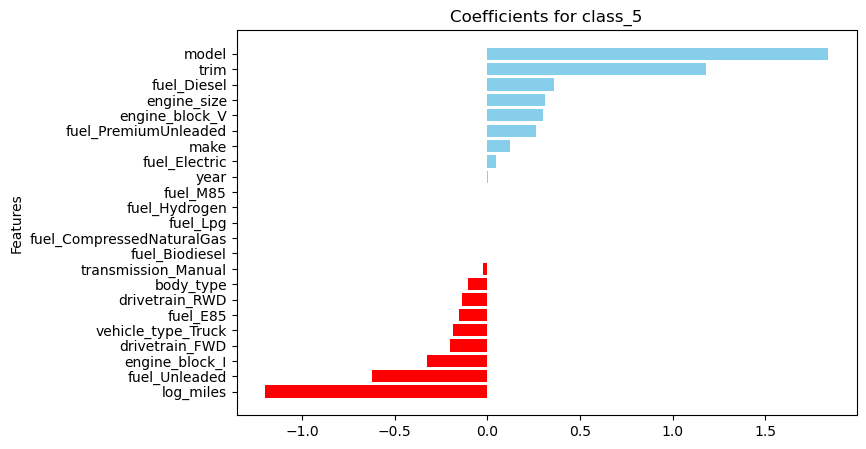

In [578]:
for ind in feature_importance.index:
    # Set plot size
    plt.figure(figsize=(8,5))
    
    # Filter each class
    temp_df = feature_importance.loc[ind,].sort_values()
    
    # Get Negative Coefficient
    neg_coef = temp_df[temp_df<=0].sort_values()
    plt.barh(neg_coef.index,neg_coef.values,color = "red")
    
    # Get Positive Coefficient
    pos_coef = temp_df[temp_df>0].sort_values()
    plt.barh(pos_coef.index,pos_coef.values,color = "skyblue")
    
    #
    plt.title(f"Coefficients for {ind}")
    plt.ylabel("Features")
    plt.show()

<div style="border-radius:10px; border: #ffd500 solid; padding: 15px; background-color: #ffffcf; font-size:100%; text-align:left">
<font size="4px" color="#ffa600"><b>💬 Comment:</b></font>
    
- From the above 5 graphs, we can see the important features for predicting each price range.
- For example, in price range of `1`, `log_miles` and `drivetrain_FWD` is the most positive, which means if a vehicle has more miles travelled (`log_miles`) and it is driven with `FWD` drivetrain system, that vehicle is more likely to be class 1.
- On the contrary , in price range of `1`, `model` and `trim` is the most negative. As we applied `target encoding` on them, the encoded values represent the mean of the target price range of the each distinct value in that features.
- Higher value in `model` generally leads to higher price range (less likely to be price range `1`)

    
<div>

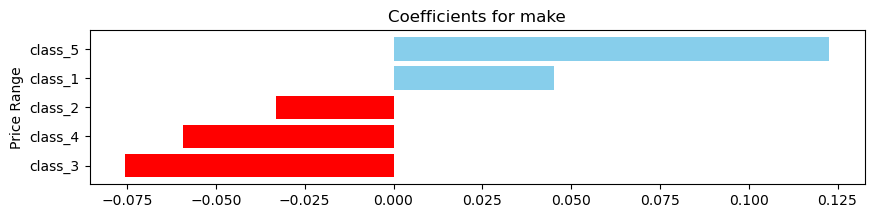

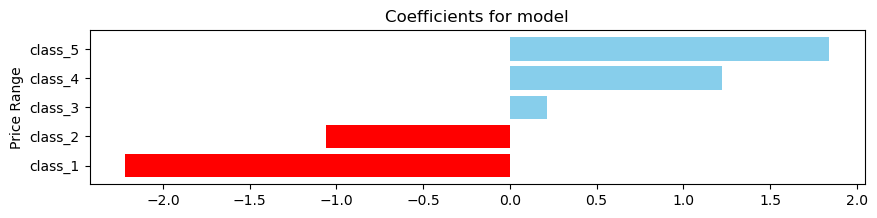

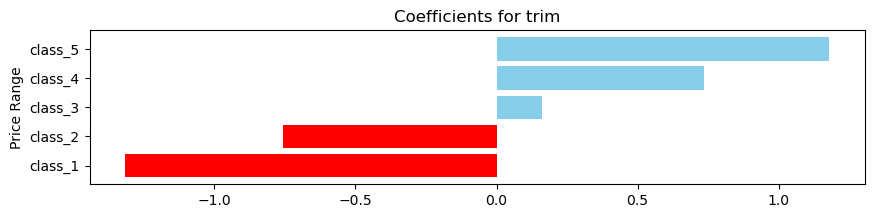

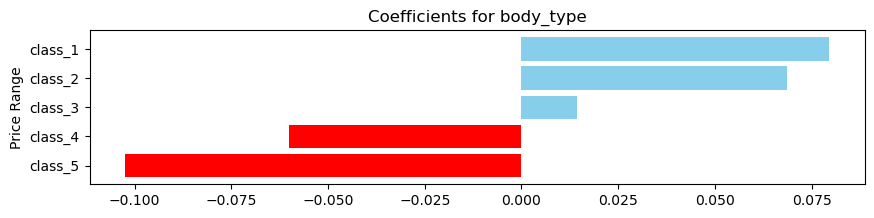

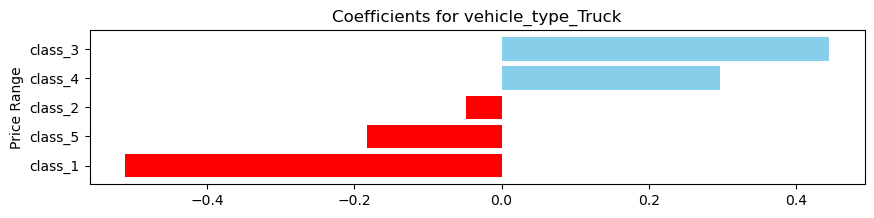

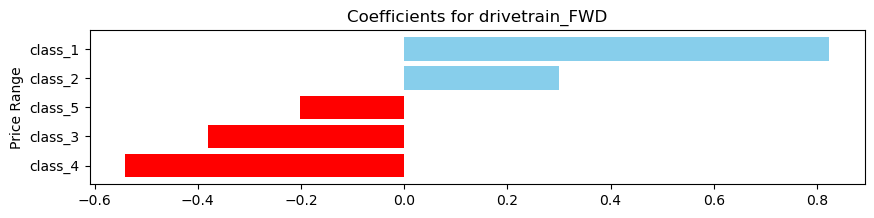

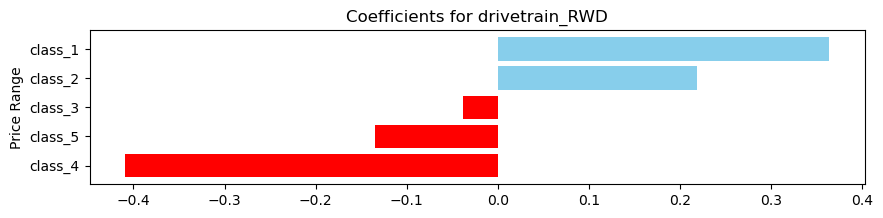

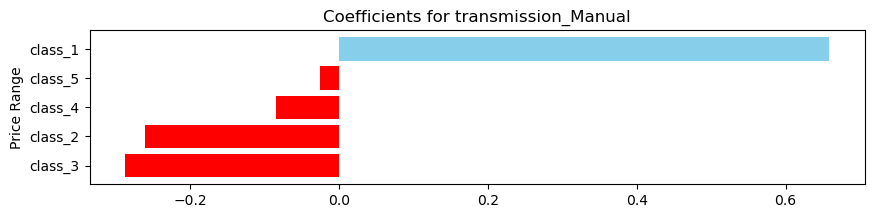

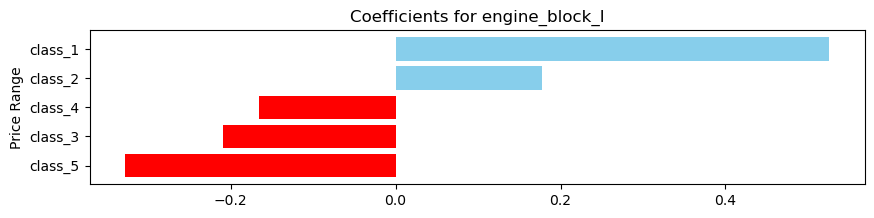

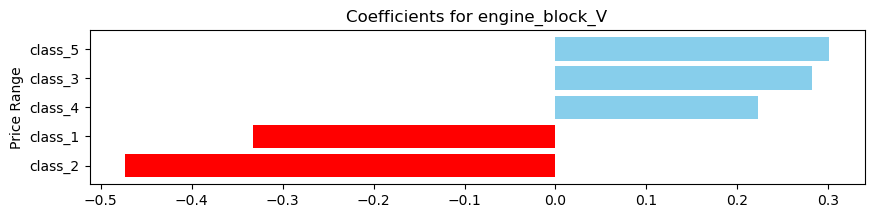

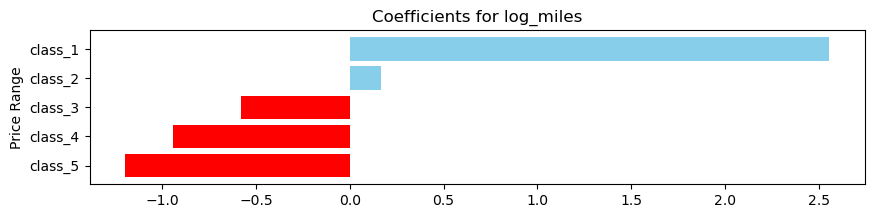

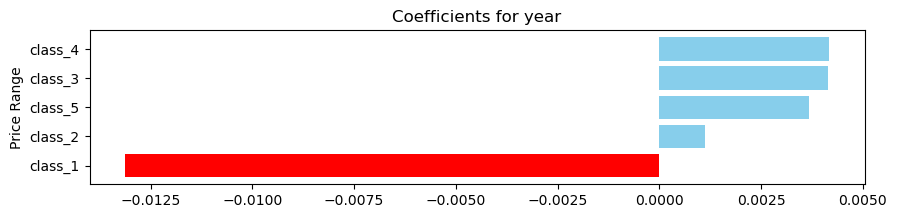

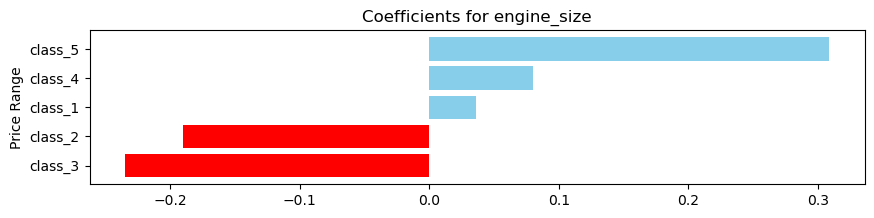

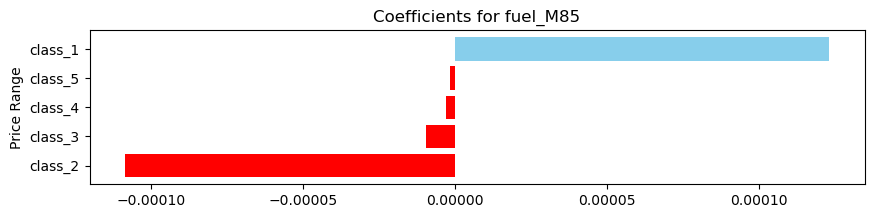

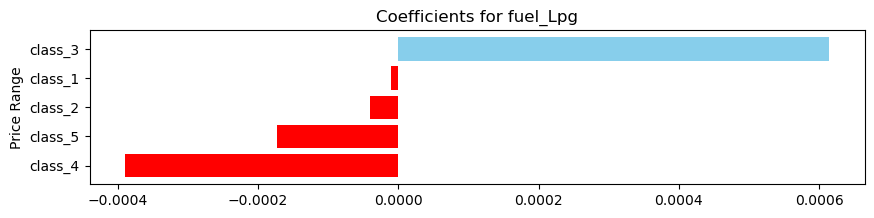

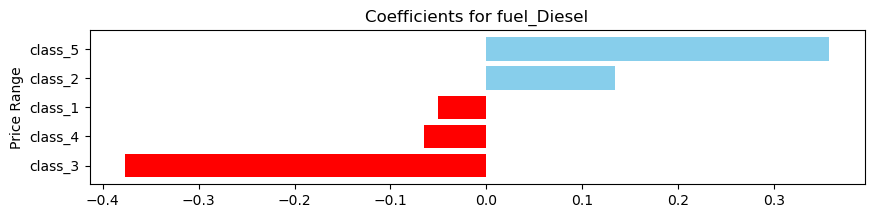

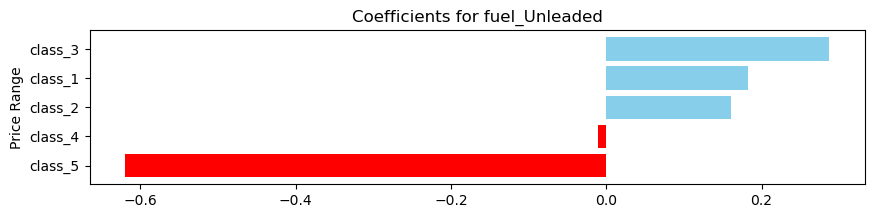

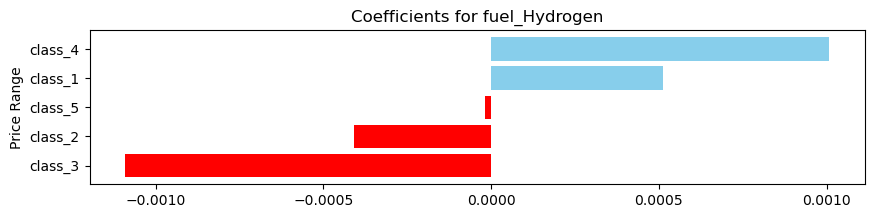

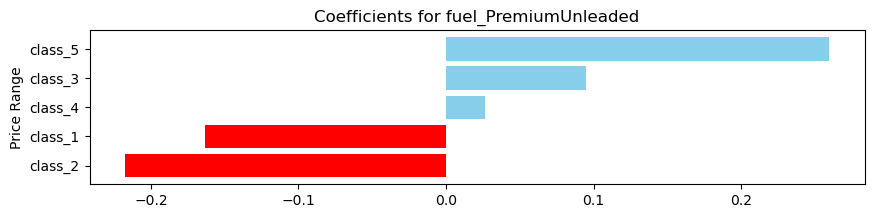

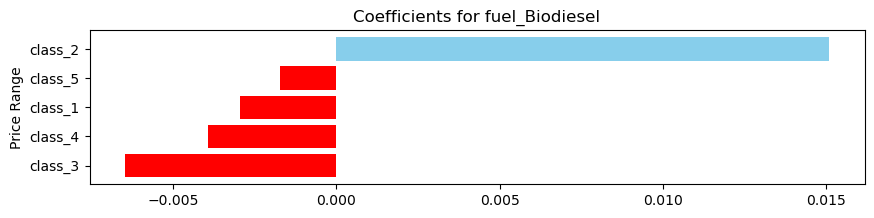

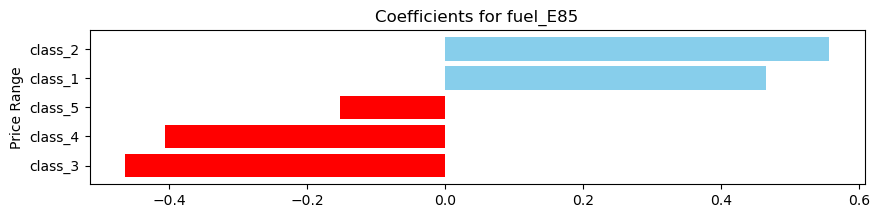

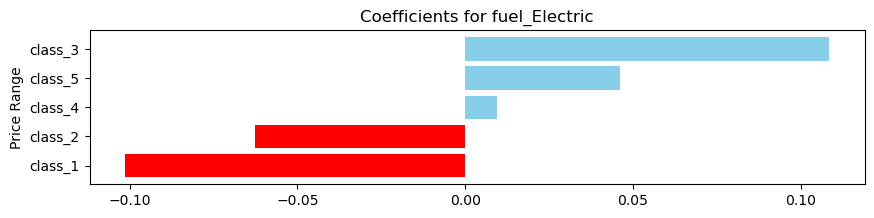

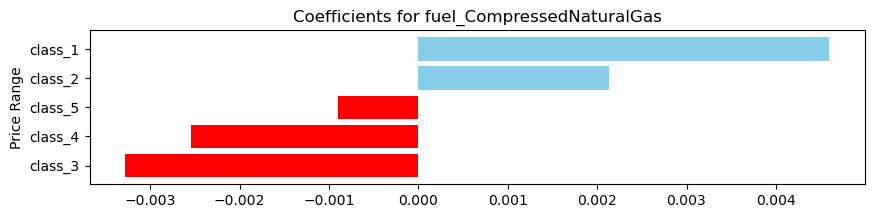

In [583]:
for col in feature_importance.columns:
    # Set plot size
    plt.figure(figsize=(10,2))
    
    # Filter each class
    temp_df = feature_importance[col].sort_values()
    
    # Get Negative Coefficient
    neg_coef = temp_df[temp_df<=0].sort_values()
    plt.barh(neg_coef.index,neg_coef.values,color = "red")
    
    # Get Positive Coefficient
    pos_coef = temp_df[temp_df>0].sort_values()
    plt.barh(pos_coef.index,pos_coef.values,color = "skyblue")
    
    # Plot title
    plt.title(f"Coefficients for {col}")
    plt.ylabel("Price Range")

    plt.show()

<div style="border-radius:10px; border: #ffd500 solid; padding: 15px; background-color: #ffffcf; font-size:100%; text-align:left">
<font size="4px" color="#ffa600"><b>💬 Comment:</b></font>
    
- From the graphs above, we see that some features give descent graphs that the price ranges on y-axis are sorted in order. This means these features have high predictive power in our task.
- For some features (`fuel_M85`, `fuel_Lpg`, `fuel_Hydrogen`), they have relatively smaller value.
- Let's check again the feature importance table.
    
<div>

In [588]:
feature_importance

,make,model,trim,body_type,vehicle_type_Truck,drivetrain_FWD,drivetrain_RWD,transmission_Manual,engine_block_I,engine_block_V,log_miles,year,engine_size,fuel_M85,fuel_Lpg,fuel_Diesel,fuel_Unleaded,fuel_Hydrogen,fuel_PremiumUnleaded,fuel_Biodiesel,fuel_E85,fuel_Electric,fuel_CompressedNaturalGas
class_1,0.045265,-2.220107,-1.317667,0.079583,-0.511909,0.823886,0.364037,0.658731,0.525913,-0.333029,2.556768,-0.013139,0.036260,0.000123,-0.000010,-0.050614,0.182995,0.000512,-0.163292,-0.002950,0.465179,-0.101430,0.004597
class_2,-0.033034,-1.057958,-0.757252,0.068744,-0.047688,0.299941,0.218427,-0.260254,0.177638,-0.473600,0.167242,0.001124,-0.189849,-0.000109,-0.000041,0.134381,0.160972,-0.000410,-0.217744,0.015096,0.557116,-0.062615,0.002135
class_3,-0.075664,0.214758,0.161175,0.014367,0.445189,-0.380972,-0.038377,-0.288115,-0.209758,0.282520,-0.580001,0.004147,-0.235198,-0.000010,0.000615,-0.377107,0.287254,-0.001092,0.095105,-0.006479,-0.464114,0.108449,-0.003284
class_4,-0.059253,1.222443,0.734670,-0.060125,0.297267,-0.541405,-0.409587,-0.084837,-0.165312,0.222975,-0.942926,0.004178,0.080007,-0.000003,-0.000390,-0.064570,-0.011200,0.001008,0.026162,-0.003945,-0.406323,0.009523,-0.002546
class_5,0.122685,1.840864,1.179075,-0.102570,-0.182859,-0.201449,-0.134500,-0.025525,-0.328480,0.301134,-1.201084,0.003690,0.308780,-0.000002,-0.000173,0.357910,-0.620021,-0.000018,0.259770,-0.001722,-0.151858,0.046073,-0.000903


<div style="border-radius:10px; border: #ffd500 solid; padding: 15px; background-color: #ffffcf; font-size:100%; text-align:left">
<font size="4px" color="#ffa600"><b>💬 Comment:</b></font>
    
- From the coefficient table, we see that some columns are very close 0. It means these columns may not be useful for our model.
- Let's try to drop them away. Convert all values to absolute values and take average of all 5 models. If the aggregated value is smaller then 0.01.
    
<div>

In [589]:
agg = feature_importance.abs().mean()
col_to_drop = list(agg[agg <= 0.01].index)
col_to_drop

['year',
 'fuel_M85',
 'fuel_Lpg',
 'fuel_Hydrogen',
 'fuel_Biodiesel',
 'fuel_CompressedNaturalGas']

#### Logistic Regression + Feature Selection

In [598]:
from sklearn.linear_model import LogisticRegression

def model(test = False):
    model = MyModel(X_train,X_test,
                    y_train,y_test,
                    train_subsample_size=global_subsampling_pct,
                    test_subsample_size=global_subsampling_pct)
    
    # Drop non-important columns
    global col_to_drop
    model.init_drop_columns(col_to_drop)

    # Apply Subsampling for faster training in experimental stage
    model.init_subsampling() # Subsample data for faster deployment

    # Instantiate encoder steps
    model.init_one_hot_encoding(columns=["vehicle_type","drivetrain","transmission","engine_block"])
    model.init_target_encoding(columns=["make","model","trim","body_type"])
    model.init_encoder() # Activate all encoders and add to pipeline

    # Instantiate scaler steps
    model.init_standard_scaler(columns=["make","model","trim","body_type"])
    model.init_scaler() # Activate all scalers and add to pipeline

    # Instantiate model and add to pipeline
    model_name = "logit_dropped"
    model.init_model(name = model_name,
                     model = LogisticRegression()
                    )
    
    # Instantiate the entire pipeline
    model.init_pipeline()

    # Set K-Fold CV
    model.set_kfold_cv(5)
    
    # Instantiate the grid search
    model.init_grid_search(params={f"{model_name}__C":[10**i for i in [-5,-4,-3,-2,-1,0,1,2,3,4,5]],
                                   f"{model_name}__penalty":["l2"], # Avoid Overfitting
                                   f"{model_name}__max_iter":[10000],
                                   f"{model_name}__class_weight":[None,"balanced"], # Class Imbalance
                                  },
                           n_job = 3
                          )

    # Fit the Pipeline
    model.fit()
    
    # Make Prediction on X_test
    model.predict()
    
    # Print the train score (without GridSearch) / best train score (with GridSearch)
    model.print_best_train_score()
    
    # Print the test score
    model.print_test_score()
    
    # Print the best params
    model.print_best_params()
    
    # Print the confusion matrix
    model.print_confusion_matrix()

    # Add model performance
    global perf
    perf = model.add_perf(perf,test)
        
    # Save Model
    model.save_model()
    
    return model

# Run this model
logit_dropped = model()

2023-11-21 00:49:42 - INFO >>> =============== Data Shape ===============
2023-11-21 00:49:42 - INFO >>> X_train: (1764450, 21) | y_train: (1764450,)
2023-11-21 00:49:42 - INFO >>> X_test : (588151, 21) | y_test : (588151,)
2023-11-21 00:49:42 - INFO >>> 
2023-11-21 00:49:42 - INFO >>> Dropping Columns...
2023-11-21 00:49:42 - INFO >>> Dropping Columns Completed | Time elapsed: 	0 hours 00 minutes 00 seconds
2023-11-21 00:49:42 - INFO >>> =============== After Dropping Columns ===============
2023-11-21 00:49:42 - INFO >>> X_train: (1764450, 15) | y_train: (1764450,)
2023-11-21 00:49:42 - INFO >>> X_test : (588151, 15) | y_test : (588151,)
2023-11-21 00:49:42 - INFO >>> 
2023-11-21 00:49:42 - INFO >>> Sub-sampling on Train Data...
2023-11-21 00:49:45 - INFO >>> Subsampling Completed | Time elapsed: 	0 hours 00 minutes 02 seconds
2023-11-21 00:49:45 - INFO >>> =============== After Subsampling ===============
2023-11-21 00:49:45 - INFO >>> X_train: (176445, 15) | y_train: (176445,)
2023

##### Model Performance

In [622]:
res = perf.get_data()
res[res["model_name"]=="logit_dropped"]

,timestamp,test,model_name,model,scoring,grid_search,best_params,best_train_score,params,train_score,test_score,confusion_matrix,classification_report,sub_sampling,sub_sampling_time,sub_sampling_pct_X_train,sub_sampling_pct_X_test,over_sampling,over_sampling_time,X_train_shape,X_test_shape,target_encoding,target_encoding_col,one_hot_encoding,one_hot_encoding_col,standard_scaling,standard_scaling_col,min_max_scaling,min_max_scaling_col,drop_column,dropped_columns,pca,pca_n_components,sampling,sampling_method,sampling_time,final_train_score
5,2023-11-21 01:17:34,False,logit_dropped,LogisticRegression,f1_weighted,True,"{'logit_dropped__C': 1000, 'logit_dropped__cla...",0.717744,NaN,NaN,0.718124,[[12449 3014 350 53 17]\n [ 2776 2080...,NaN,True,2.767544,0.1,0.1,NaN,NaN,"(176445, 15)","(58816, 15)",True,"['make', 'model', 'trim', 'body_type']",True,"['vehicle_type', 'drivetrain', 'transmission',...",True,"['make', 'model', 'trim', 'body_type']",False,[],True,[],False,NaN,False,NaN,NaN,0.717744


<div style="border-radius:10px; border: #ffd500 solid; padding: 15px; background-color: #ffffcf; font-size:100%; text-align:left">
<font size="4px" color="#ffa600"><b>💬 Comment:</b></font>
    
- Model Performance:
|Model|alias|Columns Dropped|Best Params / Params|training F1|testing F1|
|---|---|---|---|:---:|:---:|
|`Logistic Regression`|logit_dropped|`['year', 'fuel_M85', 'fuel_Lpg', 'fuel_Hydrogen', 'fuel_Biodiesel', 'fuel_CompressedNaturalGas']`|`{'C': 1000, 'class_weight': None, 'max_iter': 10000, 'penalty': 'l2'}`|`71.77%`|`71.81%`|
    
<div>

##### Model Evaluation

In [600]:
# Print Classification Report
logit_dropped.print_classification_report()

2023-11-21 01:17:34 - INFO >>> =============== Classification Report on Test Data ===============
              precision    recall  f1-score   support

           0       0.82      0.78      0.80     15883
           1       0.75      0.80      0.78     25989
           2       0.59      0.64      0.62     11588
           3       0.48      0.26      0.34      3592
           4       0.66      0.53      0.59      1764

    accuracy                           0.72     58816
   macro avg       0.66      0.60      0.62     58816
weighted avg       0.72      0.72      0.72     58816



In [601]:
logit_dropped.print_confusion_matrix()

2023-11-21 01:17:34 - INFO >>> =============== Confusion Matrix on Test Data ===============
          predict_1  predict_2  predict_3  predict_4  predict_5
actual_1      12449       3014        350         53         17
actual_2       2776      20807       2244        120         42
actual_3         37       3640       7424        373        114
actual_4          3        180       2172        934        303
actual_5          2         30        345        451        936


2023-11-22 17:52:36 - INFO >>> Printing Confusion Matrix for logit_dropped


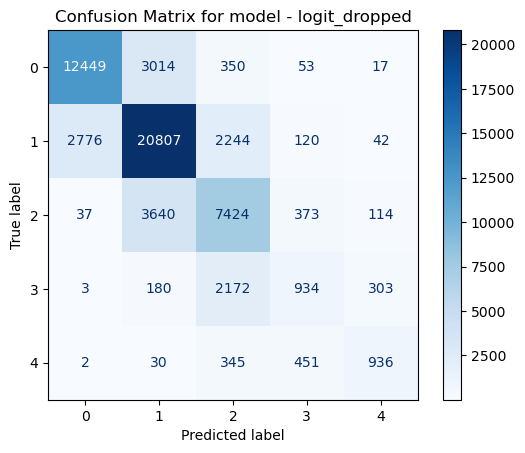

In [237]:
added_title_show_confusion_matrix("logit_dropped")

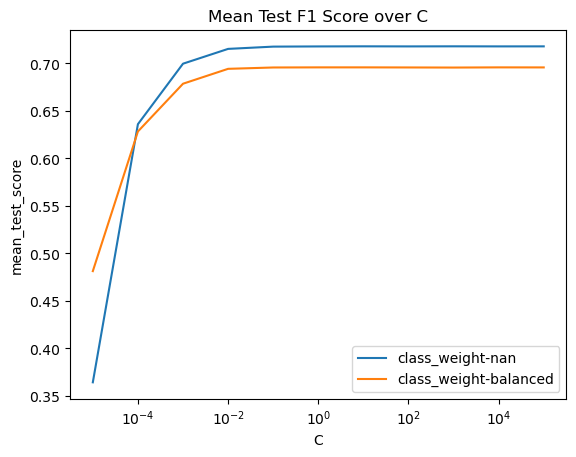

In [623]:
plot_test_score_over_hyper(model_name="logit_dropped",
                           x_dim = "C",
                           other_dims=["class_weight"],
                           x_scale_log=True)

<div style="border-radius:10px; border: #ffd500 solid; padding: 15px; background-color: #ffffcf; font-size:100%; text-align:left">
<font size="4px" color="#ffa600"><b>💬 Comment:</b></font>
    
- By comparing the logisitc regression model before and after dropping some columns, we obtained:
|Model|alias|Best Params / Params|training F1|testing F1|
|---|---|---|:---:|:---:|
|`Logistic Regression`|logit|`{'C': 10000, 'class_weight': None, 'max_iter': 10000, 'penalty': 'l2'}`|`71.72%`|`71.79%`|
|`Logistic Regression`|logit_dropped|`{'C': 1000, 'class_weight': None, 'max_iter': 10000, 'penalty': 'l2'}`|`71.77%`|`71.81%`|
    
- We can see that both train and test score improve when we drop out non-useful columns.
- From classification report, we can still see that the model does not work well for `class_3` (price range of `4`).
- From the test_score plot above, we should choose `None` in `class_weight` and `10^3` for hyperparameter of `C`.

    
<div>

#### Logistic Regression Summary

<div style="border-radius:10px; border: #ffd500 solid; padding: 15px; background-color: #ffffcf; font-size:100%; text-align:left">
<font size="4px" color="#ffa600"><b>🏆 Model Summary - Logistic Regression</b></font>


- Model Performance for all logistic regression, we obtained:
|Model|alias|Best Params / Params|training F1|testing F1|
|---|---|---|:---:|:---:|
|`Logistic Regression`|logit_baseline|`{'C': 1, 'class_weight': 'balanced','max_iter': 10000,'penalty': 'l2'}`|`69.74%`|`69.82%`|
|`Logistic Regression`|logit|`{'C': 10000, 'class_weight': None,'max_iter': 10000,'penalty': 'l2'}`|`71.72%`|`71.79%`|
|`Logistic Regression`|logit_oversample|`{'C': 10, 'class_weight': None,'max_iter': 10000,'penalty': 'l2'}`|`68.94%`|`69.23%`|
|`Logistic Regression`|logit_smotenc|`{'C': 1, 'class_weight': None,'max_iter': 10000,'penalty': 'l2'}`|`70.40%`|`69.25%`|
|`Logistic Regression`|logit_hybrid|`{'C': 10, 'class_weight': None, 'max_iter': 10000, 'penalty': 'l2'}`|`68.90%`|`69.16%`|
|`Logistic Regression`|logit_dropped|`{'C': 1000, 'class_weight': None, 'max_iter': 10000, 'penalty': 'l2'}`|`71.77%`|`71.81%`|

<div>

<div style="border-radius:10px; border: #ffd500 solid; padding: 15px; background-color: #ffffcf; font-size:100%; text-align:left">
<font size="4px" color="#ffa600"><b>💡 Insight - Logistic Regression</b></font>

- All `Oversampling` / `Hybrid Sampling` methods improve the f1-score for minority class by sacrificing the f1-score in majority class.
- Dropping irrelavant features could be useful to improve model performance.
- We will use the `logit_dropped` in the next stage to train with full set of data.

Let's move to **Decision Tree**.
<div>


---


<div style="border-radius:10px; border:#33a0ff solid; padding: 15px; DataFrameground-color: #f0f1ff; font-size:100%; text-align:left">
<a class="anchor" id="4-model">
    <h3> Model - Decision Tree </h3>
</a>
    
Other than Logistics Regression, we can also try to use Decision Tree.

</div>

<div style="border-radius:10px; border: #ffd500 solid; padding: 15px; background-color: #ffffcf; font-size:100%; text-align:left">
<font size="4px" color="#ffa600"><b>⚠️ Note:</b></font>

- For Decision Tree, we can skip the scaling the data as decision tree optimization is not based on distance of value.
- For Decision Tree, we will run the typical `Decision Tree`, and trees with `OverSampling` and `SMOTENC`
<div>

#### Decision Tree with Grid Search

In [643]:
from sklearn.tree import DecisionTreeClassifier

def model(test = False):
    model = MyModel(X_train,X_test,
                    y_train,y_test,
                    train_subsample_size=global_subsampling_pct,
                    test_subsample_size=global_subsampling_pct)

    # Apply Subsampling for faster training in experimental stage
    model.init_subsampling() # Subsample data for faster deployment

    # Instantiate encoder steps
    model.init_one_hot_encoding(columns=["vehicle_type","drivetrain","transmission","engine_block"])
    model.init_target_encoding(columns=["make","model","trim","body_type"])
    model.init_encoder() # Activate all encoders and add to pipeline

    # Instantiate model and add to pipeline
    this_model_name = "dtc"
    model.init_model(name = this_model_name,
                     model = DecisionTreeClassifier(random_state=42))
    
    # Instantiate the entire pipeline
    model.init_pipeline()
    
    # Set K-Fold CV
    model.set_kfold_cv(5)
    
    # Instantiate the grid search
    model.init_grid_search(params={f"{this_model_name}__max_depth":[5,10,25,50,100,250,500],
                                   f"{this_model_name}__min_samples_split":[10,25,50,100,250,500]
                                  },
                           n_job = 3
                          )

    # Fit the Pipeline
    model.fit()
    
    # Make Prediction on X_test
    model.predict()
    
    # Print the train score (without GridSearch) / best train score (with GridSearch)
    model.print_best_train_score()
    
    # Print the test score
    model.print_test_score()
    
    # Print the best params
    model.print_best_params()
    
    # Print the confusion matrix
    model.print_confusion_matrix()

    # Add model performance
    global perf
    perf = model.add_perf(perf,test)
        
    # Save Model
    model.save_model()
    
    return model

# Run this model
dtc = model()

2023-11-21 02:06:49 - INFO >>> =============== Data Shape ===============
2023-11-21 02:06:49 - INFO >>> X_train: (1764450, 21) | y_train: (1764450,)
2023-11-21 02:06:49 - INFO >>> X_test : (588151, 21) | y_test : (588151,)
2023-11-21 02:06:49 - INFO >>> 
2023-11-21 02:06:49 - INFO >>> Sub-sampling on Train Data...
2023-11-21 02:06:51 - INFO >>> Subsampling Completed | Time elapsed: 	0 hours 00 minutes 02 seconds
2023-11-21 02:06:51 - INFO >>> =============== After Subsampling ===============
2023-11-21 02:06:51 - INFO >>> X_train: (176445, 21) | y_train: (176445,)
2023-11-21 02:06:51 - INFO >>> X_test : (58816, 21) | y_test : (58816,)
2023-11-21 02:06:51 - INFO >>> 
2023-11-21 02:06:51 - INFO >>> One-hot Encoder Initialization Completed
2023-11-21 02:06:51 - INFO >>> 
2023-11-21 02:06:51 - INFO >>> Target Encoder Initialization Completed
2023-11-21 02:06:51 - INFO >>> 
2023-11-21 02:06:51 - INFO >>> DecisionTreeClassifier (name: dtc) Initialization Completed
2023-11-21 02:06:51 - INFO

##### Model Performance

In [644]:
res = perf.get_data()
res[res["model_name"]=="dtc"]

,timestamp,test,model_name,model,scoring,grid_search,best_params,best_train_score,params,train_score,test_score,confusion_matrix,classification_report,sub_sampling,sub_sampling_time,sub_sampling_pct_X_train,sub_sampling_pct_X_test,over_sampling,over_sampling_time,X_train_shape,X_test_shape,target_encoding,target_encoding_col,one_hot_encoding,one_hot_encoding_col,standard_scaling,standard_scaling_col,min_max_scaling,min_max_scaling_col,drop_column,dropped_columns,pca,pca_n_components,sampling,sampling_method,sampling_time,final_train_score
0,2023-11-21 02:09:30,False,dtc,DecisionTreeClassifier,f1_weighted,True,"{'dtc__max_depth': 25, 'dtc__min_samples_split...",0.821543,NaN,NaN,0.82935,[[13916 1937 29 1 0]\n [ 2038 2238...,NaN,True,2.595591,0.1,0.1,NaN,NaN,"(176445, 21)","(58816, 21)",True,"['make', 'model', 'trim', 'body_type']",True,"['vehicle_type', 'drivetrain', 'transmission',...",False,[],False,[],False,[],False,NaN,False,NaN,NaN,0.821543


<div style="border-radius:10px; border: #ffd500 solid; padding: 15px; background-color: #ffffcf; font-size:100%; text-align:left">
<font size="4px" color="#ffa600"><b>💬 Comment:</b></font>
    
- Model Performance:
|Model|alias|Best Params / Params|training F1|testing F1|
|---|---|---|:---:|:---:|
|`Decision Tree`|dtc|`{'max_depth': 25, 'min_samples_split': 50}`|`82.15%`|`82.94%`|
<div>

##### Model Evaluation

In [645]:
# Print Classification Report
dtc.print_classification_report()

2023-11-21 02:09:30 - INFO >>> =============== Classification Report on Test Data ===============
              precision    recall  f1-score   support

           0       0.87      0.88      0.87     15883
           1       0.85      0.86      0.86     25989
           2       0.77      0.78      0.77     11588
           3       0.68      0.62      0.65      3592
           4       0.79      0.73      0.76      1764

    accuracy                           0.83     58816
   macro avg       0.79      0.77      0.78     58816
weighted avg       0.83      0.83      0.83     58816



In [646]:
dtc.print_confusion_matrix()

2023-11-21 02:09:30 - INFO >>> =============== Confusion Matrix on Test Data ===============
          predict_1  predict_2  predict_3  predict_4  predict_5
actual_1      13916       1937         29          1          0
actual_2       2038      22383       1542         21          5
actual_3         35       1869       9001        649         34
actual_4         10         56       1003       2229        294
actual_5          4         18         78        376       1288


2023-11-22 17:52:47 - INFO >>> Printing Confusion Matrix for dtc


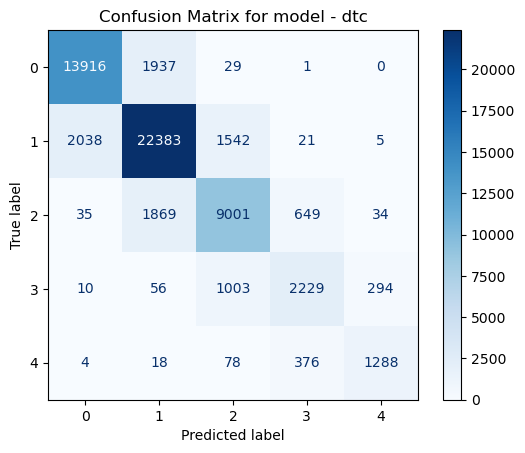

In [238]:
added_title_show_confusion_matrix("dtc")

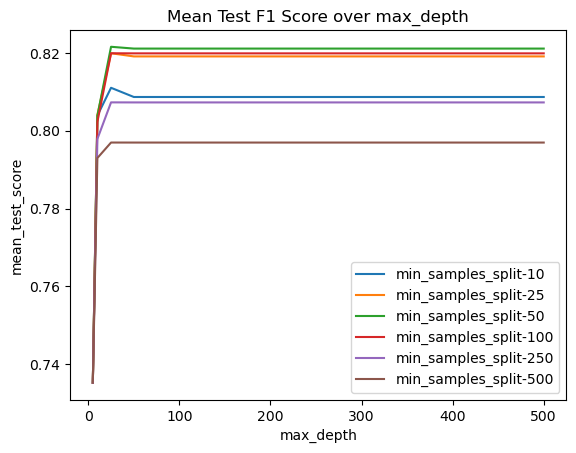

In [648]:
plot_test_score_over_hyper(model_name="dtc",
                           x_dim = "max_depth",
                           other_dims=["min_samples_split"]
                           )

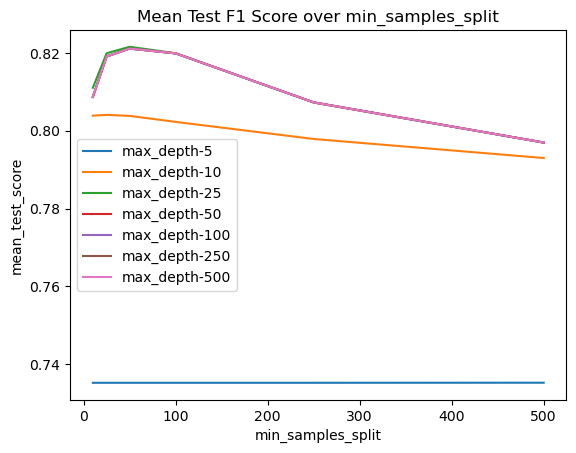

In [649]:
plot_test_score_over_hyper(model_name="dtc",
                           x_dim = "min_samples_split",
                           other_dims=["max_depth"]
                           )

<div style="border-radius:10px; border: #ffd500 solid; padding: 15px; background-color: #ffffcf; font-size:100%; text-align:left">
<font size="4px" color="#ffa600"><b>💬 Comment:</b></font>
    
- From the above classification report and confusion matrix:
    - We can see that Decision Tree works much better with imbalance data.
- Let's run another grid search for a narrower search
<div>

#### Decision Tree with Grid Search (Narrower)

In [650]:
from sklearn.tree import DecisionTreeClassifier

def model(test = False):
    model = MyModel(X_train,X_test,
                    y_train,y_test,
                    train_subsample_size=global_subsampling_pct,
                    test_subsample_size=global_subsampling_pct)

    # Apply Subsampling for faster training in experimental stage
    model.init_subsampling() # Subsample data for faster deployment

    # Instantiate encoder steps
    model.init_one_hot_encoding(columns=["vehicle_type","drivetrain","transmission","engine_block"])
    model.init_target_encoding(columns=["make","model","trim","body_type"])
    model.init_encoder() # Activate all encoders and add to pipeline

    # Instantiate model and add to pipeline
    this_model_name = "dtc_narrow"
    model.init_model(name = this_model_name,
                     model = DecisionTreeClassifier(random_state=42))
    
    # Instantiate the entire pipeline
    model.init_pipeline()
    
    # Set K-Fold CV
    model.set_kfold_cv(5)
    
    # Instantiate the grid search
    model.init_grid_search(params={f"{this_model_name}__max_depth":[15,20,25,30,35,40,45],
                                   f"{this_model_name}__min_samples_split":[30,35,40,45,50,55,60,65,70]
                                  },
                           n_job = 3
                          )

    # Fit the Pipeline
    model.fit()
    
    # Make Prediction on X_test
    model.predict()
    
    # Print the train score (without GridSearch) / best train score (with GridSearch)
    model.print_best_train_score()
    
    # Print the test score
    model.print_test_score()
    
    # Print the best params
    model.print_best_params()
    
    # Print the confusion matrix
    model.print_confusion_matrix()

    # Add model performance
    global perf
    perf = model.add_perf(perf,test)
        
    # Save Model
    model.save_model()
    
    return model

# Run this model
dtc_narrow = model()

2023-11-21 02:09:32 - INFO >>> =============== Data Shape ===============
2023-11-21 02:09:32 - INFO >>> X_train: (1764450, 21) | y_train: (1764450,)
2023-11-21 02:09:32 - INFO >>> X_test : (588151, 21) | y_test : (588151,)
2023-11-21 02:09:32 - INFO >>> 
2023-11-21 02:09:32 - INFO >>> Sub-sampling on Train Data...
2023-11-21 02:09:35 - INFO >>> Subsampling Completed | Time elapsed: 	0 hours 00 minutes 02 seconds
2023-11-21 02:09:35 - INFO >>> =============== After Subsampling ===============
2023-11-21 02:09:35 - INFO >>> X_train: (176445, 21) | y_train: (176445,)
2023-11-21 02:09:35 - INFO >>> X_test : (58816, 21) | y_test : (58816,)
2023-11-21 02:09:35 - INFO >>> 
2023-11-21 02:09:35 - INFO >>> One-hot Encoder Initialization Completed
2023-11-21 02:09:35 - INFO >>> 
2023-11-21 02:09:35 - INFO >>> Target Encoder Initialization Completed
2023-11-21 02:09:35 - INFO >>> 
2023-11-21 02:09:35 - INFO >>> DecisionTreeClassifier (name: dtc_narrow) Initialization Completed
2023-11-21 02:09:35

##### Model Performance

In [670]:
res = perf.get_data()
res[res["model_name"]=="dtc_narrow"]

,timestamp,test,model_name,model,scoring,grid_search,best_params,best_train_score,params,train_score,test_score,confusion_matrix,classification_report,sub_sampling,sub_sampling_time,sub_sampling_pct_X_train,sub_sampling_pct_X_test,over_sampling,over_sampling_time,X_train_shape,X_test_shape,target_encoding,target_encoding_col,one_hot_encoding,one_hot_encoding_col,standard_scaling,standard_scaling_col,min_max_scaling,min_max_scaling_col,drop_column,dropped_columns,pca,pca_n_components,sampling,sampling_method,sampling_time,final_train_score
1,2023-11-21 02:14:16,False,dtc_narrow,DecisionTreeClassifier,f1_weighted,True,"{'dtc_narrow__max_depth': 15, 'dtc_narrow__min...",0.823287,NaN,NaN,0.828834,[[13922 1932 29 0 0]\n [ 1951 2241...,NaN,True,2.841032,0.1,0.1,NaN,NaN,"(176445, 21)","(58816, 21)",True,"['make', 'model', 'trim', 'body_type']",True,"['vehicle_type', 'drivetrain', 'transmission',...",False,[],False,[],False,[],False,NaN,False,NaN,NaN,0.823287


<div style="border-radius:10px; border: #ffd500 solid; padding: 15px; background-color: #ffffcf; font-size:100%; text-align:left">
<font size="4px" color="#ffa600"><b>💬 Comment:</b></font>
    
- Model Performance:
|Model|alias|Best Params / Params|training F1|testing F1|
|---|---|---|:---:|:---:|
|`Decision Tree`|dtc_narrow|`{'max_depth': 15, 'min_samples_split': 40}`|`82.33%`|`82.88%`|
<div>

##### Model Evaluation

In [652]:
# Print Classification Report
dtc_narrow.print_classification_report()

2023-11-21 02:14:17 - INFO >>> =============== Classification Report on Test Data ===============
              precision    recall  f1-score   support

           0       0.87      0.88      0.88     15883
           1       0.85      0.86      0.86     25989
           2       0.76      0.78      0.77     11588
           3       0.69      0.59      0.64      3592
           4       0.81      0.72      0.76      1764

    accuracy                           0.83     58816
   macro avg       0.80      0.77      0.78     58816
weighted avg       0.83      0.83      0.83     58816



In [653]:
# Print the confusion matrix
dtc_narrow.print_confusion_matrix()

2023-11-21 02:14:17 - INFO >>> =============== Confusion Matrix on Test Data ===============
          predict_1  predict_2  predict_3  predict_4  predict_5
actual_1      13922       1932         29          0          0
actual_2       1951      22411       1616          6          5
actual_3         33       1894       9060        570         31
actual_4         10         44       1130       2137        271
actual_5          4         17        101        374       1268


2023-11-22 17:53:05 - INFO >>> Printing Confusion Matrix for dtc_narrow


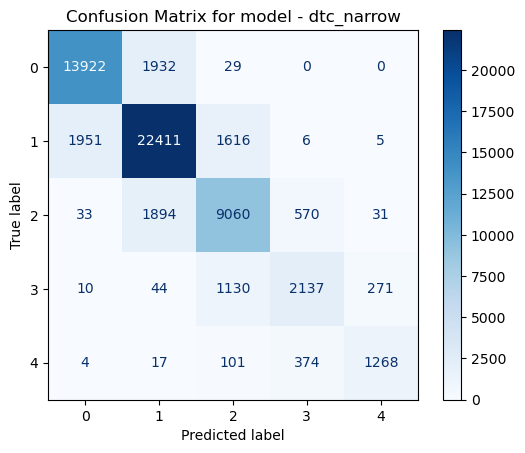

In [239]:
added_title_show_confusion_matrix("dtc_narrow")

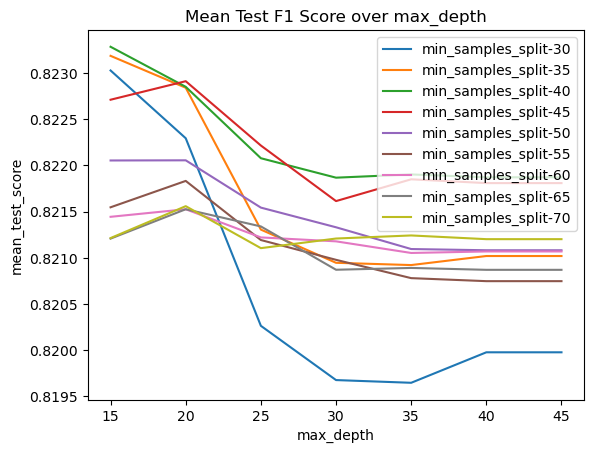

In [655]:
plot_test_score_over_hyper(model_name="dtc_narrow",
                           x_dim = "max_depth",
                           other_dims=["min_samples_split"]
                           )

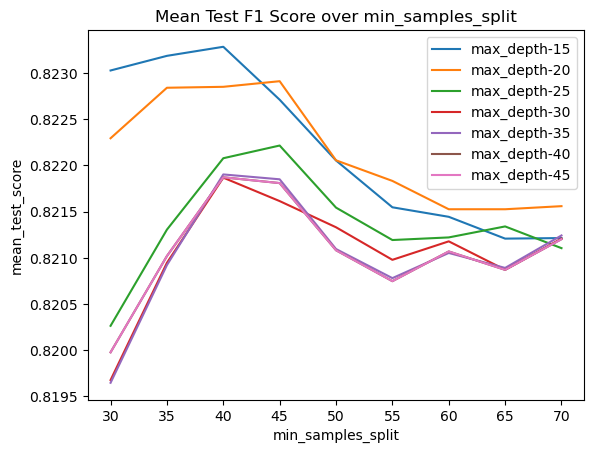

In [656]:
plot_test_score_over_hyper(model_name="dtc_narrow",
                           x_dim = "min_samples_split",
                           other_dims=["max_depth"]
                           )

<div style="border-radius:10px; border: #ffd500 solid; padding: 15px; background-color: #ffffcf; font-size:100%; text-align:left">
<font size="4px" color="#ffa600"><b>💬 Comment:</b></font>
    
- From the above classification report and confusion matrix:
    - We can see that Decision Tree works much better with imbalance data.
- For the choice of `max_depth`, we choose `15` as our best model hyperparameters.
- For the choice of `min_sample_split`, we choose `40` as our best model hyperparameters.
- Let's try apply `OverSampling` here.
<div>

#### Decision Tree + Oversampling

In [657]:
from sklearn.tree import DecisionTreeClassifier

def model(test = False):
    model = MyModel(X_train,X_test,
                    y_train,y_test,
                    train_subsample_size=global_subsampling_pct,
                    test_subsample_size=global_subsampling_pct)

    # Apply Subsampling for faster training in experimental stage
    model.init_subsampling() # Subsample data for faster deployment
    
    model.init_over_sampling() # Oversampling for class imabalance
    

    # Instantiate encoder steps
    model.init_one_hot_encoding(columns=["vehicle_type","drivetrain","transmission","engine_block"])
    model.init_target_encoding(columns=["make","model","trim","body_type"])
    model.init_encoder() # Activate all encoders and add to pipeline

    # Instantiate model and add to pipeline
    this_model_name = "dtc_oversample"
    model.init_model(name = this_model_name,
                     model = DecisionTreeClassifier(random_state=42))
    
    # Instantiate the entire pipeline
    model.init_pipeline()
    
    # Set K-Fold CV
    model.set_kfold_cv(5)
    
    # Instantiate the grid search
    model.init_grid_search(params={f"{this_model_name}__max_depth":[5,10,25,50,100,250,500],
                                   f"{this_model_name}__min_samples_split":[10,25,50,100,250,500]
                                  },
                           n_job = 3
                          )

    # Fit the Pipeline
    model.fit()
    
    # Make Prediction on X_test
    model.predict()
    
    # Print the train score (without GridSearch) / best train score (with GridSearch)
    model.print_best_train_score()
    
    # Print the test score
    model.print_test_score()
    
    # Print the best params
    model.print_best_params()
    
    # Print the confusion matrix
    model.print_confusion_matrix()

    # Add model performance
    global perf
    perf = model.add_perf(perf,test)
        
    # Save Model
    model.save_model()
    
    return model

# Run this model
dtc_oversample = model()

2023-11-21 02:14:19 - INFO >>> =============== Data Shape ===============
2023-11-21 02:14:19 - INFO >>> X_train: (1764450, 21) | y_train: (1764450,)
2023-11-21 02:14:19 - INFO >>> X_test : (588151, 21) | y_test : (588151,)
2023-11-21 02:14:19 - INFO >>> 
2023-11-21 02:14:19 - INFO >>> Sub-sampling on Train Data...
2023-11-21 02:14:22 - INFO >>> Subsampling Completed | Time elapsed: 	0 hours 00 minutes 02 seconds
2023-11-21 02:14:22 - INFO >>> =============== After Subsampling ===============
2023-11-21 02:14:22 - INFO >>> X_train: (176445, 21) | y_train: (176445,)
2023-11-21 02:14:22 - INFO >>> X_test : (58816, 21) | y_test : (58816,)
2023-11-21 02:14:22 - INFO >>> 
2023-11-21 02:14:22 - INFO >>> Random Over Samping on Train Data...
2023-11-21 02:14:22 - INFO >>> Random Over Samping Completed | Time elapsed: 	0 hours 00 minutes 00 seconds
2023-11-21 02:14:22 - INFO >>> =============== After Random Over Samping ===============
2023-11-21 02:14:22 - INFO >>> X_train: (389830, 21) | y_tr

##### Model Performance

In [658]:
res = perf.get_data()
res[res["model_name"]=="dtc_oversample"]

,timestamp,test,model_name,model,scoring,grid_search,best_params,best_train_score,params,train_score,test_score,confusion_matrix,classification_report,sub_sampling,sub_sampling_time,sub_sampling_pct_X_train,sub_sampling_pct_X_test,over_sampling,over_sampling_time,X_train_shape,X_test_shape,target_encoding,target_encoding_col,one_hot_encoding,one_hot_encoding_col,standard_scaling,standard_scaling_col,min_max_scaling,min_max_scaling_col,drop_column,dropped_columns,pca,pca_n_components,sampling,sampling_method,sampling_time,final_train_score
2,2023-11-21 02:19:56,False,dtc_oversample,DecisionTreeClassifier,f1_weighted,True,"{'dtc_oversample__max_depth': 50, 'dtc_oversam...",0.91216,NaN,NaN,0.80997,[[14058 1761 49 9 6]\n [ 2707 2102...,NaN,True,2.886008,0.1,0.1,NaN,NaN,"(389830, 21)","(58816, 21)",True,"['make', 'model', 'trim', 'body_type']",True,"['vehicle_type', 'drivetrain', 'transmission',...",False,[],False,[],False,[],False,NaN,True,Random Over Samping,0.648543,0.91216


<div style="border-radius:10px; border: #ffd500 solid; padding: 15px; background-color: #ffffcf; font-size:100%; text-align:left">
<font size="4px" color="#ffa600"><b>💬 Comment:</b></font>
    
- Model Performance:
|Model|alias|Best Params / Params|training F1|testing F1|
|---|---|---|:---:|:---:|
|`Decision Tree`|dtc_oversample|`{'max_depth': 50, 'min_samples_split': 10}`|`91.22%`|`81.00%`|
<div>

##### Model Evaluation

In [673]:
# Print Classification Report
dtc_oversample.print_classification_report()

2023-11-21 02:33:54 - INFO >>> =============== Classification Report on Test Data ===============
              precision    recall  f1-score   support

           0       0.84      0.89      0.86     15883
           1       0.86      0.81      0.83     25989
           2       0.74      0.76      0.75     11588
           3       0.61      0.65      0.63      3592
           4       0.76      0.77      0.76      1764

    accuracy                           0.81     58816
   macro avg       0.76      0.77      0.77     58816
weighted avg       0.81      0.81      0.81     58816



In [674]:
# Print the confusion matrix
dtc_oversample.print_confusion_matrix()

2023-11-21 02:33:56 - INFO >>> =============== Confusion Matrix on Test Data ===============
          predict_1  predict_2  predict_3  predict_4  predict_5
actual_1      14058       1761         49          9          6
actual_2       2707      21029       2164         75         14
actual_3         39       1577       8841       1061         70
actual_4          8         43        870       2326        345
actual_5          7         14         51        334       1358


2023-11-22 17:53:16 - INFO >>> Printing Confusion Matrix for dtc_oversample


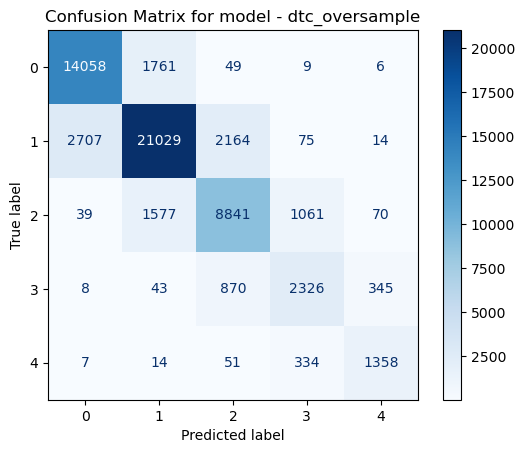

In [240]:
added_title_show_confusion_matrix("dtc_oversample")

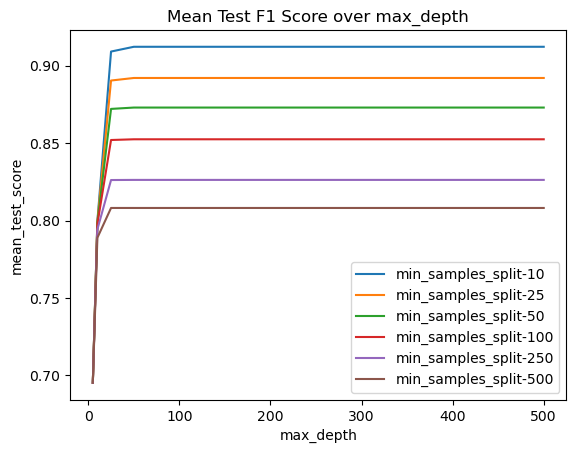

In [677]:
plot_test_score_over_hyper(model_name="dtc_oversample",
                           x_dim = "max_depth",
                           other_dims=["min_samples_split"]
                           )

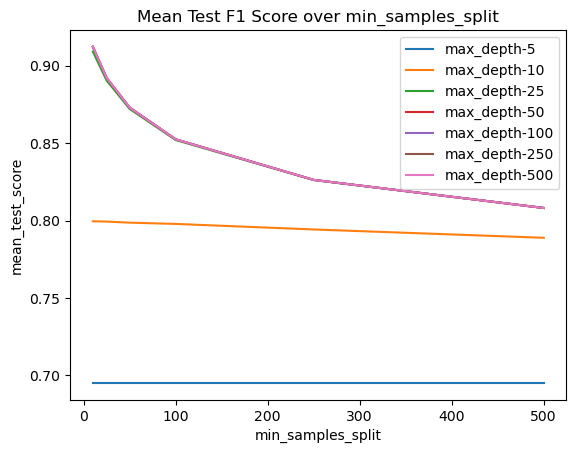

In [678]:
plot_test_score_over_hyper(model_name="dtc_oversample",
                           x_dim = "min_samples_split",
                           other_dims=["max_depth"]
                           )

<div style="border-radius:10px; border: #ffd500 solid; padding: 15px; background-color: #ffffcf; font-size:100%; text-align:left">
<font size="4px" color="#ffa600"><b>💬 Comment:</b></font>
    
- From the above classification report and confusion matrix:
    - We can see that `OverSampling` does not help a lot.
- Let's run another grid search for a narrower search.
<div>

#### Decision Tree + Oversampling (Narrower)

In [679]:
from sklearn.tree import DecisionTreeClassifier

def model(test = False):
    model = MyModel(X_train,X_test,
                    y_train,y_test,
                    train_subsample_size=global_subsampling_pct,
                    test_subsample_size=global_subsampling_pct)

    # Apply Subsampling for faster training in experimental stage
    model.init_subsampling() # Subsample data for faster deployment
    
    model.init_over_sampling() # Oversampling for class imabalance
    

    # Instantiate encoder steps
    model.init_one_hot_encoding(columns=["vehicle_type","drivetrain","transmission","engine_block"])
    model.init_target_encoding(columns=["make","model","trim","body_type"])
    model.init_encoder() # Activate all encoders and add to pipeline

    # Instantiate model and add to pipeline
    this_model_name = "dtc_oversample_narrow"
    model.init_model(name = this_model_name,
                     model = DecisionTreeClassifier(random_state=42))
    
    # Instantiate the entire pipeline
    model.init_pipeline()
    
    # Set K-Fold CV
    model.set_kfold_cv(5)
    
    # Instantiate the grid search
    model.init_grid_search(params={f"{this_model_name}__max_depth":[35,40,45,50,55,60,65,70],
                                   f"{this_model_name}__min_samples_split":[5,10,15,20]
                                  },
                           n_job = 3
                          )

    # Fit the Pipeline
    model.fit()
    
    # Make Prediction on X_test
    model.predict()
    
    # Print the train score (without GridSearch) / best train score (with GridSearch)
    model.print_best_train_score()
    
    # Print the test score
    model.print_test_score()
    
    # Print the best params
    model.print_best_params()
    
    # Print the confusion matrix
    model.print_confusion_matrix()

    # Add model performance
    global perf
    perf = model.add_perf(perf,test)
        
    # Save Model
    model.save_model()
    
    return model

# Run this model
dtc_oversample_narrow = model()

2023-11-21 02:36:14 - INFO >>> =============== Data Shape ===============
2023-11-21 02:36:14 - INFO >>> X_train: (1764450, 21) | y_train: (1764450,)
2023-11-21 02:36:14 - INFO >>> X_test : (588151, 21) | y_test : (588151,)
2023-11-21 02:36:14 - INFO >>> 
2023-11-21 02:36:15 - INFO >>> Sub-sampling on Train Data...
2023-11-21 02:36:18 - INFO >>> Subsampling Completed | Time elapsed: 	0 hours 00 minutes 02 seconds
2023-11-21 02:36:18 - INFO >>> =============== After Subsampling ===============
2023-11-21 02:36:18 - INFO >>> X_train: (176445, 21) | y_train: (176445,)
2023-11-21 02:36:18 - INFO >>> X_test : (58816, 21) | y_test : (58816,)
2023-11-21 02:36:18 - INFO >>> 
2023-11-21 02:36:18 - INFO >>> Random Over Samping on Train Data...
2023-11-21 02:36:18 - INFO >>> Random Over Samping Completed | Time elapsed: 	0 hours 00 minutes 00 seconds
2023-11-21 02:36:18 - INFO >>> =============== After Random Over Samping ===============
2023-11-21 02:36:18 - INFO >>> X_train: (389830, 21) | y_tr

##### Model Performance

In [680]:
res = perf.get_data()
res[res["model_name"]=="dtc_oversample_narrow"]

,timestamp,test,model_name,model,scoring,grid_search,best_params,best_train_score,params,train_score,test_score,confusion_matrix,classification_report,sub_sampling,sub_sampling_time,sub_sampling_pct_X_train,sub_sampling_pct_X_test,over_sampling,over_sampling_time,X_train_shape,X_test_shape,target_encoding,target_encoding_col,one_hot_encoding,one_hot_encoding_col,standard_scaling,standard_scaling_col,min_max_scaling,min_max_scaling_col,drop_column,dropped_columns,pca,pca_n_components,sampling,sampling_method,sampling_time,final_train_score
3,2023-11-21 02:40:47,False,dtc_oversample_narrow,DecisionTreeClassifier,f1_weighted,True,"{'dtc_oversample_narrow__max_depth': 55, 'dtc_...",0.918678,NaN,NaN,0.808879,[[13992 1830 48 7 6]\n [ 2707 2109...,NaN,True,2.91266,0.1,0.1,NaN,NaN,"(389830, 21)","(58816, 21)",True,"['make', 'model', 'trim', 'body_type']",True,"['vehicle_type', 'drivetrain', 'transmission',...",False,[],False,[],False,[],False,NaN,True,Random Over Samping,0.801149,0.918678


<div style="border-radius:10px; border: #ffd500 solid; padding: 15px; background-color: #ffffcf; font-size:100%; text-align:left">
<font size="4px" color="#ffa600"><b>💬 Comment:</b></font>
    
- Model Performance:
|Model|alias|Best Params / Params|training F1|testing F1|
|---|---|---|:---:|:---:|
|`Decision Tree`|dtc_oversample_narrow|`{'max_depth': 55, 'min_samples_split': 5}`|`91.87%`|`80.89%`|
<div>

##### Model Evaluation

In [681]:
# Print Classification Report
dtc_oversample_narrow.print_classification_report()

2023-11-21 02:40:47 - INFO >>> =============== Classification Report on Test Data ===============
              precision    recall  f1-score   support

           0       0.84      0.88      0.86     15883
           1       0.86      0.81      0.83     25989
           2       0.74      0.76      0.75     11588
           3       0.62      0.64      0.63      3592
           4       0.76      0.77      0.77      1764

    accuracy                           0.81     58816
   macro avg       0.76      0.77      0.77     58816
weighted avg       0.81      0.81      0.81     58816



In [682]:
# Print the confusion matrix
dtc_oversample_narrow.print_confusion_matrix()

2023-11-21 02:40:47 - INFO >>> =============== Confusion Matrix on Test Data ===============
          predict_1  predict_2  predict_3  predict_4  predict_5
actual_1      13992       1830         48          7          6
actual_2       2707      21090       2111         70         11
actual_3         40       1667       8835        984         62
actual_4          9         54        898       2292        339
actual_5          5         19         50        338       1352


2023-11-22 17:53:29 - INFO >>> Printing Confusion Matrix for dtc_oversample_narrow


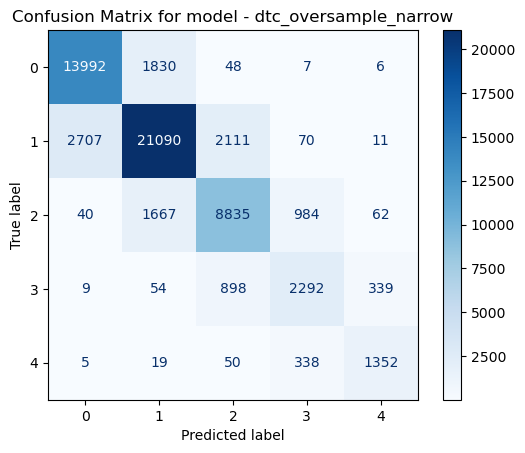

In [241]:
added_title_show_confusion_matrix("dtc_oversample_narrow")

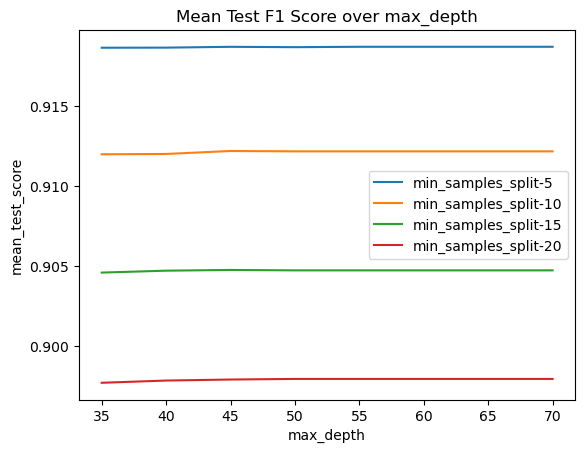

In [684]:
plot_test_score_over_hyper(model_name="dtc_oversample_narrow",
                           x_dim = "max_depth",
                           other_dims=["min_samples_split"]
                           )

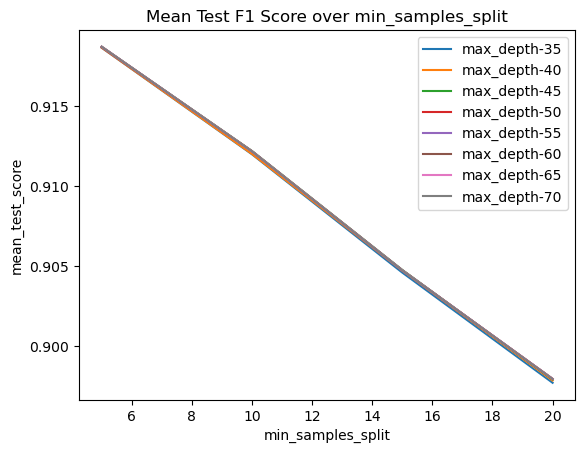

In [685]:
plot_test_score_over_hyper(model_name="dtc_oversample_narrow",
                           x_dim = "min_samples_split",
                           other_dims=["max_depth"]
                           )

<div style="border-radius:10px; border: #ffd500 solid; padding: 15px; background-color: #ffffcf; font-size:100%; text-align:left">
<font size="4px" color="#ffa600"><b>💬 Comment:</b></font>
    

- For the choice of `max_depth`, we choose `55` as our best model hyperparameters.
- For the choice of `min_sample_split`, we choose `5` as our best model hyperparameters.
- Let's try apply `SMOTENC` here.
<div>

#### Decision Tree + SMOTENC

In [664]:
from sklearn.tree import DecisionTreeClassifier

def model(test = False):
    model = MyModel(X_train,X_test,
                    y_train,y_test,
                    train_subsample_size=global_subsampling_pct,
                    test_subsample_size=global_subsampling_pct)

    # Apply Subsampling for faster training in experimental stage
    model.init_subsampling() # Subsample data for faster deployment
    
    model.init_smotenc() # SMOTENC for class imabalance
    

    # Instantiate encoder steps
    model.init_one_hot_encoding(columns=["vehicle_type","drivetrain","transmission","engine_block"])
    model.init_target_encoding(columns=["make","model","trim","body_type"])
    model.init_encoder() # Activate all encoders and add to pipeline

    # Instantiate model and add to pipeline
    this_model_name = "dtc_smotenc"
    model.init_model(name = this_model_name,
                     model = DecisionTreeClassifier(random_state = 42))
    
    # Instantiate the entire pipeline
    model.init_pipeline()
    
    # Set K-Fold CV
    model.set_kfold_cv(5)
    
    # Instantiate the grid search
    model.init_grid_search(params={f"{this_model_name}__max_depth":[5,10,25,50,100,250,500],
                                   f"{this_model_name}__min_samples_split":[10,25,50,100,250,500]
                                  },
                           n_job = 3
                          )

    # Fit the Pipeline
    model.fit()
    
    # Make Prediction on X_test
    model.predict()
    
    # Print the train score (without GridSearch) / best train score (with GridSearch)
    model.print_best_train_score()
    
    # Print the test score
    model.print_test_score()
    
    # Print the best params
    model.print_best_params()
    
    # Print the confusion matrix
    model.print_confusion_matrix()

    # Add model performance
    global perf
    perf = model.add_perf(perf,test)
        
    # Save Model
    model.save_model()
    
    return model

# Run this model
dtc_smotenc = model()

2023-11-21 02:19:58 - INFO >>> =============== Data Shape ===============
2023-11-21 02:19:58 - INFO >>> X_train: (1764450, 21) | y_train: (1764450,)
2023-11-21 02:19:58 - INFO >>> X_test : (588151, 21) | y_test : (588151,)
2023-11-21 02:19:58 - INFO >>> 
2023-11-21 02:19:58 - INFO >>> Sub-sampling on Train Data...
2023-11-21 02:20:01 - INFO >>> Subsampling Completed | Time elapsed: 	0 hours 00 minutes 03 seconds
2023-11-21 02:20:01 - INFO >>> =============== After Subsampling ===============
2023-11-21 02:20:01 - INFO >>> X_train: (176445, 21) | y_train: (176445,)
2023-11-21 02:20:01 - INFO >>> X_test : (58816, 21) | y_test : (58816,)
2023-11-21 02:20:01 - INFO >>> 
2023-11-21 02:20:01 - INFO >>> SMOTENC Over Sampling on Train Data...
2023-11-21 02:24:46 - INFO >>> SMOTENC Over Sampling Completed | Time elapsed: 	0 hours 04 minutes 45 seconds
2023-11-21 02:24:46 - INFO >>> =============== After SMOTENC Over Sampling ===============
2023-11-21 02:24:46 - INFO >>> X_train: (389830, 21) 

##### Model Performance

In [665]:
res = perf.get_data()
res[res["model_name"]=="dtc_smotenc"]

,timestamp,test,model_name,model,scoring,grid_search,best_params,best_train_score,params,train_score,test_score,confusion_matrix,classification_report,sub_sampling,sub_sampling_time,sub_sampling_pct_X_train,sub_sampling_pct_X_test,over_sampling,over_sampling_time,X_train_shape,X_test_shape,target_encoding,target_encoding_col,one_hot_encoding,one_hot_encoding_col,standard_scaling,standard_scaling_col,min_max_scaling,min_max_scaling_col,drop_column,dropped_columns,pca,pca_n_components,sampling,sampling_method,sampling_time,final_train_score
3,2023-11-21 02:30:26,False,dtc_smotenc,DecisionTreeClassifier,f1_weighted,True,"{'dtc_smotenc__max_depth': 25, 'dtc_smotenc__m...",0.879032,NaN,NaN,0.81672,[[14172 1669 31 9 2]\n [ 2751 2104...,NaN,True,3.019254,0.1,0.1,NaN,NaN,"(389830, 21)","(58816, 21)",True,"['make', 'model', 'trim', 'body_type']",True,"['vehicle_type', 'drivetrain', 'transmission',...",False,[],False,[],False,[],False,NaN,True,SMOTENC Over Sampling,285.082652,0.879032


<div style="border-radius:10px; border: #ffd500 solid; padding: 15px; background-color: #ffffcf; font-size:100%; text-align:left">
<font size="4px" color="#ffa600"><b>💬 Comment:</b></font>
    
- Model Performance:
|Model|alias|Best Params / Params|training F1|testing F1|
|---|---|---|:---:|:---:|
|`Decision Tree`|dtc_smotenc|`{'max_depth': 25, 'min_samples_split': 10}`|`87.90%`|`81.67%`|
<div>

##### Model Evaluation

In [666]:
# Print Classification Report
dtc_smotenc.print_classification_report()

2023-11-21 02:30:27 - INFO >>> =============== Classification Report on Test Data ===============
              precision    recall  f1-score   support

           0       0.83      0.89      0.86     15883
           1       0.87      0.81      0.84     25989
           2       0.75      0.78      0.76     11588
           3       0.64      0.67      0.65      3592
           4       0.78      0.79      0.78      1764

    accuracy                           0.82     58816
   macro avg       0.77      0.79      0.78     58816
weighted avg       0.82      0.82      0.82     58816



In [667]:
# Print the confusion matrix
dtc_smotenc.print_confusion_matrix()

2023-11-21 02:30:27 - INFO >>> =============== Confusion Matrix on Test Data ===============
          predict_1  predict_2  predict_3  predict_4  predict_5
actual_1      14172       1669         31          9          2
actual_2       2751      21045       2134         47         12
actual_3         35       1490       9020        996         47
actual_4         10         38        828       2389        327
actual_5          6          7         40        321       1390


2023-11-22 17:53:40 - INFO >>> Printing Confusion Matrix for dtc_smotenc


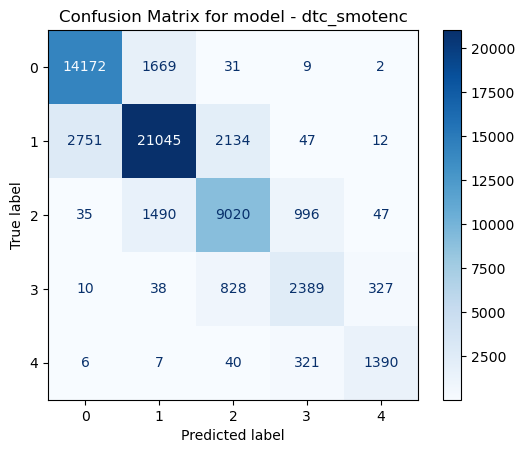

In [242]:
added_title_show_confusion_matrix("dtc_smotenc")

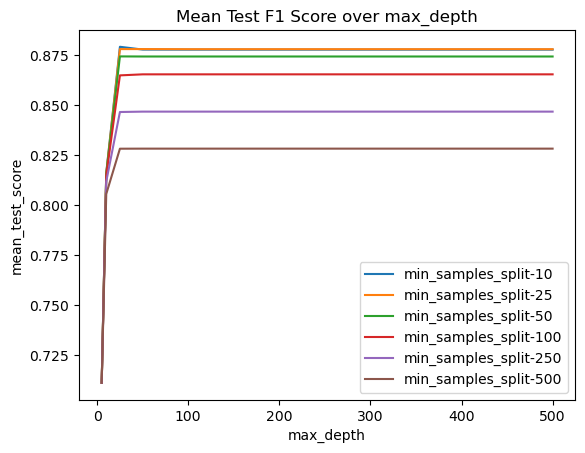

In [669]:
plot_test_score_over_hyper(model_name="dtc_smotenc",
                           x_dim = "max_depth",
                           other_dims=["min_samples_split"]
                           )

<div style="border-radius:10px; border: #ffd500 solid; padding: 15px; background-color: #ffffcf; font-size:100%; text-align:left">
<font size="4px" color="#ffa600"><b>💬 Comment:</b></font>

- From the above classification report and confusion matrix:
    - We can see that `SMOTENC Sampling` is better than `OverSampling`, but it is not improving the model.
- Let's run another grid search for a narrower search
<div>

#### Decision Tree + SMOTENC (Narrower)

In [686]:
from sklearn.tree import DecisionTreeClassifier

def model(test = False):
    model = MyModel(X_train,X_test,
                    y_train,y_test,
                    train_subsample_size=global_subsampling_pct,
                    test_subsample_size=global_subsampling_pct)

    # Apply Subsampling for faster training in experimental stage
    model.init_subsampling() # Subsample data for faster deployment
    
    model.init_smotenc() # SMOTENC for class imabalance
    

    # Instantiate encoder steps
    model.init_one_hot_encoding(columns=["vehicle_type","drivetrain","transmission","engine_block"])
    model.init_target_encoding(columns=["make","model","trim","body_type"])
    model.init_encoder() # Activate all encoders and add to pipeline

    # Instantiate model and add to pipeline
    this_model_name = "dtc_smotenc_narrow"
    model.init_model(name = this_model_name,
                     model = DecisionTreeClassifier(random_state = 42))
    
    # Instantiate the entire pipeline
    model.init_pipeline()
    
    # Set K-Fold CV
    model.set_kfold_cv(5)
    
    # Instantiate the grid search
    model.init_grid_search(params={f"{this_model_name}__max_depth":[10,15,20,25,30,35,40],
                                   f"{this_model_name}__min_samples_split":[2,3,5,10,15,20]
                                  },
                           n_job = 3
                          )

    # Fit the Pipeline
    model.fit()
    
    # Make Prediction on X_test
    model.predict()
    
    # Print the train score (without GridSearch) / best train score (with GridSearch)
    model.print_best_train_score()
    
    # Print the test score
    model.print_test_score()
    
    # Print the best params
    model.print_best_params()
    
    # Print the confusion matrix
    model.print_confusion_matrix()

    # Add model performance
    global perf
    perf = model.add_perf(perf,test)
        
    # Save Model
    model.save_model()
    
    return model

# Run this model
dtc_smotenc_narrow = model()

2023-11-21 02:40:50 - INFO >>> =============== Data Shape ===============
2023-11-21 02:40:50 - INFO >>> X_train: (1764450, 21) | y_train: (1764450,)
2023-11-21 02:40:50 - INFO >>> X_test : (588151, 21) | y_test : (588151,)
2023-11-21 02:40:50 - INFO >>> 
2023-11-21 02:40:50 - INFO >>> Sub-sampling on Train Data...
2023-11-21 02:40:54 - INFO >>> Subsampling Completed | Time elapsed: 	0 hours 00 minutes 03 seconds
2023-11-21 02:40:54 - INFO >>> =============== After Subsampling ===============
2023-11-21 02:40:54 - INFO >>> X_train: (176445, 21) | y_train: (176445,)
2023-11-21 02:40:54 - INFO >>> X_test : (58816, 21) | y_test : (58816,)
2023-11-21 02:40:54 - INFO >>> 
2023-11-21 02:40:54 - INFO >>> SMOTENC Over Sampling on Train Data...
2023-11-21 02:45:20 - INFO >>> SMOTENC Over Sampling Completed | Time elapsed: 	0 hours 04 minutes 26 seconds
2023-11-21 02:45:20 - INFO >>> =============== After SMOTENC Over Sampling ===============
2023-11-21 02:45:20 - INFO >>> X_train: (389830, 21) 

##### Model Performance

In [687]:
res = perf.get_data()
res[res["model_name"]=="dtc_smotenc_narrow"]

,timestamp,test,model_name,model,scoring,grid_search,best_params,best_train_score,params,train_score,test_score,confusion_matrix,classification_report,sub_sampling,sub_sampling_time,sub_sampling_pct_X_train,sub_sampling_pct_X_test,over_sampling,over_sampling_time,X_train_shape,X_test_shape,target_encoding,target_encoding_col,one_hot_encoding,one_hot_encoding_col,standard_scaling,standard_scaling_col,min_max_scaling,min_max_scaling_col,drop_column,dropped_columns,pca,pca_n_components,sampling,sampling_method,sampling_time,final_train_score
5,2023-11-21 02:51:40,False,dtc_smotenc_narrow,DecisionTreeClassifier,f1_weighted,True,"{'dtc_smotenc_narrow__max_depth': 20, 'dtc_smo...",0.879758,NaN,NaN,0.822447,[[14234 1609 30 8 2]\n [ 2670 2104...,NaN,True,3.119133,0.1,0.1,NaN,NaN,"(389830, 21)","(58816, 21)",True,"['make', 'model', 'trim', 'body_type']",True,"['vehicle_type', 'drivetrain', 'transmission',...",False,[],False,[],False,[],False,NaN,True,SMOTENC Over Sampling,266.605393,0.879758


<div style="border-radius:10px; border: #ffd500 solid; padding: 15px; background-color: #ffffcf; font-size:100%; text-align:left">
<font size="4px" color="#ffa600"><b>💬 Comment:</b></font>
    
- Model Performance:
|Model|alias|Best Params / Params|training F1|testing F1|
|---|---|---|:---:|:---:|
|`Decision Tree`|dtc_smotenc_narrow|`{'max_depth': 20, 'min_samples_split': 10}`|`87.98%`|`82.24%`|
<div>

##### Model Evaluation

In [688]:
# Print Classification Report
dtc_smotenc_narrow.print_classification_report()

2023-11-21 02:51:40 - INFO >>> =============== Classification Report on Test Data ===============
              precision    recall  f1-score   support

           0       0.84      0.90      0.87     15883
           1       0.88      0.81      0.84     25989
           2       0.75      0.80      0.77     11588
           3       0.65      0.68      0.67      3592
           4       0.79      0.79      0.79      1764

    accuracy                           0.82     58816
   macro avg       0.78      0.79      0.79     58816
weighted avg       0.82      0.82      0.82     58816



In [689]:
# Print the confusion matrix
dtc_smotenc_narrow.print_confusion_matrix()

2023-11-21 02:51:40 - INFO >>> =============== Confusion Matrix on Test Data ===============
          predict_1  predict_2  predict_3  predict_4  predict_5
actual_1      14234       1609         30          8          2
actual_2       2670      21041       2223         44         11
actual_3         34       1316       9224        961         53
actual_4         10         35        783       2458        306
actual_5          6          7         38        326       1387


2023-11-22 17:53:54 - INFO >>> Printing Confusion Matrix for dtc_smotenc_narrow


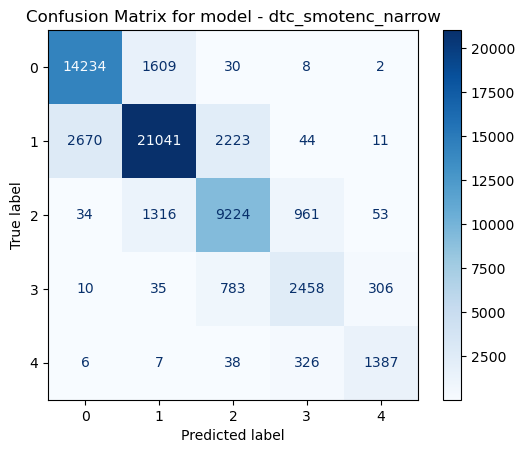

In [243]:
added_title_show_confusion_matrix("dtc_smotenc_narrow")

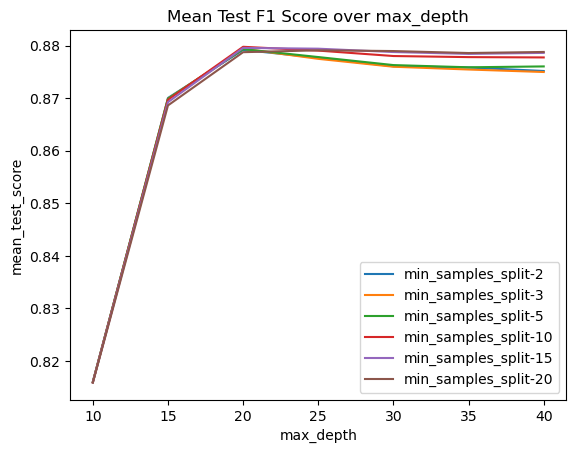

In [691]:
plot_test_score_over_hyper(model_name="dtc_smotenc_narrow",
                           x_dim = "max_depth",
                           other_dims=["min_samples_split"]
                           )

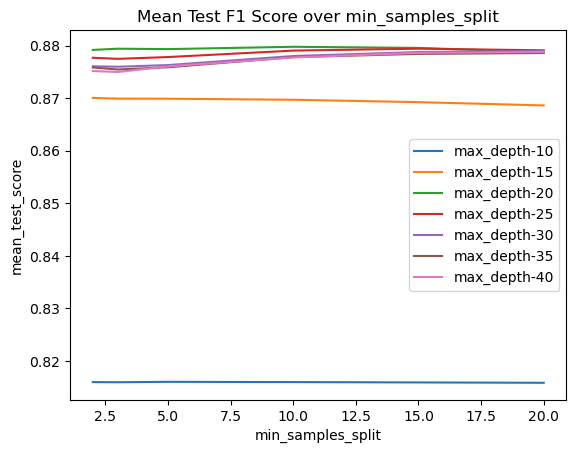

In [692]:
plot_test_score_over_hyper(model_name="dtc_smotenc_narrow",
                           x_dim = "min_samples_split",
                           other_dims=["max_depth"]
                           )

<div style="border-radius:10px; border: #ffd500 solid; padding: 15px; background-color: #ffffcf; font-size:100%; text-align:left">
<font size="4px" color="#ffa600"><b>💬 Comment:</b></font>
    
- In decision tree model with SMOTENC sampling,
    - For the choice of `max_depth`, we choose `20` as our best model hyperparameters.
    - For the choice of `min_sample_split`, we choose `10` as our best model hyperparameters.

<div>

#### Decision Tree Summary

<div style="border-radius:10px; border: #ffd500 solid; padding: 15px; background-color: #ffffcf; font-size:100%; text-align:left">
<font size="4px" color="#ffa600"><b>🏆 Model Summary - Decision Tree</b></font>


- Model Performance for all Decision Tree, we obtained:
|Model|alias|Best Params / Params|training F1|testing F1|
|---|---|---|:---:|:---:|
|`Decision Tree`|dtc|`{'max_depth': 25, 'min_samples_split': 50}`|`82.15%`|`82.94%`|
|`Decision Tree`|dtc_narrow|`{'max_depth': 15, 'min_samples_split': 40}`|`82.33%`|`82.88%`|
|`Decision Tree`|dtc_oversample|`{'max_depth': 50, 'min_samples_split': 10}`|`91.22%`|`81.00%`|
|`Decision Tree`|dtc_oversample_narrow|`{'max_depth': 55, 'min_samples_split': 5}`|`91.87%`|`80.89%`|
|`Decision Tree`|dtc_smotenc|`{'max_depth': 25, 'min_samples_split': 10}`|`87.90%`|`81.67%`|
|`Decision Tree`|dtc_smotenc_narrow|`{'max_depth': 20, 'min_samples_split': 10}`|`87.98%`|`82.24%`|

    
    

<div>

<div style="border-radius:10px; border: #ffd500 solid; padding: 15px; background-color: #ffffcf; font-size:100%; text-align:left">
<font size="4px" color="#ffa600"><b>💡 Insight - Decision Tree</b></font>

- From the six models we have run above, we can see that:
    - Decision Trees without oversampling give better performance and Decision Trees without oversampling give worse result.
    - This is because oversampling try to improve the score of minority class by sacrificing the score of majority class.
- But we can see that for `dtc_smotenc_narrow`, it also reaches **82% f1-score** with oversampling.
- Therefore, we will select this model for the next stage with full set of data.

Now, let's move to **AdaBoost**.
<div>


---


<div style="border-radius:10px; border:#33a0ff solid; padding: 15px; background-color: #f0f1ff; font-size:100%; text-align:left">
<a class="anchor" id="4-model">
    <h3> Model - Adaptive Boosting</h3>
</a>

</div>

<div style="border-radius:10px; border: #ffd500 solid; padding: 15px; background-color: #ffffcf; font-size:100%; text-align:left">
<font size="4px" color="#ffa600"><b>⚠️ Note:</b></font>

- For the base tree classifier in AdaBoost, we can use the basic tree `dtc` from above sections. 
    - `max_depth`:`25`
    - `min_samples_split`:`50`
- For all the following tree-based method, we will run the typical `Decision Tree` and trees with `SMOTENC` only.
<div>

#### Adaboost with Grid Search

In [693]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier

def model(test = False):
    model = MyModel(X_train,X_test,
                    y_train,y_test,
                    train_subsample_size=global_subsampling_pct,
                    test_subsample_size=global_subsampling_pct)

    # Apply Subsampling for faster training in experimental stage
    model.init_subsampling() # Subsample data for faster deployment

    # Instantiate encoder steps
    model.init_one_hot_encoding(columns=["vehicle_type","drivetrain","transmission","engine_block"])
    model.init_target_encoding(columns=["make","model","trim","body_type"])
    model.init_encoder() # Activate all encoders and add to pipeline

    # Instantiate model
    model_name = "abc"
    model.init_model(name = model_name,
                     model = AdaBoostClassifier(estimator = DecisionTreeClassifier(max_depth = 25,
                                                                                   min_samples_split = 50,
                                                                                   random_state=42),
                                                random_state=42
                                                )
                    )
    
    # Instantiate the entire pipeline
    model.init_pipeline()

    # Set K-Fold CV
    model.set_kfold_cv(5)
    
    # Instantiate the grid search
    model.init_grid_search(params={f"{model_name}__n_estimators":[10,25,50,100], 
                                   f"{model_name}__learning_rate":[0.8,0.9,1],
                                  },
                           n_job = 3)
    
    # Fit the Pipeline
    model.fit()
    
    # Make Prediction on X_test
    model.predict()
    
    # Print the train score (without GridSearch) / best train score (with GridSearch)
    model.print_best_train_score()
    
    # Print the test score
    model.print_test_score()
    
    # Print the best params
    model.print_best_params()
    
    # Print the confusion matrix
    model.print_confusion_matrix()

    # Add model performance
    global perf
    perf = model.add_perf(perf,test)
        
    # Save Model
    model.save_model()
    
    return model

# Run this model
abc = model()


2023-11-21 02:56:52 - INFO >>> =============== Data Shape ===============
2023-11-21 02:56:52 - INFO >>> X_train: (1764450, 21) | y_train: (1764450,)
2023-11-21 02:56:52 - INFO >>> X_test : (588151, 21) | y_test : (588151,)
2023-11-21 02:56:52 - INFO >>> 
2023-11-21 02:56:52 - INFO >>> Sub-sampling on Train Data...
2023-11-21 02:56:55 - INFO >>> Subsampling Completed | Time elapsed: 	0 hours 00 minutes 02 seconds
2023-11-21 02:56:55 - INFO >>> =============== After Subsampling ===============
2023-11-21 02:56:55 - INFO >>> X_train: (176445, 21) | y_train: (176445,)
2023-11-21 02:56:55 - INFO >>> X_test : (58816, 21) | y_test : (58816,)
2023-11-21 02:56:55 - INFO >>> 
2023-11-21 02:56:55 - INFO >>> One-hot Encoder Initialization Completed
2023-11-21 02:56:55 - INFO >>> 
2023-11-21 02:56:55 - INFO >>> Target Encoder Initialization Completed
2023-11-21 02:56:55 - INFO >>> 
2023-11-21 02:56:55 - INFO >>> AdaBoostClassifier (name: abc) Initialization Completed
2023-11-21 02:56:55 - INFO >>>

##### Model Performance

In [694]:
res = perf.get_data()
res[res["model_name"]=="abc"]

,timestamp,test,model_name,model,scoring,grid_search,best_params,best_train_score,params,train_score,test_score,confusion_matrix,classification_report,sub_sampling,sub_sampling_time,sub_sampling_pct_X_train,sub_sampling_pct_X_test,over_sampling,over_sampling_time,X_train_shape,X_test_shape,target_encoding,target_encoding_col,one_hot_encoding,one_hot_encoding_col,standard_scaling,standard_scaling_col,min_max_scaling,min_max_scaling_col,drop_column,dropped_columns,pca,pca_n_components,sampling,sampling_method,sampling_time,final_train_score
0,2023-11-21 03:26:16,False,abc,AdaBoostClassifier,f1_weighted,True,"{'abc__learning_rate': 1, 'abc__n_estimators':...",0.853387,NaN,NaN,0.858486,[[14249 1620 14 0 0]\n [ 1608 2312...,NaN,True,2.817107,0.1,0.1,NaN,NaN,"(176445, 21)","(58816, 21)",True,"['make', 'model', 'trim', 'body_type']",True,"['vehicle_type', 'drivetrain', 'transmission',...",False,[],False,[],False,[],False,NaN,False,NaN,NaN,0.853387


<div style="border-radius:10px; border: #ffd500 solid; padding: 15px; background-color: #ffffcf; font-size:100%; text-align:left">
<font size="4px" color="#ffa600"><b>💬 Comment:</b></font>
    
- Model Performance:
|Model|alias|Best Params / Params|training F1|testing F1|
|---|---|---|:---:|:---:|
|`AdaBoost`|abc|`{'learning_rate': 1, 'n_estimators': 100}`|`85.34%`|`85.89%`|
    
- **Wow!!! AdaBoosting give a even better result than Decision Tree.**
- Let's evaluat the model performance.
<div>

##### Model Evaluation

In [695]:
# Print Classification Report
abc.print_classification_report()

2023-11-21 03:26:17 - INFO >>> =============== Classification Report on Test Data ===============
              precision    recall  f1-score   support

           0       0.90      0.90      0.90     15883
           1       0.88      0.89      0.88     25989
           2       0.80      0.81      0.81     11588
           3       0.73      0.66      0.70      3592
           4       0.89      0.76      0.82      1764

    accuracy                           0.86     58816
   macro avg       0.84      0.80      0.82     58816
weighted avg       0.86      0.86      0.86     58816



In [696]:
# Print the confusion matrix
abc.print_confusion_matrix()

2023-11-21 03:26:17 - INFO >>> =============== Confusion Matrix on Test Data ===============
          predict_1  predict_2  predict_3  predict_4  predict_5
actual_1      14249       1620         14          0          0
actual_2       1608      23128       1244          7          2
actual_3         17       1630       9423        511          7
actual_4          7         29       1004       2388        164
actual_5          2         13         56        355       1338


2023-11-22 17:54:04 - INFO >>> Printing Confusion Matrix for abc


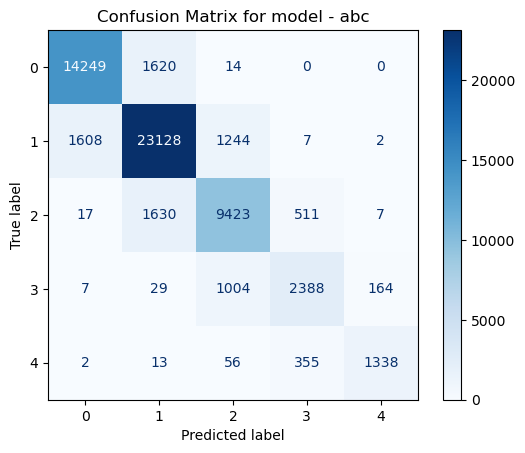

In [244]:
added_title_show_confusion_matrix("abc")

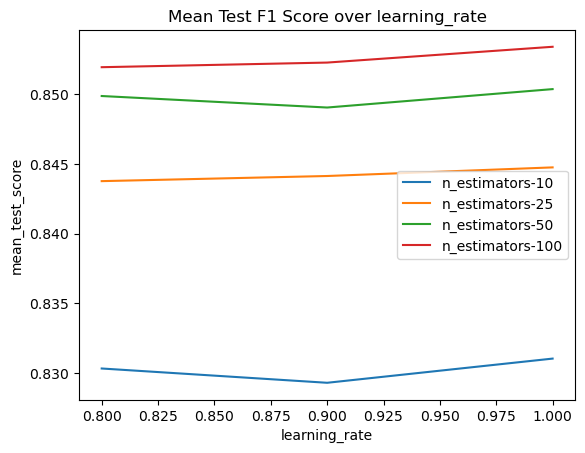

In [699]:
plot_test_score_over_hyper(model_name="abc",
                           x_dim = "learning_rate",
                           other_dims=["n_estimators"]
                           )

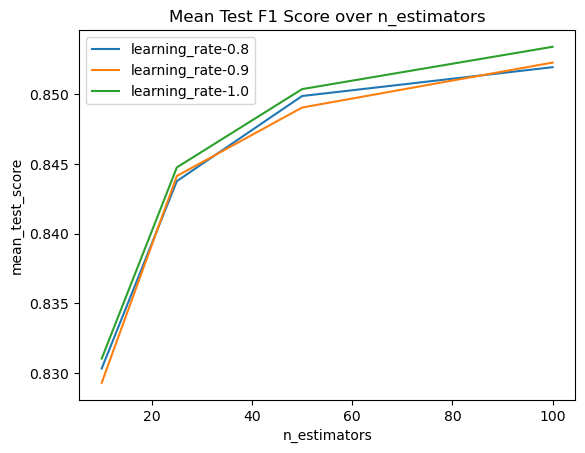

In [701]:
plot_test_score_over_hyper(model_name="abc",
                           x_dim = "n_estimators",
                           other_dims=["learning_rate"]
                           )

<div style="border-radius:10px; border: #ffd500 solid; padding: 15px; background-color: #ffffcf; font-size:100%; text-align:left">
<font size="4px" color="#ffa600"><b>💬 Comment:</b></font>
    
- Even though the performace in class_3 (`price_range of 4`) remains the lowest, `Adaboost` performs better in each class.
- By comparing the classification reports and confusion matrix, we noticed that `AdaBoost` give a better result in both training score and testing score.
- We see that the best parameters (`{'learning_rate': 1, 'n_estimators': 100}`) are both lying on the edge of each parameters list, perhaps we can try out more values with grid search.
<div>

#### Adaboost with Grid Search (Wider)

In [702]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier

def model(test = False):
    model = MyModel(X_train,X_test,
                    y_train,y_test,
                    train_subsample_size=global_subsampling_pct,
                    test_subsample_size=global_subsampling_pct)

    # Apply Subsampling for faster training in experimental stage
    model.init_subsampling() # Subsample data for faster deployment

    # Instantiate encoder steps
    model.init_one_hot_encoding(columns=["vehicle_type","drivetrain","transmission","engine_block"])
    model.init_target_encoding(columns=["make","model","trim","body_type"])
    model.init_encoder() # Activate all encoders and add to pipeline

    # Instantiate model
    model_name = "abc_wider"
    model.init_model(name = model_name,
                     model = AdaBoostClassifier(estimator = DecisionTreeClassifier(max_depth = 25,
                                                                                   min_samples_split = 50,
                                                                                   random_state=42),
                                                random_state=42
                                                )
                    )
    
    # Instantiate the entire pipeline
    model.init_pipeline()

    # Set K-Fold CV
    model.set_kfold_cv(5)
    
    # Instantiate the grid search
    model.init_grid_search(params={f"{model_name}__n_estimators":[50, 75, 100, 125, 135, 150], 
                                   f"{model_name}__learning_rate":[0.85, 0.9, 0.95, 1, 1.05, 1.1, 1.15],
                                  },
                           n_job = 3)
    
    # Fit the Pipeline
    model.fit()
    
    # Make Prediction on X_test
    model.predict()
    
    # Print the train score (without GridSearch) / best train score (with GridSearch)
    model.print_best_train_score()
    
    # Print the test score
    model.print_test_score()
    
    # Print the best params
    model.print_best_params()
    
    # Print the confusion matrix
    model.print_confusion_matrix()

    # Add model performance
    global perf
    perf = model.add_perf(perf,test)
        
    # Save Model
    model.save_model()
    
    return model

# Run this model
abc_wider = model()


2023-11-21 09:28:15 - INFO >>> =============== Data Shape ===============
2023-11-21 09:28:15 - INFO >>> X_train: (1764450, 21) | y_train: (1764450,)
2023-11-21 09:28:15 - INFO >>> X_test : (588151, 21) | y_test : (588151,)
2023-11-21 09:28:15 - INFO >>> 
2023-11-21 09:28:15 - INFO >>> Sub-sampling on Train Data...
2023-11-21 09:28:18 - INFO >>> Subsampling Completed | Time elapsed: 	0 hours 00 minutes 02 seconds
2023-11-21 09:28:18 - INFO >>> =============== After Subsampling ===============
2023-11-21 09:28:18 - INFO >>> X_train: (176445, 21) | y_train: (176445,)
2023-11-21 09:28:18 - INFO >>> X_test : (58816, 21) | y_test : (58816,)
2023-11-21 09:28:18 - INFO >>> 
2023-11-21 09:28:18 - INFO >>> One-hot Encoder Initialization Completed
2023-11-21 09:28:18 - INFO >>> 
2023-11-21 09:28:18 - INFO >>> Target Encoder Initialization Completed
2023-11-21 09:28:18 - INFO >>> 
2023-11-21 09:28:18 - INFO >>> AdaBoostClassifier (name: abc_wider) Initialization Completed
2023-11-21 09:28:18 - IN

##### Model Performance

In [703]:
res = perf.get_data()
res[res["model_name"]=="abc_wider"]

,timestamp,test,model_name,model,scoring,grid_search,best_params,best_train_score,params,train_score,test_score,confusion_matrix,classification_report,sub_sampling,sub_sampling_time,sub_sampling_pct_X_train,sub_sampling_pct_X_test,over_sampling,over_sampling_time,X_train_shape,X_test_shape,target_encoding,target_encoding_col,one_hot_encoding,one_hot_encoding_col,standard_scaling,standard_scaling_col,min_max_scaling,min_max_scaling_col,drop_column,dropped_columns,pca,pca_n_components,sampling,sampling_method,sampling_time,final_train_score
1,2023-11-21 13:11:05,False,abc_wider,AdaBoostClassifier,f1_weighted,True,"{'abc_wider__learning_rate': 1, 'abc_wider__n_...",0.854542,NaN,NaN,0.858419,[[14244 1625 14 0 0]\n [ 1617 2311...,NaN,True,2.727267,0.1,0.1,NaN,NaN,"(176445, 21)","(58816, 21)",True,"['make', 'model', 'trim', 'body_type']",True,"['vehicle_type', 'drivetrain', 'transmission',...",False,[],False,[],False,[],False,NaN,False,NaN,NaN,0.854542


<div style="border-radius:10px; border: #ffd500 solid; padding: 15px; background-color: #ffffcf; font-size:100%; text-align:left">
<font size="4px" color="#ffa600"><b>💬 Comment:</b></font>
    
- Model Performance:
|Model|alias|Best Params / Params|training F1|testing F1|
|---|---|---|:---:|:---:|
|`AdaBoost`|abc_wider|`{'learning_rate': 1, 'n_estimators': 150}`|`85.45%`|`85.84%`|
<div>

##### Model Evaluation

In [704]:
# Print Classification Report
abc_wider.print_classification_report()

2023-11-21 13:11:05 - INFO >>> =============== Classification Report on Test Data ===============
              precision    recall  f1-score   support

           0       0.90      0.90      0.90     15883
           1       0.87      0.89      0.88     25989
           2       0.80      0.82      0.81     11588
           3       0.74      0.66      0.70      3592
           4       0.89      0.76      0.82      1764

    accuracy                           0.86     58816
   macro avg       0.84      0.80      0.82     58816
weighted avg       0.86      0.86      0.86     58816



In [705]:
# Print the confusion matrix
abc_wider.print_confusion_matrix()

2023-11-21 13:11:05 - INFO >>> =============== Confusion Matrix on Test Data ===============
          predict_1  predict_2  predict_3  predict_4  predict_5
actual_1      14244       1625         14          0          0
actual_2       1617      23114       1250          7          1
actual_3         16       1650       9447        469          6
actual_4          6         29       1010       2386        161
actual_5          2         14         53        362       1333


2023-11-22 17:54:20 - INFO >>> Printing Confusion Matrix for abc_wider


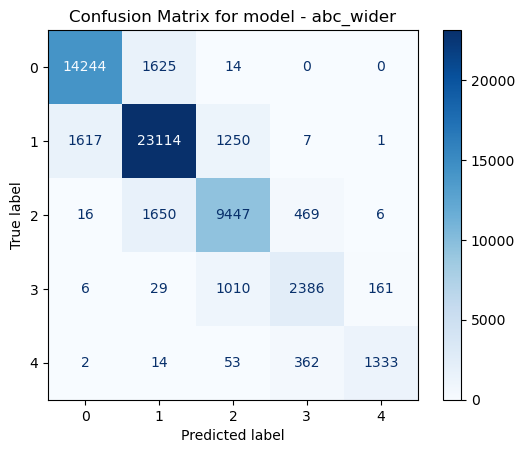

In [245]:
added_title_show_confusion_matrix("abc_wider")

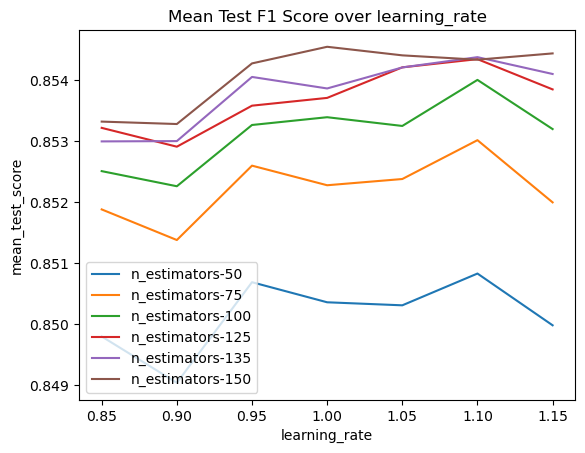

In [707]:
plot_test_score_over_hyper(model_name="abc_wider",
                           x_dim = "learning_rate",
                           other_dims=["n_estimators"]
                           )

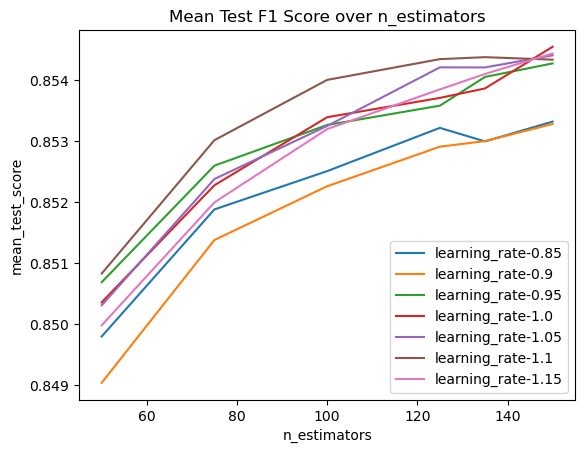

In [708]:
plot_test_score_over_hyper(model_name="abc_wider",
                           x_dim = "n_estimators",
                           other_dims=["learning_rate"]
                           )

<div style="border-radius:10px; border: #ffd500 solid; padding: 15px; background-color: #ffffcf; font-size:100%; text-align:left">
<font size="4px" color="#ffa600"><b>💬 Comment:</b></font>
    
- From the above visualization, we we can keep our `learning_rate` as `1` and `n_estimators` as `150`.
- However, as we have a large dataset, we may not explore the opportunity to have more number of trees.
- Let's try apply `SMOTENC` with AdaBoosting.

    
<div>

#### Adaboost + SMOTENC

In [713]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier

def model(test = False):
    model = MyModel(X_train,X_test,
                    y_train,y_test,
                    train_subsample_size=global_subsampling_pct,
                    test_subsample_size=global_subsampling_pct)

    # Apply Subsampling for faster training in experimental stage
    model.init_subsampling() # Subsample data for faster deployment
    
    model.init_smotenc() # SMOTENC for class imabalance

    # Instantiate encoder steps
    model.init_one_hot_encoding(columns=["vehicle_type","drivetrain","transmission","engine_block"])
    model.init_target_encoding(columns=["make","model","trim","body_type"])
    model.init_encoder() # Activate all encoders and add to pipeline

    # Instantiate model
    model_name = "abc_smotenc"
    model.init_model(name = model_name,
                     model = AdaBoostClassifier(estimator = DecisionTreeClassifier(max_depth = 25,
                                                                                   min_samples_split = 50,
                                                                                   random_state=42),
                                                random_state=42
                                                )
                    )
    
    # Instantiate the entire pipeline
    model.init_pipeline()

    # Set K-Fold CV
    model.set_kfold_cv(5)
    
    # Instantiate the grid search
    model.init_grid_search(params={f"{model_name}__n_estimators":[125, 135, 150], 
                                   f"{model_name}__learning_rate":[0.95, 1, 1.05],
                                  },
                           n_job = 3)
    
    # Fit the Pipeline
    model.fit()
    
    # Make Prediction on X_test
    model.predict()
    
    # Print the train score (without GridSearch) / best train score (with GridSearch)
    model.print_best_train_score()
    
    # Print the test score
    model.print_test_score()
    
    # Print the best params
    model.print_best_params()
    
    # Print the confusion matrix
    model.print_confusion_matrix()

    # Add model performance
    global perf
    perf = model.add_perf(perf,test)
        
    # Save Model
    model.save_model()
    
    return model

# Run this model
abc_smotenc = model()


2023-11-21 13:45:01 - INFO >>> =============== Data Shape ===============
2023-11-21 13:45:01 - INFO >>> X_train: (1764450, 21) | y_train: (1764450,)
2023-11-21 13:45:01 - INFO >>> X_test : (588151, 21) | y_test : (588151,)
2023-11-21 13:45:01 - INFO >>> 
2023-11-21 13:45:01 - INFO >>> Sub-sampling on Train Data...
2023-11-21 13:45:04 - INFO >>> Subsampling Completed | Time elapsed: 	0 hours 00 minutes 02 seconds
2023-11-21 13:45:04 - INFO >>> =============== After Subsampling ===============
2023-11-21 13:45:04 - INFO >>> X_train: (176445, 21) | y_train: (176445,)
2023-11-21 13:45:04 - INFO >>> X_test : (58816, 21) | y_test : (58816,)
2023-11-21 13:45:04 - INFO >>> 
2023-11-21 13:45:04 - INFO >>> SMOTENC Over Sampling on Train Data...
2023-11-21 13:49:32 - INFO >>> SMOTENC Over Sampling Completed | Time elapsed: 	0 hours 04 minutes 28 seconds
2023-11-21 13:49:32 - INFO >>> =============== After SMOTENC Over Sampling ===============
2023-11-21 13:49:32 - INFO >>> X_train: (389830, 21) 

##### Model Performance

In [720]:
res = perf.get_data()
res[res["model_name"]=="abc_smotenc"]

,timestamp,test,model_name,model,scoring,grid_search,best_params,best_train_score,params,train_score,test_score,confusion_matrix,classification_report,sub_sampling,sub_sampling_time,sub_sampling_pct_X_train,sub_sampling_pct_X_test,over_sampling,over_sampling_time,X_train_shape,X_test_shape,target_encoding,target_encoding_col,one_hot_encoding,one_hot_encoding_col,standard_scaling,standard_scaling_col,min_max_scaling,min_max_scaling_col,drop_column,dropped_columns,pca,pca_n_components,sampling,sampling_method,sampling_time,final_train_score
1,2023-11-21 16:28:36,False,abc_smotenc,AdaBoostClassifier,f1_weighted,True,"{'abc_smotenc__learning_rate': 0.95, 'abc_smot...",0.905888,NaN,NaN,0.854375,[[14652 1218 13 0 0]\n [ 2097 2203...,NaN,True,2.756641,0.1,0.1,NaN,NaN,"(389830, 21)","(58816, 21)",True,"['make', 'model', 'trim', 'body_type']",True,"['vehicle_type', 'drivetrain', 'transmission',...",False,[],False,[],False,[],False,NaN,True,SMOTENC Over Sampling,268.842196,0.905888


<div style="border-radius:10px; border: #ffd500 solid; padding: 15px; background-color: #ffffcf; font-size:100%; text-align:left">
<font size="4px" color="#ffa600"><b>💬 Comment:</b></font>
    
- Model Performance:
|Model|alias|Best Params / Params|training F1|testing F1|
|---|---|---|:---:|:---:|
|`AdaBoost`|abc_smotenc|`{'learning_rate': 0.95, 'n_estimators': 150}`|`90.59%`|`85.43%`|
<div>

##### Model Evaluation

In [715]:
# Print Classification Report
abc_smotenc.print_classification_report()

2023-11-21 16:28:38 - INFO >>> =============== Classification Report on Test Data ===============
              precision    recall  f1-score   support

           0       0.87      0.92      0.90     15883
           1       0.90      0.85      0.87     25989
           2       0.79      0.82      0.80     11588
           3       0.68      0.72      0.70      3592
           4       0.84      0.81      0.82      1764

    accuracy                           0.85     58816
   macro avg       0.82      0.83      0.82     58816
weighted avg       0.86      0.85      0.85     58816



In [716]:
# Print the confusion matrix
abc_smotenc.print_confusion_matrix()

2023-11-21 16:28:38 - INFO >>> =============== Confusion Matrix on Test Data ===============
          predict_1  predict_2  predict_3  predict_4  predict_5
actual_1      14652       1218         13          0          0
actual_2       2097      22035       1835         19          3
actual_3         16       1149       9506        903         14
actual_4          6         15        710       2602        259
actual_5          4          6         27        297       1430


2023-11-22 17:54:40 - INFO >>> Printing Confusion Matrix for abc_smotenc


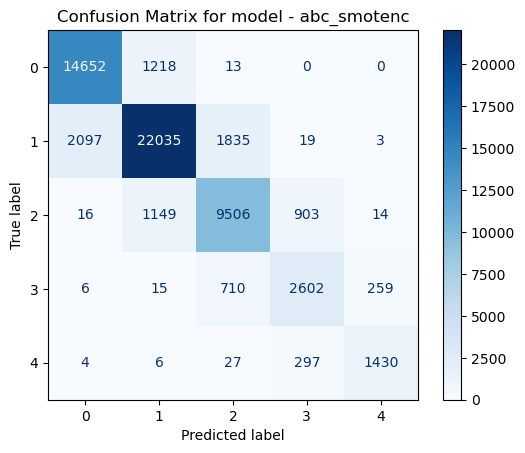

In [247]:
# Plot the confusion matrix
added_title_show_confusion_matrix("abc_smotenc")

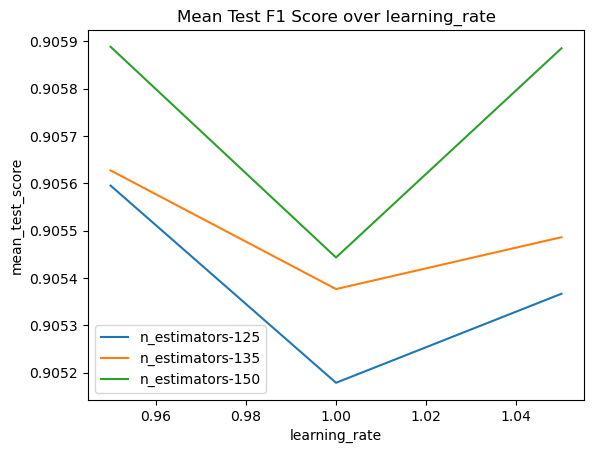

In [718]:
plot_test_score_over_hyper(model_name="abc_smotenc",
                           x_dim = "learning_rate",
                           other_dims=["n_estimators"]
                           )

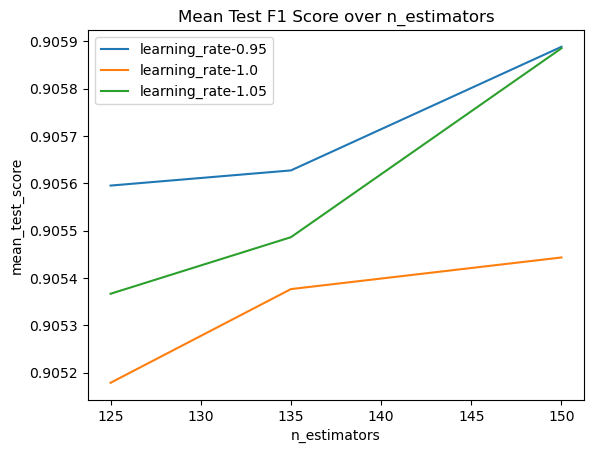

In [719]:
plot_test_score_over_hyper(model_name="abc_smotenc",
                           x_dim = "n_estimators",
                           other_dims=["learning_rate"]
                           )

<div style="border-radius:10px; border: #ffd500 solid; padding: 15px; background-color: #ffffcf; font-size:100%; text-align:left">
<font size="4px" color="#ffa600"><b>💬 Comment:</b></font>
    
- Comparing with AdaBoost without SMOTENC, the model performance does not improve significantly.
- The best parameters obtained from this grid search is `{'learning_rate': 0.95, 'n_estimators': 150}`.
    
<div>

#### Adaboosting Summary

<div style="border-radius:10px; border: #ffd500 solid; padding: 15px; background-color: #ffffcf; font-size:100%; text-align:left">
<font size="4px" color="#ffa600"><b>💬 Comment - AdaBoost</b></font>
    
- For adaboost, the base estimator is `DecisionTreeClassifier(max_depth=25, min_samples_split=50)`
- From the above results for Adaptive Boosting, we obtained:
|Model|alias|Best Params / Params|training F1|testing F1|
|---|---|---|:---:|:---:|
|`AdaBoost`|abc|`{'learning_rate': 1, 'n_estimators': 100}`|`85.34%`|`85.89%`|
|`AdaBoost`|abc_wider|`{'learning_rate': 1, 'n_estimators': 150}`|`85.45%`|`85.84%`|
|`AdaBoost`|abc_smotenc|`{'learning_rate': 0.95, 'n_estimators': 150}`|`90.59%`|`85.43%`|

    
<div>

<div style="border-radius:10px; border: #ffd500 solid; padding: 15px; background-color: #ffffcf; font-size:100%; text-align:left">
<font size="4px" color="#ffa600"><b>💡 Insight - AdaBoost</b></font>

- In AdaBoost, all models return very similar results for each class.
- There is no significantly improvement with applying SMOTENC.
- We can also conclude that Adaboost is better than Decision Tree.

Now, let's move to **XG Boosting**.
<div>

<div style="border-radius:10px; border: #ffd500 solid; padding: 15px; background-color: #ffffcf; font-size:100%; text-align:left">
<font size="4px" color="#ffa600"><b>⚠️ Note:</b></font>

From all our models' result above, we see that SMOTENC does not help to improve
    
<div>


---


<div style="border-radius:10px; border:#33a0ff solid; padding: 15px; background-color: #f0f1ff; font-size:100%; text-align:left">
<a class="anchor" id="4-model">
    <h3> Model - XGBoost </h3>
</a>

</div>

#### XG Boosting with Grid Search

In [32]:
import xgboost as xgb


def model(test = False):
    model = MyModel(X_train,X_test,
                    y_train,y_test,
                    train_subsample_size=global_subsampling_pct,
                    test_subsample_size=global_subsampling_pct)

    # Apply Subsampling for faster training in experimental stage
    model.init_subsampling() # Subsample data for faster deployment

    # Instantiate encoder steps
    model.init_one_hot_encoding(columns=["vehicle_type","drivetrain","transmission","engine_block"])
    model.init_target_encoding(columns=["make","model","trim","body_type"])
    model.init_encoder() # Activate all encoders and add to pipeline

    # Instantiate model and add to pipeline
    model_name = "xgb"
    model.init_model(name = model_name,
                     model = xgb.XGBClassifier(random_state = 42))
    
    # Instantiate the entire pipeline
    model.init_pipeline()

    # Set K-Fold CV
    model.set_kfold_cv(5)
    
    # Instantiate the grid search
    model.init_grid_search(params={f"{model_name}__max_depth":[15, 20, 25, 35, 50],
                                   f"{model_name}__n_estimators":[30,50,75,100],
                                  },
                           n_job = 3)

    # Fit the Pipeline
    model.fit()
    
    # Make Prediction on X_test
    model.predict()
    
    # Print the train score (without GridSearch) / best train score (with GridSearch)
    model.print_best_train_score()
    
    # Print the test score
    model.print_test_score()
    
    # Print the best params
    model.print_best_params()
    
    # Print the confusion matrix
    model.print_confusion_matrix()

    # Add model performance
    global perf
    perf = model.add_perf(perf,test)
        
    # Save model
    model.save_model()
    
    return model

# Run this model
xgb = model()

2023-11-21 23:32:50 - INFO >>> =============== Data Shape ===============
2023-11-21 23:32:50 - INFO >>> X_train: (1764450, 21) | y_train: (1764450,)
2023-11-21 23:32:50 - INFO >>> X_test : (588151, 21) | y_test : (588151,)
2023-11-21 23:32:50 - INFO >>> 
2023-11-21 23:32:50 - INFO >>> Sub-sampling on Train Data...
2023-11-21 23:32:53 - INFO >>> Subsampling Completed | Time elapsed: 	0 hours 00 minutes 02 seconds
2023-11-21 23:32:53 - INFO >>> =============== After Subsampling ===============
2023-11-21 23:32:53 - INFO >>> X_train: (176445, 21) | y_train: (176445,)
2023-11-21 23:32:53 - INFO >>> X_test : (58816, 21) | y_test : (58816,)
2023-11-21 23:32:53 - INFO >>> 
2023-11-21 23:32:53 - INFO >>> One-hot Encoder Initialization Completed
2023-11-21 23:32:53 - INFO >>> 
2023-11-21 23:32:53 - INFO >>> Target Encoder Initialization Completed
2023-11-21 23:32:53 - INFO >>> 
2023-11-21 23:32:53 - INFO >>> XGBClassifier (name: xgb) Initialization Completed
2023-11-21 23:32:53 - INFO >>> 
202

##### Model Performance

In [33]:
res = perf.get_data()
res[res["model_name"]=="xgb"]

,timestamp,test,model_name,model,scoring,grid_search,best_params,best_train_score,params,train_score,test_score,confusion_matrix,classification_report,sub_sampling,sub_sampling_time,sub_sampling_pct_X_train,sub_sampling_pct_X_test,over_sampling,over_sampling_time,X_train_shape,X_test_shape,target_encoding,target_encoding_col,one_hot_encoding,one_hot_encoding_col,standard_scaling,standard_scaling_col,min_max_scaling,min_max_scaling_col,drop_column,dropped_columns,pca,pca_n_components,sampling,sampling_method,sampling_time,final_train_score
15,2023-11-22 01:26:28,False,xgb,XGBClassifier,f1_weighted,True,"{'xgb__max_depth': 15, 'xgb__n_estimators': 30}",0.854232,NaN,NaN,0.858483,[[14245 1623 14 1 0]\n [ 1667 2297...,NaN,True,2.531227,0.1,0.1,NaN,NaN,"(176445, 21)","(58816, 21)",True,"['make', 'model', 'trim', 'body_type']",True,"['vehicle_type', 'drivetrain', 'transmission',...",False,[],False,[],False,[],False,NaN,False,NaN,NaN,0.854232


<div style="border-radius:10px; border: #ffd500 solid; padding: 15px; background-color: #ffffcf; font-size:100%; text-align:left">
<font size="4px" color="#ffa600"><b>💬 Comment:</b></font>
    
- Model Performance:
|Model|alias|Best Params / Params|training F1|testing F1|
|---|---|---|:---:|:---:|
|`XG Boosting`|xgb|`{'max_depth': 15, 'n_estimators': 30}`|`85.42%`|`85.85%`|
<div>

##### Model Evaluation

In [34]:
# Print Classification Report
xgb.print_classification_report()

2023-11-22 01:26:28 - INFO >>> =============== Classification Report on Test Data ===============
              precision    recall  f1-score   support

           0       0.89      0.90      0.90     15883
           1       0.88      0.88      0.88     25989
           2       0.80      0.82      0.81     11588
           3       0.74      0.68      0.71      3592
           4       0.87      0.78      0.82      1764

    accuracy                           0.86     58816
   macro avg       0.84      0.81      0.82     58816
weighted avg       0.86      0.86      0.86     58816



In [35]:
# Print the confusion matrix
xgb.print_confusion_matrix()

2023-11-22 01:26:28 - INFO >>> =============== Confusion Matrix on Test Data ===============
          predict_1  predict_2  predict_3  predict_4  predict_5
actual_1      14245       1623         14          1          0
actual_2       1667      22972       1339          8          3
actual_3         20       1534       9491        528         15
actual_4          7         29        932       2430        194
actual_5          4         11         42        329       1378


2023-11-22 17:54:52 - INFO >>> Printing Confusion Matrix for xgb


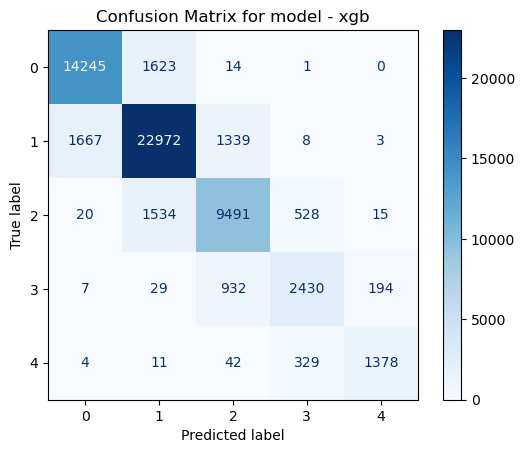

In [248]:
# Plot the confusion matrix
added_title_show_confusion_matrix("xgb")

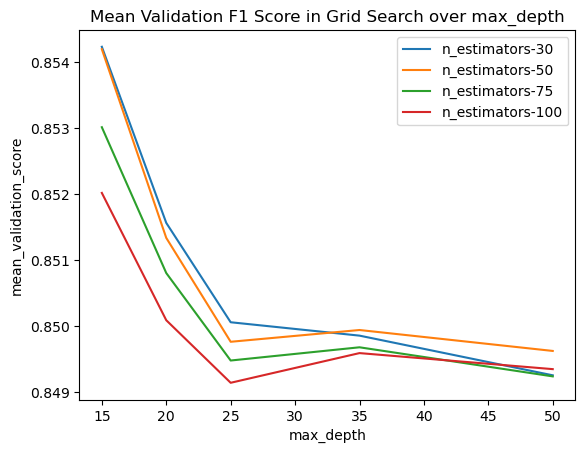

In [71]:
plot_test_score_over_hyper(model_name="xgb",
                           x_dim = "max_depth",
                           other_dims=["n_estimators"]
                           )

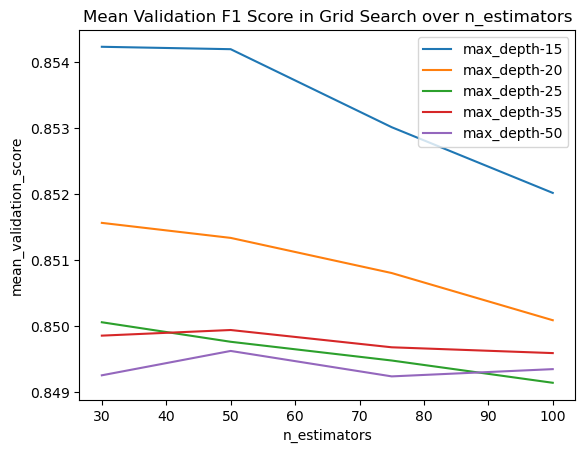

In [72]:
plot_test_score_over_hyper(model_name="xgb",
                           x_dim = "n_estimators",
                           other_dims=["max_depth"]
                           )

<div style="border-radius:10px; border: #ffd500 solid; padding: 15px; background-color: #ffffcf; font-size:100%; text-align:left">
<font size="4px" color="#ffa600"><b>💬 Comment:</b></font>
    
- Although the train and test score are similar to AdaBoost, we can see that XGBoost give slightly better result on the minority classes from the classification reports above.
- The best parameters obtained from this grid search is `{'max_depth': 15, 'n_estimators': 30}`.
    
<div>

#### AdaBoost vs XGB Summary

<div style="border-radius:10px; border: #ffd500 solid; padding: 15px; background-color: #ffffcf; font-size:100%; text-align:left">
<font size="4px" color="#ffa600"><b>💬 Comment - AdaBoost vs XGBoost</b></font>
    
- For `Adaboost`, the base estimator is `DecisionTreeClassifier(max_depth=25, min_samples_split=50)`
- From the above results for **Adaptive Boosting** and **XG Boosting**, we obtained:
|Model|alias|Best Params / Params|training F1|testing F1|
|---|---|---|:---:|:---:|
|`AdaBoost`|abc|`{'learning_rate': 1, 'n_estimators': 100}`|`85.34%`|`85.89%`|
|`AdaBoost`|abc_wider|`{'learning_rate': 1, 'n_estimators': 150}`|`85.45%`|`85.84%`|
|`AdaBoost`|abc_smotenc|`{'learning_rate': 0.95, 'n_estimators': 150}`|`90.59%`|`85.43%`|
|`XG Boosting`|xgb|`{'max_depth': 15, 'n_estimators': 30}`|`85.42%`|`85.85%`|

    
<div>

<div style="border-radius:10px; border: #ffd500 solid; padding: 15px; background-color: #ffffcf; font-size:100%; text-align:left">
<font size="4px" color="#ffa600"><b>💡 Insight - XGBoost</b></font>
    
- From the table above, we can see that both `AdaBoost` and `XGBoost` give similar results as they are very similar in their structure.
- With the similar testing score, we can conclude tha `XGBoost` works better as it uses a shallower depth, less number of trees to obtain the similar result.
- Theoretically, `XGBoost` run faster than `AdaBoost`.
    
Other than Boosting methods, maybe we can try some bagging methods such as **Random Forest**.
<div>


---


<div style="border-radius:10px; border:#33a0ff solid; padding: 15px; background-color: #f0f1ff; font-size:100%; text-align:left">
<a class="anchor" id="4-model">
    <h3> Model - Random Forest </h3>
</a>

</div>

#### Random Forest with Grid Search

In [82]:
from sklearn.ensemble import RandomForestClassifier


def model(test = False):
    model = MyModel(X_train,X_test,
                    y_train,y_test,
                    train_subsample_size=global_subsampling_pct,
                    test_subsample_size=global_subsampling_pct)

    # Apply Subsampling for faster training in experimental stage
    model.init_subsampling() # Subsample data for faster deployment
    
    # Instantiate encoder steps
    model.init_one_hot_encoding(columns=["vehicle_type","drivetrain","transmission","engine_block"])
    model.init_target_encoding(columns=["make","model","trim","body_type"])
    model.init_encoder() # Activate all encoders and add to pipeline

    # Instantiate model and add to pipeline
    model_name = "rf"
    model.init_model(name = model_name,
                     model = RandomForestClassifier(random_state=42,
                                                    n_jobs = 3))
    
    # Instantiate the entire pipeline
    model.init_pipeline()

    # Set K-Fold CV
    model.set_kfold_cv(5)
    
    # Instantiate the grid search
    model.init_grid_search(params={f"{model_name}__n_estimators":[50,75,100,150],
                                   f"{model_name}__max_depth":[10,25,50,75,100],
                                   f"{model_name}__min_samples_split":[25,50,100],
                                  },
                           n_job = 3)


    # Fit the Pipeline
    model.fit()
    
    # Make Prediction on X_test
    model.predict()
    
    # Print the train score (without GridSearch) / best train score (with GridSearch)
    model.print_best_train_score()
    
    # Print the test score
    model.print_test_score()
    
    # Print the best params
    model.print_best_params()
    
    # Print the confusion matrix
    model.print_confusion_matrix()

    # Add model performance
    global perf
    perf = model.add_perf(perf,test)
        
    # Save model
    model.save_model()
    
    return model

# Run this model
rf = model()

2023-11-22 10:15:03 - INFO >>> =============== Data Shape ===============
2023-11-22 10:15:03 - INFO >>> X_train: (1764450, 21) | y_train: (1764450,)
2023-11-22 10:15:03 - INFO >>> X_test : (588151, 21) | y_test : (588151,)
2023-11-22 10:15:03 - INFO >>> 
2023-11-22 10:15:03 - INFO >>> Sub-sampling on Train Data...
2023-11-22 10:15:07 - INFO >>> Subsampling Completed | Time elapsed: 	0 hours 00 minutes 03 seconds
2023-11-22 10:15:07 - INFO >>> =============== After Subsampling ===============
2023-11-22 10:15:07 - INFO >>> X_train: (176445, 21) | y_train: (176445,)
2023-11-22 10:15:07 - INFO >>> X_test : (58816, 21) | y_test : (58816,)
2023-11-22 10:15:07 - INFO >>> 
2023-11-22 10:15:07 - INFO >>> One-hot Encoder Initialization Completed
2023-11-22 10:15:07 - INFO >>> 
2023-11-22 10:15:07 - INFO >>> Target Encoder Initialization Completed
2023-11-22 10:15:07 - INFO >>> 
2023-11-22 10:15:07 - INFO >>> RandomForestClassifier (name: rf) Initialization Completed
2023-11-22 10:15:07 - INFO 

##### Model Performance

In [100]:
res = perf.get_data()
res[res["model_name"]=="rf"]

,timestamp,test,model_name,model,scoring,grid_search,best_params,best_train_score,params,train_score,test_score,confusion_matrix,classification_report,sub_sampling,sub_sampling_time,sub_sampling_pct_X_train,sub_sampling_pct_X_test,over_sampling,over_sampling_time,X_train_shape,X_test_shape,target_encoding,target_encoding_col,one_hot_encoding,one_hot_encoding_col,standard_scaling,standard_scaling_col,min_max_scaling,min_max_scaling_col,drop_column,dropped_columns,pca,pca_n_components,sampling,sampling_method,sampling_time,final_train_score
15,2023-11-22 10:37:17,False,rf,RandomForestClassifier,f1_weighted,True,"{'rf__max_depth': 50, 'rf__min_samples_split':...",0.853891,NaN,NaN,0.858159,[[14248 1628 7 0 0]\n [ 1631 2314...,NaN,True,3.422923,0.1,0.1,NaN,NaN,"(176445, 21)","(58816, 21)",True,"['make', 'model', 'trim', 'body_type']",True,"['vehicle_type', 'drivetrain', 'transmission',...",False,[],False,[],False,[],False,NaN,False,NaN,NaN,0.853891


<div style="border-radius:10px; border: #ffd500 solid; padding: 15px; background-color: #ffffcf; font-size:100%; text-align:left">
<font size="4px" color="#ffa600"><b>💬 Comment:</b></font>
    
- Model Performance:
|Model|alias|Best Params / Params|training F1|testing F1|
|---|---|---|:---:|:---:|
|`RandomForest`|rf|`{'max_depth': 50, 'min_samples_split': 25, 'n_estimators': 150}`|`85.39%`|`85.82%`|
<div>

##### Model Evaluation

In [101]:
# Print Classification Report
rf.print_classification_report()

2023-11-22 10:43:08 - INFO >>> =============== Classification Report on Test Data ===============
              precision    recall  f1-score   support

           0       0.90      0.90      0.90     15883
           1       0.87      0.89      0.88     25989
           2       0.80      0.82      0.81     11588
           3       0.75      0.64      0.69      3592
           4       0.87      0.78      0.82      1764

    accuracy                           0.86     58816
   macro avg       0.84      0.80      0.82     58816
weighted avg       0.86      0.86      0.86     58816



In [102]:
# Print the confusion matrix
rf.print_confusion_matrix()

2023-11-22 10:43:09 - INFO >>> =============== Confusion Matrix on Test Data ===============
          predict_1  predict_2  predict_3  predict_4  predict_5
actual_1      14248       1628          7          0          0
actual_2       1631      23149       1201          4          4
actual_3         21       1676       9462        416         13
actual_4          9         40       1056       2297        190
actual_5          4         23         40        328       1369


2023-11-22 17:55:01 - INFO >>> Printing Confusion Matrix for rf


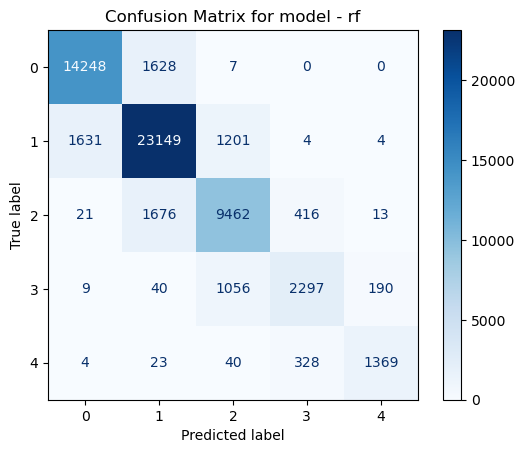

In [249]:
# Plot the confusion matrix
added_title_show_confusion_matrix("rf")

In [ ]:
plot_test_score_over_hyper(model_name="rf",
                           x_dim = "max_depth",
                           other_dims=["min_samples_split","n_estimators"]
                           )

<div style="border-radius:10px; border: #ffd500 solid; padding: 15px; background-color: #ffffcf; font-size:100%; text-align:left">
<font size="4px" color="#ffa600"><b>💬 Comment:</b></font>
    
- As `Random Forest` is a tree-based method, it is expected to give a similar result with `AdaBoost` and `XGBoost`.
- For the training speed, `Random Forest` run much faster than `Boosting`.
- Let's try to use SMOTENC with `Random Forest` here.
    
<div>

#### Random Forest + SMOTENC

In [107]:
from sklearn.ensemble import RandomForestClassifier


def model(test = False):
    model = MyModel(X_train,X_test,
                    y_train,y_test,
                    train_subsample_size=global_subsampling_pct,
                    test_subsample_size=global_subsampling_pct)

    # Apply Subsampling for faster training in experimental stage
    model.init_subsampling() # Subsample data for faster deployment
    
    model.init_smotenc() # SMOTENC for class imabalance

    # Instantiate encoder steps
    model.init_one_hot_encoding(columns=["vehicle_type","drivetrain","transmission","engine_block"])
    model.init_target_encoding(columns=["make","model","trim","body_type"])
    model.init_encoder() # Activate all encoders and add to pipeline

    # Instantiate model and add to pipeline
    model_name = "rf_smotenc"
    model.init_model(name = model_name,
                     model = RandomForestClassifier(random_state=42,
                                                    n_jobs = 3
                                                   )
                    )
    
    # Instantiate the entire pipeline
    model.init_pipeline()

    # Set K-Fold CV
    model.set_kfold_cv(5)
    
    # Instantiate the grid search
    model.init_grid_search(params={f"{model_name}__n_estimators":[50,75,100,150],
                                   f"{model_name}__max_depth":[10,25,50,75,100],
                                   f"{model_name}__min_samples_split":[25,50,100],
                                  },
                           n_job = 3)


    # Fit the Pipeline
    model.fit()
    
    # Make Prediction on X_test
    model.predict()
    
    # Print the train score (without GridSearch) / best train score (with GridSearch)
    model.print_best_train_score()
    
    # Print the test score
    model.print_test_score()
    
    # Print the best params
    model.print_best_params()
    
    # Print the confusion matrix
    model.print_confusion_matrix()

    # Add model performance
    global perf
    perf = model.add_perf(perf,test)
        
    # Save model
    model.save_model()
    
    return model

# Run this model
rf_smotenc = model()

2023-11-22 10:46:00 - INFO >>> =============== Data Shape ===============
2023-11-22 10:46:00 - INFO >>> X_train: (1764450, 21) | y_train: (1764450,)
2023-11-22 10:46:00 - INFO >>> X_test : (588151, 21) | y_test : (588151,)
2023-11-22 10:46:00 - INFO >>> 
2023-11-22 10:46:00 - INFO >>> Sub-sampling on Train Data...
2023-11-22 10:46:03 - INFO >>> Subsampling Completed | Time elapsed: 	0 hours 00 minutes 02 seconds
2023-11-22 10:46:03 - INFO >>> =============== After Subsampling ===============
2023-11-22 10:46:03 - INFO >>> X_train: (176445, 21) | y_train: (176445,)
2023-11-22 10:46:03 - INFO >>> X_test : (58816, 21) | y_test : (58816,)
2023-11-22 10:46:03 - INFO >>> 
2023-11-22 10:46:03 - INFO >>> SMOTENC Over Sampling on Train Data...
2023-11-22 10:50:52 - INFO >>> SMOTENC Over Sampling Completed | Time elapsed: 	0 hours 04 minutes 48 seconds
2023-11-22 10:50:52 - INFO >>> =============== After SMOTENC Over Sampling ===============
2023-11-22 10:50:52 - INFO >>> X_train: (389830, 21) 

##### Model Performance

In [108]:
res = perf.get_data()
res[res["model_name"]=="rf_smotenc"]

,timestamp,test,model_name,model,scoring,grid_search,best_params,best_train_score,params,train_score,test_score,confusion_matrix,classification_report,sub_sampling,sub_sampling_time,sub_sampling_pct_X_train,sub_sampling_pct_X_test,over_sampling,over_sampling_time,X_train_shape,X_test_shape,target_encoding,target_encoding_col,one_hot_encoding,one_hot_encoding_col,standard_scaling,standard_scaling_col,min_max_scaling,min_max_scaling_col,drop_column,dropped_columns,pca,pca_n_components,sampling,sampling_method,sampling_time,final_train_score
16,2023-11-22 11:48:03,False,rf_smotenc,RandomForestClassifier,f1_weighted,True,"{'rf_smotenc__max_depth': 50, 'rf_smotenc__min...",0.90103,NaN,NaN,0.851199,[[14690 1181 12 0 0]\n [ 2228 2185...,NaN,True,2.842401,0.1,0.1,NaN,NaN,"(389830, 21)","(58816, 21)",True,"['make', 'model', 'trim', 'body_type']",True,"['vehicle_type', 'drivetrain', 'transmission',...",False,[],False,[],False,[],False,NaN,True,SMOTENC Over Sampling,288.927125,0.90103


<div style="border-radius:10px; border: #ffd500 solid; padding: 15px; background-color: #ffffcf; font-size:100%; text-align:left">
<font size="4px" color="#ffa600"><b>💬 Comment:</b></font>
    
- Model Performance:
|Model|alias|Best Params / Params|training F1|testing F1|
|---|---|---|:---:|:---:|
|`RandomForest`|rf_smotenc|`{'max_depth': 50, 'min_samples_split': 25, 'n_estimators': 150}`|`90.10%`|`85.12%`|
<div>

##### Model Evaluation

In [109]:
# Print Classification Report
rf_smotenc.print_classification_report()

2023-11-22 11:48:05 - INFO >>> =============== Classification Report on Test Data ===============
              precision    recall  f1-score   support

           0       0.87      0.92      0.89     15883
           1       0.90      0.84      0.87     25989
           2       0.78      0.82      0.80     11588
           3       0.67      0.72      0.69      3592
           4       0.82      0.83      0.82      1764

    accuracy                           0.85     58816
   macro avg       0.81      0.82      0.82     58816
weighted avg       0.85      0.85      0.85     58816



In [110]:
# Print the confusion matrix
rf_smotenc.print_confusion_matrix()

2023-11-22 11:48:05 - INFO >>> =============== Confusion Matrix on Test Data ===============
          predict_1  predict_2  predict_3  predict_4  predict_5
actual_1      14690       1181         12          0          0
actual_2       2228      21856       1875         24          6
actual_3         27       1110       9461        966         24
actual_4          9         18        708       2573        284
actual_5          4          7         24        272       1457


2023-11-22 17:55:09 - INFO >>> Printing Confusion Matrix for rf_smotenc


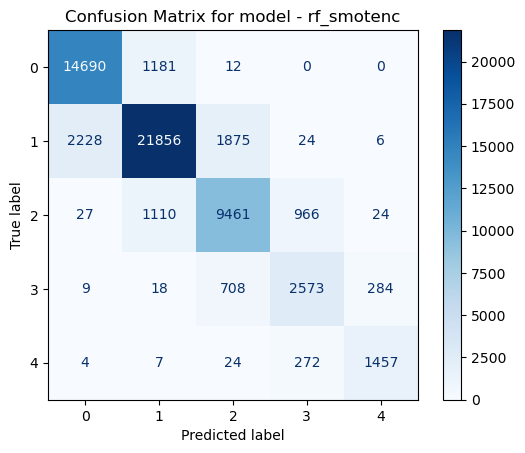

In [250]:
# Plot the confusion matrix
added_title_show_confusion_matrix("rf_smotenc")

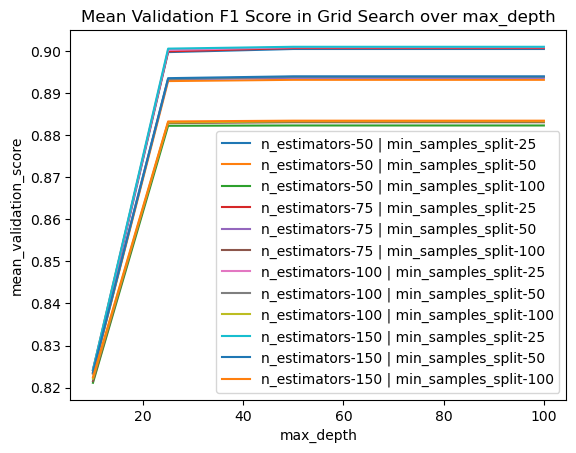

In [115]:
plot_test_score_over_hyper(model_name="rf_smotenc",
                           x_dim = "max_depth",
                           other_dims=["n_estimators","min_samples_split"]
                           )

<div style="border-radius:10px; border: #ffd500 solid; padding: 15px; background-color: #ffffcf; font-size:100%; text-align:left">
<font size="4px" color="#ffa600"><b>💬 Comment:</b></font>
    
- From the plots above, we can see that
    - The validation score does not increase much when `max_depth` is over `25`.
- By comparing the classification reports, the `class_3`'s weighted f1 score drop a bit in `Random Forest`.
    
<div>

#### Random Forest Summary

<div style="border-radius:10px; border: #ffd500 solid; padding: 15px; background-color: #ffffcf; font-size:100%; text-align:left">
<font size="4px" color="#ffa600"><b>💬 Comment - Random Forest</b></font>
    
- From the above results for Random Forest, we obtained:
|Model|alias|Best Params / Params|training F1|testing F1|
|---|---|---|:---:|:---:|
|`RandomForest`|rf|`{'max_depth': 50, 'min_samples_split': 25, 'n_estimators': 150}`|`85.39%`|`85.82%`|
|`RandomForest`|rf_smotenc|`{'max_depth': 50, 'min_samples_split': 25, 'n_estimators': 150}`|`90.10%`|`85.12%`|

    
<div>

<div style="border-radius:10px; border: #ffd500 solid; padding: 15px; background-color: #ffffcf; font-size:100%; text-align:left">
<font size="4px" color="#ffa600"><b>💡 Insight - Random Forest</b></font>

- From above table, we can see that `SMOTENC` does not work well with `Random Forest`, similar to `Boosting` and `Logistic Regression`
- After going through different types of tree-based model, we conclude that tree-based model works better for our dataset.
- As our dataset is not linearly separable:
    - Logistic Regression may not work well.
    

Now, let's move to **Naive Bayes**
<div>


---


<div style="border-radius:10px; border:#33a0ff solid; padding: 15px; background-color: #f0f1ff; font-size:100%; text-align:left">
<a class="anchor" id="4-model">
    <h3> Model - Naive Bayes </h3>
</a>

</div>

#### Gaussian Naive Bayes with Grid Search

In [118]:
from sklearn.naive_bayes import GaussianNB


def model(test = False):
    model = MyModel(X_train,X_test,
                    y_train,y_test,
                    train_subsample_size=global_subsampling_pct,
                    test_subsample_size=global_subsampling_pct)

    # Apply Subsampling for faster training in experimental stage
    model.init_subsampling() # Subsample data for faster deployment
    
    # Instantiate encoder steps
    model.init_one_hot_encoding(columns=["vehicle_type","drivetrain","transmission","engine_block"])
    model.init_target_encoding(columns=["make","model","trim","body_type"])
    model.init_encoder() # Activate all encoders and add to pipeline

    # Instantiate model and add to pipeline
    model_name = "nb"
    model.init_model(name = model_name,
                     model = GaussianNB()
                    )
    
    # Instantiate the entire pipeline
    model.init_pipeline()

    # Set K-Fold CV
    model.set_kfold_cv(5)
    
    # Instantiate the grid search
    model.init_grid_search(params={f"{model_name}__priors":[None],
                                  },
                           n_job = 3)


    # Fit the Pipeline
    model.fit()
    
    # Make Prediction on X_test
    model.predict()
    
    # Print the train score (without GridSearch) / best train score (with GridSearch)
    model.print_best_train_score()
    
    # Print the test score
    model.print_test_score()
    
    # Print the best params
    model.print_best_params()
    
    # Print the confusion matrix
    model.print_confusion_matrix()

    # Add model performance
    global perf
    perf = model.add_perf(perf,test)
        
    # Save model
    model.save_model()
    
    return model

# Run this model
nb = model()

2023-11-22 11:58:31 - INFO >>> =============== Data Shape ===============
2023-11-22 11:58:31 - INFO >>> X_train: (1764450, 21) | y_train: (1764450,)
2023-11-22 11:58:31 - INFO >>> X_test : (588151, 21) | y_test : (588151,)
2023-11-22 11:58:31 - INFO >>> 
2023-11-22 11:58:31 - INFO >>> Sub-sampling on Train Data...
2023-11-22 11:58:33 - INFO >>> Subsampling Completed | Time elapsed: 	0 hours 00 minutes 02 seconds
2023-11-22 11:58:33 - INFO >>> =============== After Subsampling ===============
2023-11-22 11:58:33 - INFO >>> X_train: (176445, 21) | y_train: (176445,)
2023-11-22 11:58:33 - INFO >>> X_test : (58816, 21) | y_test : (58816,)
2023-11-22 11:58:33 - INFO >>> 
2023-11-22 11:58:33 - INFO >>> One-hot Encoder Initialization Completed
2023-11-22 11:58:33 - INFO >>> 
2023-11-22 11:58:33 - INFO >>> Target Encoder Initialization Completed
2023-11-22 11:58:33 - INFO >>> 
2023-11-22 11:58:33 - INFO >>> GaussianNB (name: nb) Initialization Completed
2023-11-22 11:58:33 - INFO >>> 
2023-11

##### Model Performance

In [119]:
res = perf.get_data()
res[res["model_name"]=="nb"]

,timestamp,test,model_name,model,scoring,grid_search,best_params,best_train_score,params,train_score,test_score,confusion_matrix,classification_report,sub_sampling,sub_sampling_time,sub_sampling_pct_X_train,sub_sampling_pct_X_test,over_sampling,over_sampling_time,X_train_shape,X_test_shape,target_encoding,target_encoding_col,one_hot_encoding,one_hot_encoding_col,standard_scaling,standard_scaling_col,min_max_scaling,min_max_scaling_col,drop_column,dropped_columns,pca,pca_n_components,sampling,sampling_method,sampling_time,final_train_score
15,2023-11-22 11:58:40,False,nb,GaussianNB,f1_weighted,True,{'nb__priors': None},0.45753,NaN,NaN,0.431844,[[ 4801 7142 146 1 3793]\n [ 538 1579...,NaN,True,2.587863,0.1,0.1,NaN,NaN,"(176445, 21)","(58816, 21)",True,"['make', 'model', 'trim', 'body_type']",True,"['vehicle_type', 'drivetrain', 'transmission',...",False,[],False,[],False,[],False,NaN,False,NaN,NaN,0.45753


<div style="border-radius:10px; border: #ffd500 solid; padding: 15px; background-color: #ffffcf; font-size:100%; text-align:left">
<font size="4px" color="#ffa600"><b>💬 Comment:</b></font>
    
- Model Performance:
|Model|alias|Best Params / Params|training F1|testing F1|
|---|---|---|:---:|:---:|
|`Naive Bayes`|nb|`{'priors': None}`|`45.75%`|`43.18%`|
<div>

##### Model Evaluation

In [120]:
# Print Classification Report
nb.print_classification_report()

2023-11-22 11:59:19 - INFO >>> =============== Classification Report on Test Data ===============
              precision    recall  f1-score   support

           0       0.90      0.30      0.45     15883
           1       0.65      0.61      0.63     25989
           2       0.40      0.08      0.13     11588
           3       0.34      0.03      0.05      3592
           4       0.07      0.99      0.12      1764

    accuracy                           0.40     58816
   macro avg       0.47      0.40      0.28     58816
weighted avg       0.63      0.40      0.43     58816



In [121]:
# Print the confusion matrix
nb.print_confusion_matrix()

2023-11-22 11:59:24 - INFO >>> =============== Confusion Matrix on Test Data ===============
          predict_1  predict_2  predict_3  predict_4  predict_5
actual_1       4801       7142        146          1       3793
actual_2        538      15796       1092         32       8531
actual_3         16       1378        898        154       9142
actual_4          4         30         87        101       3370
actual_5          3          3          3         11       1744


2023-11-22 17:55:16 - INFO >>> Printing Confusion Matrix for nb


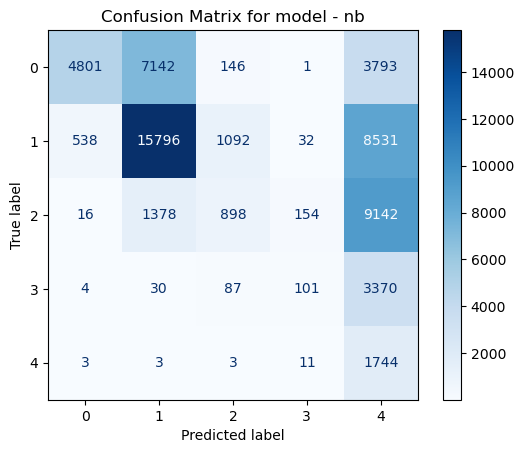

In [251]:
# Plot the confusion matrix
added_title_show_confusion_matrix("nb")

#### Naive Bayes Summary

<div style="border-radius:10px; border: #ffd500 solid; padding: 15px; background-color: #ffffcf; font-size:100%; text-align:left">
<font size="4px" color="#ffa600"><b>💬 Comment:</b></font>
    
- As we can see from the above reports, tables and graphs:
    - `Gaussian Naive Bayes` does not work well with our dataset.
    - The possible reason could be: There are too many categorical features in our dataset.
    
    
Lastly, we can try with **Neural Network**.
<div>

---

<div style="border-radius:10px; border:#33a0ff solid; padding: 15px; background-color: #f0f1ff; font-size:100%; text-align:left">
<a class="anchor" id="4-model">
    <h3> Model - Neural Network </h3>
</a>
    
- Other than typical and well-developed machine learning model, perhaps we can try using neural network to solve this problem.

</div>

#### Neural Network

In [196]:
def process_data():
    # Utilize the code we have in MyModel class
    model = MyModel(X_train,X_test,
                    y_train,y_test,
                    train_subsample_size=global_subsampling_pct,
                    test_subsample_size=global_subsampling_pct)

    # Apply Subsampling for faster training in experimental stage
    model.init_subsampling() # Subsample data for faster deployment
    
    # model.init_over_sampling() # Oversampling for class imabalance

    # Instantiate encoder steps
    model.init_one_hot_encoding(columns=["vehicle_type","drivetrain","transmission","engine_block"])
    model.init_target_encoding(columns=["make","model","trim","body_type"])
    model.init_encoder() # Activate all encoders and add to pipeline

    model.init_standard_scaler(columns=["make","model","trim","body_type"])
    model.init_scaler() # Activate all scalers and add to pipeline
    
    # Instantiate the transform pipeline
    model.init_pipeline()
    
    transformed_X_train = model.pipeline.fit_transform(model.X_train,model.y_train)
    transformed_X_test = model.pipeline.transform(model.X_test)
    transformed_y_train = model.y_train
    transformed_y_test = model.y_test
    logger.info("Processing Completed.")
    
    return (transformed_X_train,transformed_X_test,transformed_y_train,transformed_y_test)

processed_X_train, processed_X_test, processed_y_train, processed_y_test = process_data()


2023-11-24 13:21:21 - INFO >>> =============== Data Shape ===============
2023-11-24 13:21:21 - INFO >>> X_train: (1764450, 21) | y_train: (1764450,)
2023-11-24 13:21:21 - INFO >>> X_test : (588151, 21) | y_test : (588151,)
2023-11-24 13:21:21 - INFO >>> 
2023-11-24 13:21:21 - INFO >>> Sub-sampling on Train Data...
2023-11-24 13:21:24 - INFO >>> Subsampling Completed | Time elapsed: 	0 hours 00 minutes 02 seconds
2023-11-24 13:21:24 - INFO >>> =============== After Subsampling ===============
2023-11-24 13:21:24 - INFO >>> X_train: (176445, 21) | y_train: (176445,)
2023-11-24 13:21:24 - INFO >>> X_test : (58816, 21) | y_test : (58816,)
2023-11-24 13:21:24 - INFO >>> 
2023-11-24 13:21:24 - INFO >>> One-hot Encoder Initialization Completed
2023-11-24 13:21:24 - INFO >>> 
2023-11-24 13:21:24 - INFO >>> Target Encoder Initialization Completed
2023-11-24 13:21:24 - INFO >>> 
2023-11-24 13:21:24 - INFO >>> Standard Scaler Initialization Completed
2023-11-24 13:21:24 - INFO >>> 
2023-11-24 13

In [197]:
import torch
import torch.nn as nn

from tqdm.notebook import tnrange, tqdm_notebook

In [198]:
nn_X_train = torch.tensor(processed_X_train.to_numpy(), dtype=torch.float32)

In [199]:
nn_X_test = torch.tensor(processed_X_test.to_numpy(), dtype=torch.float32)

In [200]:
nn_y_train = torch.tensor(processed_y_train.to_numpy(), dtype=torch.long)

In [201]:
nn_y_test = torch.tensor(processed_y_test.to_numpy(), dtype=torch.long)

In [202]:
print(f"nn_X_train shape: {nn_X_train.size()}")
print(f"nn_X_test shape: {nn_X_test.size()}")

print(f"nn_y_train shape: {nn_y_train.size()}")
print(f"nn_y_test shape: {nn_y_test.size()}")

nn_X_train shape: torch.Size([176445, 23])
nn_X_test shape: torch.Size([58816, 23])
nn_y_train shape: torch.Size([176445])
nn_y_test shape: torch.Size([58816])


In [203]:

class nn1(nn.Module):
    
    def __init__(self,input_feature):
        super().__init__()
        self.lin1 = nn.Linear(input_feature,50)
        self.lin2 = nn.Linear(50,25)
        self.lin3 = nn.Linear(25,10)
        self.lin4 = nn.Linear(10,5)
        
        self.leakyrelu = nn.LeakyReLU()
        self.relu = nn.ReLU()
        self.softmax = nn.Softmax()
        self.dropout = nn.Dropout(p=0.1)
        
        self.loss = None 
        self.loss_function = nn.CrossEntropyLoss() 
        self.optimizer = torch.optim.SGD(self.parameters(), lr=.005, momentum=0.9)
        

    def set_optimizer_zero(self):
        self.optimizer.zero_grad()
        
    # def
        
    def forward(self,X):
        """Perform forward pass."""

        # pass through the layers
        hidden_1 = self.dropout(self.relu(self.lin1(X)))
        hidden_2 = self.dropout(self.relu(self.lin2(hidden_1)))
        hidden_3 = self.dropout(self.relu(self.lin3(hidden_2)))
        output = self.lin4(hidden_3)

        # return output
        return output
    
    
    def predict(self,X):
        # Predict class probabilities
        predictions = self.forward(X)

        # Find highest class prediction, notice we don't need to convert to
        # probabilities to do hard predictions, we can simply choose the
        # highest values
        hard_class_predictions = torch.argmax(predictions, dim=1)

        return hard_class_predictions
        
    def backward(self):
        self.loss.backward()
        
    def calculate_loss(self,output, y_true):
        self.loss = self.loss_function(output, y_true)
        
    def update_weight(self):
        self.optimizer.step()

In [204]:
from sklearn.metrics import accuracy_score, f1_score


model_nn = nn1(nn_X_train.size()[1])

epochs = 500
epochs_list = []
time_used = []
train_f1 = []
test_f1 = []
bin_count = []

start_time = time.time()
for epoch in tnrange(epochs, desc="Total epochs: "):
    epochs_list.append(epoch+1)

    # Clear gradients (pytorch accumulates gradients by default)
    model_nn.set_optimizer_zero()

    # Calculate outputs
    output_values = model_nn.forward(nn_X_train)

    # Calculate loss
    loss = model_nn.calculate_loss(output_values, nn_y_train)

    # Backpropagation & weight adjustment
    model_nn.backward()
    model_nn.update_weight()
    
    # Evaluate Train
    train_binary_classification = model_nn.predict(nn_X_train)
    train_f1_res = f1_score(nn_y_train, train_binary_classification,average="weighted")
    train_f1.append(train_f1_res)
    
    # Evaluate Test
    test_binary_classification = model_nn.predict(nn_X_test)
    test_f1_res = f1_score(nn_y_test, test_binary_classification,average="weighted")
    test_f1.append(test_f1_res)
    
    # Mark Prediction Count
    bin_count.append(torch.bincount(test_binary_classification))
    

end_time = time.time()
time_used.append(end_time-start_time)
print(f"Optimization ended successfully for epochs = {epochs}")




Total epochs:   0%|          | 0/500 [00:00<?, ?it/s]

Optimization ended successfully for epochs = 500


In [205]:
# Print DataFrame
data = {"Epochs":epochs_list,
        "train_f1_score":train_f1,"test_f1_score":test_f1}
for i in range(4):
    try:
        data[f"class_{i}_count"] = [tens[i] for tens in bin_count]
    except:
        pass
res = pd.DataFrame(data)
res

,Epochs,train_f1_score,test_f1_score,class_0_count,class_1_count
0,0,0.116175,0.115299,tensor(47720),tensor(43)
1,1,0.165909,0.167671,tensor(9941),tensor(9294)
2,2,0.217113,0.216819,tensor(49097),tensor(9669)
3,3,0.320629,0.322846,tensor(8743),tensor(48226)
4,4,0.273826,0.272374,tensor(223),tensor(57261)
...,...,...,...,...,...
495,495,0.275034,0.274925,tensor(539),tensor(58277)
496,496,0.274739,0.274603,tensor(526),tensor(58290)
497,497,0.274952,0.274855,tensor(554),tensor(58262)
498,498,0.274915,0.275548,tensor(535),tensor(58281)


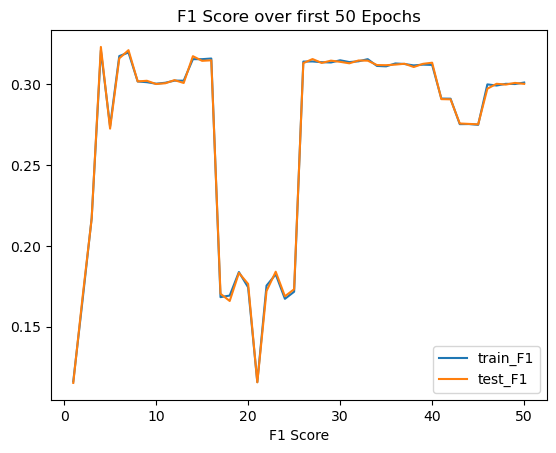

In [255]:
head = 50
new_res = res[:head]

# Plot the result
plt.figure()

# Line 
plt.plot(new_res["Epochs"],new_res["train_f1_score"],label="train_F1")
plt.plot(new_res["Epochs"],new_res["test_f1_score"],label="test_F1")

# Plot
plt.title(f"F1 Score over first {head} Epochs")
plt.xlabel("Epochs")
plt.xlabel("F1 Score")

plt.legend()
plt.show()

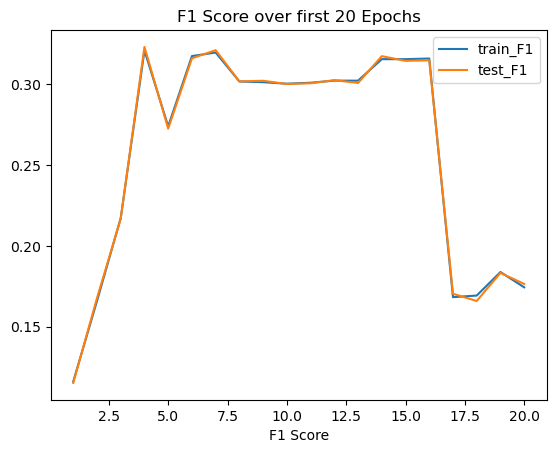

In [256]:
head = 20
new_res = res[:head]

# Plot the result
plt.figure()

# Line 
plt.plot(new_res["Epochs"],new_res["train_f1_score"],label="train_F1")
plt.plot(new_res["Epochs"],new_res["test_f1_score"],label="test_F1")

# Plot
plt.title(f"F1 Score over first {head} Epochs")
plt.xlabel("Epochs")
plt.xlabel("F1 Score")

plt.legend()
plt.show()

In [257]:
print(f"The best train F1 score is {round(res['train_f1_score'].max()*100,2)}% when epochs = {res['train_f1_score'].argmax()+1}")
print(f"The best test F1 score is {round(res['test_f1_score'].max()*100,2)}% when epochs = {res['test_f1_score'].argmax()+1}")

The best train F1 score is 32.06% when epochs = 4
The best test F1 score is 32.28% when epochs = 4


<div style="border-radius:10px; border: #ffd500 solid; padding: 15px; background-color: #ffffcf; font-size:100%; text-align:left">
<font size="4px" color="#ffa600"><b>💬 Comment - Neural Network</b></font>
    
- We have a really weird result up here.
- The best testing F1 score is obtained after training 3 epochs.

    
<div>

#### Neural Network with SMOTENC

In [209]:
def process_data_smotenc():
    # Utilize the code we have in MyModel class
    model = MyModel(X_train,X_test,
                    y_train,y_test,
                    train_subsample_size=global_subsampling_pct,
                    test_subsample_size=global_subsampling_pct)

    # Apply Subsampling for faster training in experimental stage
    model.init_subsampling() # Subsample data for faster deployment
    
    model.init_smotenc() # SMOTENC for class imabalance

    # Instantiate encoder steps
    model.init_one_hot_encoding(columns=["vehicle_type","drivetrain","transmission","engine_block"])
    model.init_target_encoding(columns=["make","model","trim","body_type"])
    model.init_encoder() # Activate all encoders and add to pipeline

    model.init_standard_scaler(columns=["make","model","trim","body_type"])
    model.init_scaler() # Activate all scalers and add to pipeline
    
    # Instantiate the transform pipeline
    model.init_pipeline()
    
    transformed_X_train = model.pipeline.fit_transform(model.X_train,model.y_train)
    transformed_X_test = model.pipeline.transform(model.X_test)
    transformed_y_train = model.y_train
    transformed_y_test = model.y_test
    logger.info("Processing Completed.")
    
    return (transformed_X_train,transformed_X_test,transformed_y_train,transformed_y_test)

processed_X_train_smotenc, processed_X_test_smotenc, processed_y_train_smotenc, processed_y_test_smotenc = process_data_smotenc()


2023-11-24 13:32:43 - INFO >>> =============== Data Shape ===============
2023-11-24 13:32:43 - INFO >>> X_train: (1764450, 21) | y_train: (1764450,)
2023-11-24 13:32:43 - INFO >>> X_test : (588151, 21) | y_test : (588151,)
2023-11-24 13:32:43 - INFO >>> 
2023-11-24 13:32:43 - INFO >>> Sub-sampling on Train Data...
2023-11-24 13:32:46 - INFO >>> Subsampling Completed | Time elapsed: 	0 hours 00 minutes 02 seconds
2023-11-24 13:32:46 - INFO >>> =============== After Subsampling ===============
2023-11-24 13:32:46 - INFO >>> X_train: (176445, 21) | y_train: (176445,)
2023-11-24 13:32:46 - INFO >>> X_test : (58816, 21) | y_test : (58816,)
2023-11-24 13:32:46 - INFO >>> 
2023-11-24 13:32:46 - INFO >>> SMOTENC Over Sampling on Train Data...
2023-11-24 13:36:39 - INFO >>> SMOTENC Over Sampling Completed | Time elapsed: 	0 hours 03 minutes 52 seconds
2023-11-24 13:36:39 - INFO >>> =============== After SMOTENC Over Sampling ===============
2023-11-24 13:36:39 - INFO >>> X_train: (389830, 21) 

In [210]:
import torch
import torch.nn as nn

from tqdm.notebook import tnrange, tqdm_notebook

In [211]:
nn_X_train_smotenc = torch.tensor(processed_X_train_smotenc.to_numpy(), dtype=torch.float32)

In [212]:
nn_X_test_smotenc = torch.tensor(processed_X_test_smotenc.to_numpy(), dtype=torch.float32)

In [213]:
nn_y_train_smotenc = torch.tensor(processed_y_train_smotenc.to_numpy(), dtype=torch.long)

In [214]:
nn_y_test_smotenc = torch.tensor(processed_y_test_smotenc.to_numpy(), dtype=torch.long)

In [215]:
print(f"nn_X_train_smotenc shape: {nn_X_train_smotenc.size()}")
print(f"nn_X_test_smotenc shape: {nn_X_test_smotenc.size()}")

print(f"nn_y_train_smotenc shape: {nn_y_train_smotenc.size()}")
print(f"nn_y_test_smotenc shape: {nn_y_test_smotenc.size()}")

nn_X_train_smotenc shape: torch.Size([389830, 23])
nn_X_test_smotenc shape: torch.Size([58816, 23])
nn_y_train_smotenc shape: torch.Size([389830])
nn_y_test_smotenc shape: torch.Size([58816])


In [216]:
from sklearn.metrics import accuracy_score, f1_score


model_smotenc = nn1(nn_X_train_smotenc.size()[1])

epochs = 500
epochs_list = []
time_used = []
train_f1 = []
test_f1 = []
bin_count = []

start_time = time.time()
for epoch in tnrange(epochs, desc="Total epochs: "):
    epochs_list.append(epoch+1)

    # Clear gradients (pytorch accumulates gradients by default)
    model_smotenc.set_optimizer_zero()

    # Calculate outputs
    output_values = model_smotenc.forward(nn_X_train_smotenc)

    # Calculate loss
    loss = model_smotenc.calculate_loss(output_values, nn_y_train_smotenc)

    # Backpropagation & weight adjustment
    model_smotenc.backward()
    model_smotenc.update_weight()
    
    # Evaluate Train
    train_binary_classification = model_smotenc.predict(nn_X_train_smotenc)
    train_f1_res = f1_score(nn_y_train_smotenc, train_binary_classification,average="weighted")
    train_f1.append(train_f1_res)
    
    # Evaluate Test
    test_binary_classification = model_smotenc.predict(nn_X_test_smotenc)
    test_f1_res = f1_score(nn_y_test_smotenc, test_binary_classification,average="weighted")
    test_f1.append(test_f1_res)
    
    # Mark Prediction Count
    bin_count.append(torch.bincount(test_binary_classification))
    

end_time = time.time()
time_used.append(end_time-start_time)
print(f"Optimization ended successfully for epochs = {epochs}")




Total epochs:   0%|          | 0/500 [00:00<?, ?it/s]

Optimization ended successfully for epochs = 500


In [ ]:
# Print DataFrame
data = {"Epochs":epochs_list,
        "train_f1_score":train_f1,"test_f1_score":test_f1}
for i in range(4):
    try:
        data[f"class_{i}_count"] = [tens[i] for tens in bin_count]
    except:
        pass
res_smotenc = pd.DataFrame(data)
res_smotenc.set_index("Epochs",inplace = True)

In [258]:
res_smotenc

,train_f1_score,test_f1_score,class_0_count,class_1_count,class_2_count,class_3_count
Epochs,,,,,,
1,0.134913,0.218200,tensor(95),tensor(25436),tensor(4632),tensor(111)
2,0.122916,0.035786,tensor(11),tensor(421),tensor(4579),tensor(7680)
3,0.102881,0.042116,tensor(3),tensor(394),tensor(8111),tensor(384)
4,0.071855,0.005099,tensor(5),tensor(81),tensor(149),tensor(558)
5,0.070911,0.003667,tensor(30),tensor(36),tensor(14),tensor(597)
...,...,...,...,...,...,...
496,0.066724,0.001849,tensor(0),tensor(8),tensor(1),tensor(2)
497,0.066734,0.001747,tensor(0),tensor(3),tensor(1),tensor(1)
498,0.066706,0.001882,tensor(0),tensor(6),tensor(1),tensor(3)


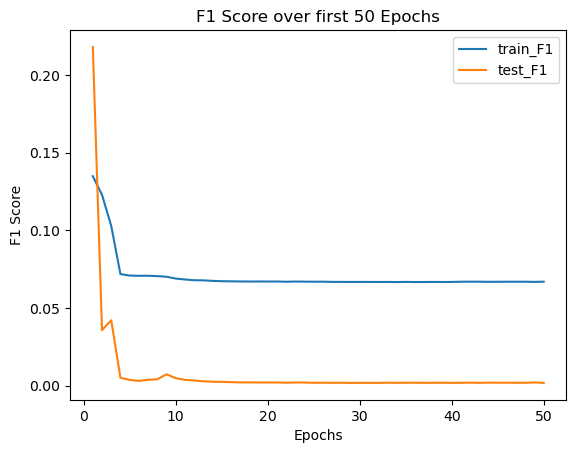

In [259]:
head = 50
new_res_smotenc = res_smotenc[:head]

# Plot the result
plt.figure()

# Line 
plt.plot(new_res_smotenc.index,new_res_smotenc["train_f1_score"],label="train_F1")
plt.plot(new_res_smotenc.index,new_res_smotenc["test_f1_score"],label="test_F1")

# Plot
plt.title(f"F1 Score over first {head} Epochs")
plt.xlabel("Epochs")
plt.ylabel("F1 Score")

plt.legend()
plt.show()

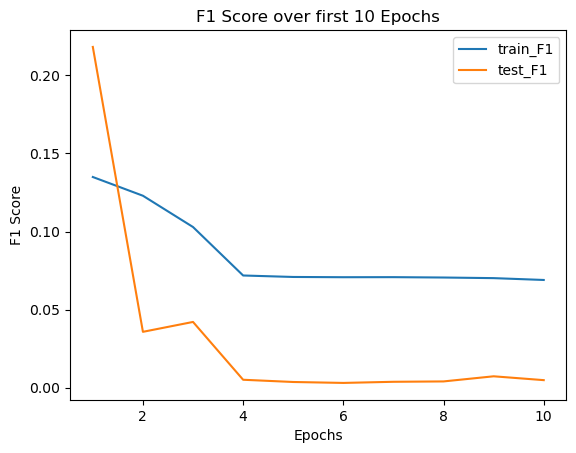

In [260]:
head = 10
new_res_smotenc = res_smotenc[:head]

# Plot the result
plt.figure()

# Line 
plt.plot(new_res_smotenc.index,new_res_smotenc["train_f1_score"],label="train_F1")
plt.plot(new_res_smotenc.index,new_res_smotenc["test_f1_score"],label="test_F1")

# Plot
plt.title(f"F1 Score over first {head} Epochs")
plt.xlabel("Epochs")
plt.ylabel("F1 Score")

plt.legend()
plt.show()

In [261]:
print(f"The best train F1 score is {round(res_smotenc['train_f1_score'].max()*100,2)}% when epochs = {res_smotenc['train_f1_score'].argmax()+1}")
print(f"The best test F1 score is {round(res_smotenc['test_f1_score'].max()*100,2)}% when epochs = {res_smotenc['test_f1_score'].argmax()+1}")

The best train F1 score is 13.49% when epochs = 1
The best test F1 score is 21.82% when epochs = 1


#### Neural Network Summary

<div style="border-radius:10px; border: #ffd500 solid; padding: 15px; background-color: #ffffcf; font-size:100%; text-align:left">
<font size="4px" color="#ffa600"><b>💬 Comment - Neural Network</b></font>
    
- From the above results for Neural Network, we obtained:
|Model|alias|At Epoch|training F1|testing F1|
|---|---|:---:|:---:|:---:|
|`Neural Network`|nn|4|`32.06%`|`32.38%`|
|`Neural Network` (with SMOTENC)|nn_smotenc|1|`13.49%`|`21.82%`|

    
<div>

<div style="border-radius:10px; border: #ffd500 solid; padding: 15px; background-color: #ffffcf; font-size:100%; text-align:left">
<font size="4px" color="#ffa600"><b>💡 Insight - Neural Network</b></font>

- Neural Network is way too powerful to handle this dataset.
- Neural Network is over-reacted to this dataset which leads to very poor result. 
- From the graph above, we can see that the testing F1 score popped up in first few epochs and dropping drastically afterward.
    
<div>

[Back-to-top](#4-toc)

---

<div style="border-radius:10px; border:#33a0ff solid; padding: 15px; background-color: #f0f1ff; font-size:100%; text-align:left">
<a class="anchor" id="4-pipe-full">
    <h2> Model Pipelines with full data </h2>
</a>





</div>

<div style="border-radius:10px; border: #ffd500 solid; padding: 15px; background-color: #ffffcf; font-size:100%; text-align:left">

<font size="4px" color="#ffa600"><b>🏆 Leaderboard - Previous Result with 10% of training data:</b></font>
|Model|alias|Best Params / Params|training F1|testing F1|
|---|---|---|:---:|:---:|
|`Logistic Regression`|logit_baseline|`{'C': 1, 'class_weight': 'balanced','max_iter': 10000,'penalty': 'l2'}`|`69.74%`|`69.82%`|
|`Logistic Regression` |logit_dropped|`{'C': 1000, 'class_weight': None, 'max_iter': 10000, 'penalty': 'l2'}`|`71.77%`|`71.81%`|
|`Decision Tree`|dtc|`{'max_depth': 25, 'min_samples_split': 50}`|`82.15%`|`82.94%`|
|`AdaBoost`|abc|`{'learning_rate': 1, 'n_estimators': 100}`|`85.34%`|`85.89%`|
|`XGBoosting`|xgb|`{'max_depth': 15, 'n_estimators': 30}`|`85.42%`|`85.85%`|
|`RandomForest`|rf|`{'max_depth': 50, 'min_samples_split': 25, 'n_estimators': 150}`|`85.39%`|`85.82%`|
|`Naive Bayes`|nb|`{'priors': None}`|`45.75%`|`43.18%`|
|`Neural Network`|nn|`{epoch = 3}`|`32.06%`|`32.38%`|


<div>

<div style="border-radius:10px; border: #ffd500 solid; padding: 15px; background-color: #ffffcf; font-size:100%; text-align:left">
<font size="4px" color="#ffa600"><b>🧠 Idea:</b></font>
    
From the previous result, we select top 3 models re-train with our full dataset, which may take hours to run.    

<font size="4px" color="#ffa600"><b> Candidates List:</b></font>
|ID|Model|alias|Best Params / Params|training F1|testing F1|
|---|---|---|---|:---:|:---:|
|1|`AdaBoost`|abc|`{'learning_rate': 1, 'n_estimators': 100}`|`85.34%`|`85.89%`|
|2|`XGBoosting`|xgb|`{'max_depth': 15, 'n_estimators': 30}`|`85.42%`|`85.85%`|
|3|`RandomForest`|rf|`{'max_depth': 50, 'min_samples_split': 25, 'n_estimators': 150}`|`85.39%`|`85.82%`|

- We will use the best hyperparameters we obtained from above to re-train the models with 5-fold cross validation.

<div>

### Model Training

#### Adaboosting

In [34]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier

def model(test = False):
    model = MyModel(X_train,X_test,
                    y_train,y_test,
                    train_subsample_size=None,
                    test_subsample_size=None)

    # Apply Subsampling for faster training in experimental stage
    model.init_subsampling() # Subsample data for faster deployment

    # Instantiate encoder steps
    model.init_one_hot_encoding(columns=["vehicle_type","drivetrain","transmission","engine_block"])
    model.init_target_encoding(columns=["make","model","trim","body_type"])
    model.init_encoder() # Activate all encoders and add to pipeline

    # Instantiate model
    model_name = "full_abc"
    model.init_model(name = model_name,
                     model = AdaBoostClassifier(estimator = DecisionTreeClassifier(max_depth = 25,
                                                                                   min_samples_split = 50,
                                                                                   random_state=42),
                                                random_state=42
                                                )
                    )
    
    # Instantiate the entire pipeline
    model.init_pipeline()

    # Set K-Fold CV
    model.set_kfold_cv(5)
    
    # Instantiate the grid search
    model.init_grid_search(params={f"{model_name}__n_estimators":[100], 
                                   f"{model_name}__learning_rate":[1],
                                  },
                           n_job = 3)
    
    # Fit the Pipeline
    model.fit()
    
    # Make Prediction on X_test
    model.predict()
    
    # Print the train score (without GridSearch) / best train score (with GridSearch)
    model.print_best_train_score()
    
    # Print the test score
    model.print_test_score()
    
    # Print the best params
    model.print_best_params()
    
    # Print the confusion matrix
    model.print_confusion_matrix()

    # Add model performance
    global perf
    perf = model.add_perf(perf,test)
        
    # Save Model
    model.save_model()
    
    return model

# Run this model
full_abc = model()


2023-11-22 13:11:15 - INFO >>> =============== Data Shape ===============
2023-11-22 13:11:15 - INFO >>> X_train: (1764450, 21) | y_train: (1764450,)
2023-11-22 13:11:15 - INFO >>> X_test : (588151, 21) | y_test : (588151,)
2023-11-22 13:11:15 - INFO >>> 
2023-11-22 13:11:15 - ERROR >>> If init_subsampling(), 'train_subsample_size' & 'test_subsample_size' cannot be None.
2023-11-22 13:11:15 - INFO >>> No Subsampling is applied.
2023-11-22 13:11:15 - INFO >>> 
2023-11-22 13:11:15 - INFO >>> One-hot Encoder Initialization Completed
2023-11-22 13:11:15 - INFO >>> 
2023-11-22 13:11:15 - INFO >>> Target Encoder Initialization Completed
2023-11-22 13:11:15 - INFO >>> 
2023-11-22 13:11:15 - INFO >>> AdaBoostClassifier (name: full_abc) Initialization Completed
2023-11-22 13:11:15 - INFO >>> 
2023-11-22 13:11:15 - INFO >>> Grid Search with 5-folds cross-validation Initialized Completed
2023-11-22 13:11:15 - INFO >>> 
2023-11-22 13:11:15 - INFO >>> Model Fitting with Grid Search...
2023-11-22 16

#### XGB

In [33]:
import xgboost as xgb


def model(test = False):
    model = MyModel(X_train,X_test,
                    y_train,y_test,
                    train_subsample_size=None,
                    test_subsample_size=None)

    # Apply Subsampling for faster training in experimental stage
    model.init_subsampling() # Subsample data for faster deployment

    # Instantiate encoder steps
    model.init_one_hot_encoding(columns=["vehicle_type","drivetrain","transmission","engine_block"])
    model.init_target_encoding(columns=["make","model","trim","body_type"])
    model.init_encoder() # Activate all encoders and add to pipeline

    # Instantiate model and add to pipeline
    model_name = "full_xgb"
    model.init_model(name = model_name,
                     model = xgb.XGBClassifier(random_state = 42))
    
    # Instantiate the entire pipeline
    model.init_pipeline()

    # Set K-Fold CV
    model.set_kfold_cv(5)
    
    # Instantiate the grid search
    model.init_grid_search(params={f"{model_name}__max_depth":[15],
                                   f"{model_name}__n_estimators":[30],
                                  },
                           n_job = 3)

    # Fit the Pipeline
    model.fit()
    
    # Make Prediction on X_test
    model.predict()
    
    # Print the train score (without GridSearch) / best train score (with GridSearch)
    model.print_best_train_score()
    
    # Print the test score
    model.print_test_score()
    
    # Print the best params
    model.print_best_params()
    
    # Print the confusion matrix
    model.print_confusion_matrix()

    # Add model performance
    global perf
    perf = model.add_perf(perf,test)
        
    # Save model
    model.save_model()
    
    return model

# Run this model
full_xgb = model()

2023-11-22 12:36:24 - INFO >>> =============== Data Shape ===============
2023-11-22 12:36:24 - INFO >>> X_train: (1764450, 21) | y_train: (1764450,)
2023-11-22 12:36:24 - INFO >>> X_test : (588151, 21) | y_test : (588151,)
2023-11-22 12:36:24 - INFO >>> 
2023-11-22 12:36:24 - ERROR >>> If init_subsampling(), 'train_subsample_size' & 'test_subsample_size' cannot be None.
2023-11-22 12:36:24 - INFO >>> No Subsampling is applied.
2023-11-22 12:36:24 - INFO >>> 
2023-11-22 12:36:24 - INFO >>> One-hot Encoder Initialization Completed
2023-11-22 12:36:24 - INFO >>> 
2023-11-22 12:36:24 - INFO >>> Target Encoder Initialization Completed
2023-11-22 12:36:24 - INFO >>> 
2023-11-22 12:36:24 - INFO >>> XGBClassifier (name: full_xgb) Initialization Completed
2023-11-22 12:36:24 - INFO >>> 
2023-11-22 12:36:24 - INFO >>> Grid Search with 5-folds cross-validation Initialized Completed
2023-11-22 12:36:24 - INFO >>> 
2023-11-22 12:36:24 - INFO >>> Model Fitting with Grid Search...
2023-11-22 13:11:0

#### Random Forest

In [32]:
from sklearn.ensemble import RandomForestClassifier


def model(test = False):
    model = MyModel(X_train,X_test,
                    y_train,y_test,
                    train_subsample_size=None,
                    test_subsample_size=None)

    # Apply Subsampling for faster training in experimental stage
    model.init_subsampling() # Subsample data for faster deployment
    
    # Instantiate encoder steps
    model.init_one_hot_encoding(columns=["vehicle_type","drivetrain","transmission","engine_block"])
    model.init_target_encoding(columns=["make","model","trim","body_type"])
    model.init_encoder() # Activate all encoders and add to pipeline

    # Instantiate model and add to pipeline
    model_name = "full_rf"
    model.init_model(name = model_name,
                     model = RandomForestClassifier(random_state=42,
                                                    n_jobs = 3))
    
    # Instantiate the entire pipeline
    model.init_pipeline()

    # Set K-Fold CV
    model.set_kfold_cv(5)
    
    # Instantiate the grid search
    model.init_grid_search(params={f"{model_name}__n_estimators":[150],
                                   f"{model_name}__max_depth":[50],
                                   f"{model_name}__min_samples_split":[25],
                                  },
                           n_job = 3)


    # Fit the Pipeline
    model.fit()
    
    # Make Prediction on X_test
    model.predict()
    
    # Print the train score (without GridSearch) / best train score (with GridSearch)
    model.print_best_train_score()
    
    # Print the test score
    model.print_test_score()
    
    # Print the best params
    model.print_best_params()
    
    # Print the confusion matrix
    model.print_confusion_matrix()

    # Add model performance
    global perf
    perf = model.add_perf(perf,test)
        
    # Save model
    model.save_model()
    
    return model

# Run this model
full_rf = model()

2023-11-22 12:14:57 - INFO >>> =============== Data Shape ===============
2023-11-22 12:14:57 - INFO >>> X_train: (1764450, 21) | y_train: (1764450,)
2023-11-22 12:14:57 - INFO >>> X_test : (588151, 21) | y_test : (588151,)
2023-11-22 12:14:57 - INFO >>> 
2023-11-22 12:14:57 - ERROR >>> If init_subsampling(), 'train_subsample_size' & 'test_subsample_size' cannot be None.
2023-11-22 12:14:57 - INFO >>> No Subsampling is applied.
2023-11-22 12:14:57 - INFO >>> 
2023-11-22 12:14:57 - INFO >>> One-hot Encoder Initialization Completed
2023-11-22 12:14:57 - INFO >>> 
2023-11-22 12:14:57 - INFO >>> Target Encoder Initialization Completed
2023-11-22 12:14:57 - INFO >>> 
2023-11-22 12:14:57 - INFO >>> RandomForestClassifier (name: full_rf) Initialization Completed
2023-11-22 12:14:57 - INFO >>> 
2023-11-22 12:14:57 - INFO >>> Grid Search with 5-folds cross-validation Initialized Completed
2023-11-22 12:14:57 - INFO >>> 
2023-11-22 12:14:57 - INFO >>> Model Fitting with Grid Search...
2023-11-22

### Model Performance

In [344]:
# Create dataframe for plotting graph
d = pd.DataFrame({"model":["AdaBoost","XGBoost","RandomForest"],
                  "train_F1":[0.8695,0.8732,0.8730],
                  "test_F1":[0.8706,0.8746,0.8747]})
d.set_index("model",inplace = True)

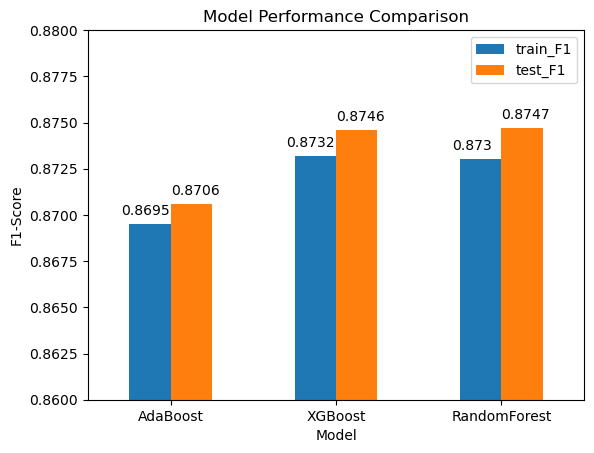

In [312]:
# Set up plot
plt.figure

# PLot
# plt.bar(d["model"],d["train_F1"],label = "train-f1")
# plt.bar(d["model"],d["test_F1"],label = "test-f1")
ax = d.plot(kind = "bar",)

# Plot setting
plt.xticks(rotation = 0)
plt.xlabel("Model")

plt.ylabel("F1-Score")

for i in range(len(d)):
    ax.text(i-0.3,d.loc[d.index[i],"train_F1"]+0.0005,f'{d.loc[d.index[i],"train_F1"]}')
    ax.text(i,d.loc[d.index[i],"test_F1"]+0.0005,f'{d.loc[d.index[i],"test_F1"]}')

plt.ylim([0.86,0.88])

plt.title("Model Performance Comparison")
# Show plot
plt.show()

<div style="border-radius:10px; border: #ffd500 solid; padding: 15px; background-color: #ffffcf; font-size:100%; text-align:left">
<font size="4px" color="#ffa600"><b>📊 Model Performance</b></font>
    
- We have run some model with full set of data above, here are the results we obtained:
|Model|alias|Params|Training Time|training F1|testing F1|
|---|---|---|:---:|:---:|:---:|
|`AdaBoost`|full_abc|`{'learning_rate': 1, 'n_estimators': 100}`|3h 14m 20s|`86.95%`|`87.06%`|
|`XGBoosting`|full_xgb|`{'max_depth': 15, 'n_estimators': 30}`|34m 43s|`87.32%`|`87.46%`|
|`Random Forest`|full_rf|`{'max_depth': 50, 'min_samples_split': 25, 'n_estimators': 150}`|20m 47s|`87.30%`|`87.47%`|
    
- When considering the model performance, we are not just focusing on the `F1-score`, but also the `Precision` and `Recall`, as well as the **training time**, which may be useful to calculate the **carbon footprint** of our model..
<div>

#### Classification Report

In [257]:
# Print Title
name = "AdaBoost"
logger.info(f"For {name}")

# Print Classification Report for AdaBoost
full_abc.print_classification_report()

2023-11-22 17:57:46 - INFO >>> For AdaBoost
2023-11-22 17:57:46 - INFO >>> =============== Classification Report on Test Data ===============
              precision    recall  f1-score   support

           0       0.91      0.90      0.91    158831
           1       0.88      0.90      0.89    259888
           2       0.82      0.82      0.82    115877
           3       0.76      0.70      0.73     35917
           4       0.89      0.81      0.85     17638

    accuracy                           0.87    588151
   macro avg       0.85      0.83      0.84    588151
weighted avg       0.87      0.87      0.87    588151



In [58]:
# Print Title
name = "XGBoosting"
logger.info(f"For {name}")

# Print Classification Report for XGBoost
full_xgb.print_classification_report()

2023-11-22 16:59:00 - INFO >>> XGBoosting | XGBoosting | XGBoosting | XGBoosting
2023-11-22 16:59:00 - INFO >>> =============== Classification Report on Test Data ===============
              precision    recall  f1-score   support

           0       0.91      0.91      0.91    158831
           1       0.89      0.90      0.89    259888
           2       0.83      0.84      0.83    115877
           3       0.76      0.72      0.74     35917
           4       0.88      0.82      0.85     17638

    accuracy                           0.87    588151
   macro avg       0.85      0.84      0.84    588151
weighted avg       0.87      0.87      0.87    588151



In [258]:
# Print Title
name = "Random Forest"
logger.info(f"For {name}")

# Print Classification Report for Random Forest
full_rf.print_classification_report()

2023-11-22 17:57:58 - INFO >>> For Random Forest
2023-11-22 17:57:58 - INFO >>> =============== Classification Report on Test Data ===============
              precision    recall  f1-score   support

           0       0.91      0.91      0.91    158831
           1       0.89      0.90      0.89    259888
           2       0.83      0.84      0.83    115877
           3       0.77      0.71      0.74     35917
           4       0.89      0.81      0.85     17638

    accuracy                           0.88    588151
   macro avg       0.86      0.83      0.84    588151
weighted avg       0.87      0.88      0.87    588151



<div style="border-radius:10px; border: #ffd500 solid; padding: 15px; background-color: #ffffcf; font-size:100%; text-align:left">
<font size="4px" color="#ffa600"><b>💬 Comment - Classification Report</b></font>
    
- From the classification reports above, we see that the `F1-score` for `class_3` of `AdaBoost` is a bit lower than other two models.
- For `XGBoost` and `Random Forest`, they both returned a very similar result. 
- Let's dig into the confusion matrix.

<div>

#### Confusion Matrix

2023-11-22 18:04:00 - INFO >>> Printing Confusion Matrix for full_xgb


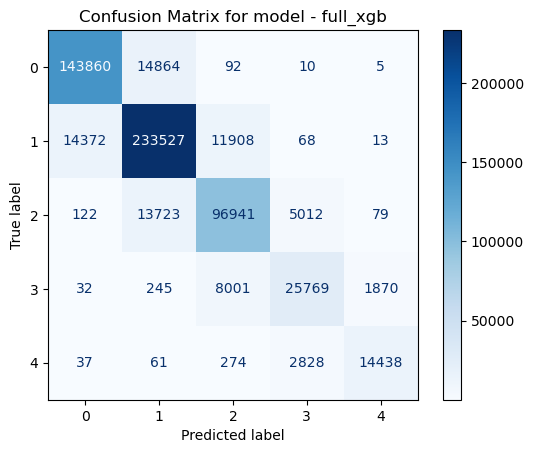

In [35]:
# Plot the confusion matrix
added_title_show_confusion_matrix("full_xgb")

2023-11-22 17:56:01 - INFO >>>  For Random Forest
2023-11-22 17:56:01 - INFO >>> Printing Confusion Matrix for full_rf


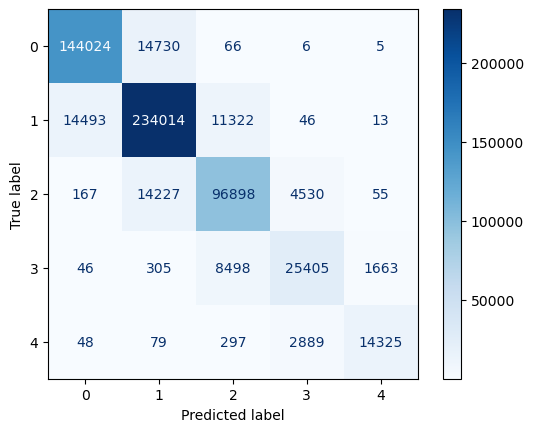

In [255]:
# Plot the confusion matrix
added_title_show_confusion_matrix("full_rf")

<div style="border-radius:10px; border: #ffd500 solid; padding: 15px; background-color: #ffffcf; font-size:100%; text-align:left">
<font size="4px" color="#ffa600"><b>💬 Comment - Confusion Matrix</b></font>
    
- By comparing the confusion matrix of `XGBoost` and `Random Forest`, we can see that....
- For upper right trianlge section in the confusion matrix, this region mean over-prediction (i.e. predicted lable > true label)
- For lower left trianlge section in the confusion matrix, this region mean under-prediction (i.e. predicted lable < true label)
- We can see that `Random Forest` tends to give under prediction while `XGBoosting` tends to give over-prediction.                                                                                                      
                                                                                                                         
<div>

### Model Interpretation

In [317]:
final_model = load_model("full_rf")
final_model

Pipeline(steps=[('encoders',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('one_hot',
                                                  Pipeline(steps=[('one_hot',
                                                                   OneHotEncoder(drop='first',
                                                                                 sparse_output=False))]),
                                                  ['vehicle_type', 'drivetrain',
                                                   'transmission',
                                                   'engine_block']),
                                                 ('tar_end',
                                                  Pipeline(steps=[('tar_end',
                                                                   TargetEncoder(random_state=42,
                                                                                 target_type='continuous'))]),
                                                  ['make', 'model', 'trim',
                                                   'body_type'])],
                                   verbose_feature_names_out=False)),
                ('full_rf',
                 RandomForestClassifier(max_depth=50, min_samples_split=25,
                                        n_estimators=150, n_jobs=3,
                                        random_state=42))])

In [330]:
final_rf = final_model.steps[-1][1]
final_importance = pd.DataFrame(final_rf.feature_importances_,index = final_rf.feature_names_in_,columns=["Feature Importance"])
final_importance.T

,vehicle_type_Truck,drivetrain_FWD,drivetrain_RWD,transmission_Manual,engine_block_I,engine_block_V,make,model,trim,body_type,log_miles,year,engine_size,fuel_M85,fuel_Lpg,fuel_Diesel,fuel_Unleaded,fuel_Hydrogen,fuel_PremiumUnleaded,fuel_Biodiesel,fuel_E85,fuel_Electric,fuel_CompressedNaturalGas
Feature Importance,0.011255,0.023885,0.007023,0.005225,0.012281,0.015404,0.048182,0.169677,0.125367,0.035515,0.213479,0.236671,0.065232,9.464640e-10,7.683062e-07,0.004396,0.011045,0.000012,0.006896,0.000045,0.00586,0.002538,0.000011


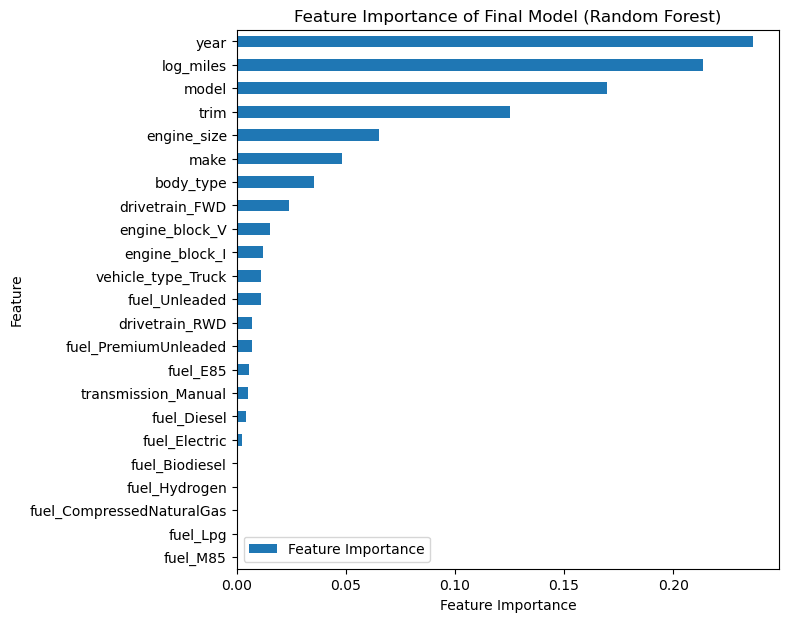

In [343]:
# Plot
final_importance.sort_values(by="Feature Importance",ascending=True).plot(kind = "barh",figsize=(7,7))

# Plot label
plt.xlabel("Feature Importance")
plt.ylabel("Feature")
plt.title("Feature Importance of Final Model (Random Forest)")

# Show PLot
plt.show()

<div style="border-radius:10px; border: #ffd500 solid; padding: 15px; background-color: #ffffcf; font-size:100%; text-align:left">
<font size="4px" color="#ffa600"><b>💡 Conclusion</b></font>
    
- From the above chart, we can see that the top 3 most important factors are:
    1. `year` (Model year)
    2. `log_miles` (Odometer value / Miles Travelled)
    3. `model` (Vehicle Model)
- In terms of fuel supported, we can see that `Unleaded` is the most important type of fuels that affecting the price.
<div>

<div style="border-radius:10px; border: #ffd500 solid; padding: 15px; background-color: #ffffcf; font-size:100%; text-align:left">
<font size="4px" color="#ffa600"><b>❓ What's Next</b></font>
    
After all the sprints, we can now deploy our model with a simple Web UI for user to make prediction.
<div>

[Back-to-top](#4-toc)

---